In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Event 3.csv", skiprows=[0,1,2,4])

df

Time   C_CTWE5_A   C_CTWE5_B   C_CTWE5_C   C_CTWE5_N   V_PTWE4_AN  \
0             0    -0.00433    -0.00151    -0.00162   -0.000095       0.0451   
1           208    -0.00433    -0.00151    -0.00162   -0.000095       0.0451   
2           417    -2.95000     0.12900     2.90000   -0.086500     185.0000   
3           625   -59.60000     0.95300    60.30000   -1.700000    4820.0000   
4           833  -122.00000    -8.76000   132.00000   -1.750000   11400.0000   
...         ...         ...         ...         ...         ...          ...   
96001  20000080  -107.00000     2.91000   104.00000    0.141000   10000.0000   
96002  20000289  -102.00000    -6.67000   109.00000    0.151000    9570.0000   
96003  20000497   -96.80000   -16.20000   113.00000    0.159000    9050.0000   
96004  20000705   -90.60000   -25.70000   116.00000    0.167000    8470.0000   
96005  20000914   -83.80000   -35.00000   119.00000    0.175000    7840.0000   

        V_PTWE4_BN   V_PTWE4_CN   C_CTWE1_A   C_CTWE1_B  ...   V_PT_FDR32_CN  \
0           0.0673       -0.245    -0.00055     0.00031  ...         -0.0233   
1           0.0673       -0.245    -0.00055     0.00031  ...         -0.0233   
2           9.0200     -192.000    -0.14800     0.07700  ...        -14.1000   
3         238.0000    -5050.000    -4.28000     2.17000  ...      -1570.0000   
4        1070.0000   -12400.000   -13.10000     6.15000  ...      -7040.0000   
...            ...          ...         ...         ...  ...             ...   
96001    -246.0000    -9790.000   -31.00000    23.60000  ...      -7590.0000   
96002     647.0000   -10200.000   -31.60000    21.70000  ...      -8080.0000   
96003    1540.0000   -10600.000   -32.00000    19.70000  ...      -8520.0000   
96004    2420.0000   -10900.000   -32.20000    17.60000  ...      -8910.0000   
96005    3280.0000   -11100.000   -32.20000    15.40000  ...      -9250.0000   

        C_CT_FDR32_A   C_CT_FDR32_B   C_CT_FDR32_C   V_PT_FDR12_AN  \
0          -0.000081       0.000039       0.000175         -0.0811   
1          -0.000081       0.000039       0.000175         -0.0811   
2           0.010300      -0.000550      -0.010100         21.5000   
3           0.698000      -0.047000      -0.680000       1770.0000   
4           2.320000      -0.005850      -2.380000       6820.0000   
...              ...            ...            ...             ...   
96001      13.300000      -6.170000      -7.110000       9710.0000   
96002      13.200000      -5.220000      -7.940000       9400.0000   
96003      13.000000      -4.240000      -8.730000       9040.0000   
96004      12.700000      -3.230000      -9.470000       8610.0000   
96005      12.300000      -2.200000     -10.100000       8130.0000   

        V_PT_FDR12_BN   V_PT_FDR12_CN   C_CT_FDR12_A   C_CT_FDR12_B  \
0               0.134         -0.0558        -0.0013       0.000744   
1               0.134         -0.0558        -0.0013       0.000744   
2               0.458        -21.4000        -0.0853       0.004690   
3              22.800      -1780.0000        -6.5300       0.265000   
4              40.700      -7330.0000       -30.2000      -0.263000   
...               ...             ...            ...            ...   
96001       -1950.000      -7750.0000      -123.0000      34.500000   
96002       -1140.000      -8240.0000      -120.0000      24.600000   
96003        -328.000      -8670.0000      -116.0000      14.600000   
96004         491.000      -9060.0000      -112.0000       4.530000   
96005        1310.000      -9380.0000      -107.0000      -5.580000   

        C_CT_FDR12_C  
0            0.00124  
1            0.00124  
2            0.08550  
3            6.45000  
4           30.90000  
...              ...  
96001       88.90000  
96002       95.60000  
96003      102.00000  
96004      107.00000  
96005      112.00000  

[96006 rows x 92 columns]

In [4]:
# remove first 0.25 seconds to allow system to stabilise before using data
data = df[df['Time'] > 0.25e6].iloc[:, 1:]
data

C_CTWE5_A   C_CTWE5_B   C_CTWE5_C   C_CTWE5_N   V_PTWE4_AN  \
1201       -104.0       -3.02       107.0       0.145       9770.0   
1202        -99.1      -12.60       112.0       0.163       9260.0   
1203        -93.1      -22.20       115.0       0.181       8710.0   
1204        -86.5      -31.60       118.0       0.196       8090.0   
1205        -79.4      -40.80       120.0       0.212       7430.0   
...           ...         ...         ...         ...          ...   
96001      -107.0        2.91       104.0       0.141      10000.0   
96002      -102.0       -6.67       109.0       0.151       9570.0   
96003       -96.8      -16.20       113.0       0.159       9050.0   
96004       -90.6      -25.70       116.0       0.167       8470.0   
96005       -83.8      -35.00       119.0       0.175       7840.0   

        V_PTWE4_BN   V_PTWE4_CN   C_CTWE1_A   C_CTWE1_B   C_CTWE1_C  ...  \
1201         307.0     -10100.0       -30.1        21.1        9.02  ...   
1202        1200.0     -10500.0       -30.6        19.2       11.30  ...   
1203        2090.0     -10800.0       -30.8        17.2       13.50  ...   
1204        2970.0     -11100.0       -30.8        15.1       15.70  ...   
1205        3820.0     -11300.0       -30.7        13.0       17.70  ...   
...            ...          ...         ...         ...         ...  ...   
96001       -246.0      -9790.0       -31.0        23.6        7.48  ...   
96002        647.0     -10200.0       -31.6        21.7        9.91  ...   
96003       1540.0     -10600.0       -32.0        19.7       12.30  ...   
96004       2420.0     -10900.0       -32.2        17.6       14.60  ...   
96005       3280.0     -11100.0       -32.2        15.4       16.80  ...   

        V_PT_FDR32_CN   C_CT_FDR32_A   C_CT_FDR32_B   C_CT_FDR32_C  \
1201          -8230.0           13.4          -5.26          -8.12   
1202          -8690.0           13.2          -4.26          -8.92   
1203          -9080.0           12.9          -3.24          -9.66   
1204          -9430.0           12.5          -2.19         -10.40   
1205          -9710.0           12.1          -1.14         -11.00   
...               ...            ...            ...            ...   
96001         -7590.0           13.3          -6.17          -7.11   
96002         -8080.0           13.2          -5.22          -7.94   
96003         -8520.0           13.0          -4.24          -8.73   
96004         -8910.0           12.7          -3.23          -9.47   
96005         -9250.0           12.3          -2.20         -10.10   

        V_PT_FDR12_AN   V_PT_FDR12_BN   V_PT_FDR12_CN   C_CT_FDR12_A  \
1201           9580.0         -1220.0         -8330.0          -86.5   
1202           9210.0          -389.0         -8780.0          -83.9   
1203           8780.0           442.0         -9180.0          -80.8   
1204           8300.0          1270.0         -9520.0          -77.3   
1205           7770.0          2090.0         -9800.0          -73.2   
...               ...             ...             ...            ...   
96001          9710.0         -1950.0         -7750.0         -123.0   
96002          9400.0         -1140.0         -8240.0         -120.0   
96003          9040.0          -328.0         -8670.0         -116.0   
96004          8610.0           491.0         -9060.0         -112.0   
96005          8130.0          1310.0         -9380.0         -107.0   

        C_CT_FDR12_B   C_CT_FDR12_C  
1201           19.90           66.5  
1202           12.90           71.0  
1203            5.73           75.1  
1204           -1.46           78.7  
1205           -8.63           81.8  
...              ...            ...  
96001          34.50           88.9  
96002          24.60           95.6  
96003          14.60          102.0  
96004           4.53          107.0  
96005          -5.58          112.0  

[94805 rows x 91 columns]

In [5]:
df_test = pd.read_csv("/content/drive/MyDrive/Event 4.CSV", skiprows=[0,1,2,4])

df_test


Time   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A  \
0             0                          -0.004329   
1           208                          -0.004329   
2           417                          -2.949805   
3           625                         -59.594590   
4           833                        -121.711400   
...         ...                                ...   
96001  20000080                        -107.363700   
96002  20000289                        -102.389100   
96003  20000497                         -96.799230   
96004  20000705                         -90.581010   
96005  20000914                         -83.812960   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C  \
0                              -0.001515                          -0.001623   
1                              -0.001515                          -0.001623   
2                               0.129254                           2.902578   
3                               0.953098                          60.338350   
4                              -8.763029                         132.230300   
...                                  ...                                ...   
96001                           2.914632                         104.303300   
96002                          -6.670727                         108.918900   
96003                         -16.229930                         112.860300   
96004                         -25.684520                         116.101600   
96005                         -34.982190                         118.629800   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N   V_BUS20KV1_AN   V_BUS20KV1_BN  \
0                              -0.000095         0.04508        0.067282   
1                              -0.000095         0.04508        0.067282   
2                              -0.086547       185.03150        9.019005   
3                              -1.701627      4822.05300      238.183100   
4                              -1.750747     11365.89000     1068.903000   
...                                  ...             ...             ...   
96001                           0.141372     10036.55000     -246.284100   
96002                           0.151196      9573.86300      647.097800   
96003                           0.159055      9051.57400     1536.183000   
96004                           0.166915      8472.77400     2416.316000   
96005                           0.174774      7841.43700     3281.769000   

        V_BUS20KV1_CN   C_WE919_WE910_1_WE910_A   C_WE919_WE910_1_WE910_B  \
0           -0.244665                 -0.000550                  0.000310   
1           -0.244665                 -0.000550                  0.000310   
2         -191.888600                 -0.147661                  0.077044   
3        -5049.003000                 -4.277356                  2.171564   
4       -12438.870000                -13.147550                  6.146612   
...               ...                       ...                       ...   
96001    -9789.851000                -31.042110                 23.562030   
96002   -10221.420000                -31.617610                 21.703120   
96003   -10589.430000                -31.997740                 19.709110   
96004   -10891.430000                -32.181340                 17.592980   
96005   -11126.430000                -32.167220                 15.368770   

       ...   V_2DBU17_CN   C_3DBX3_2DBU17_1_2DBU17_A  \
0      ...     -0.023287                    0.000081   
1      ...     -0.023287                    0.000081   
2      ...    -14.103820                   -0.010343   
3      ...  -1571.959000                   -0.697677   
4      ...  -7043.420000                   -2.322523   
...    ...           ...                         ...   
96001  ...  -7589.041000                  -13.282080   
96002  ...  -8081.860000                  -13.168070   
96003  ...  -8524.224000                  -12.973920   
96004  ...  -89

In [6]:
data_test = df_test[df_test['Time'] > 0.25e6].iloc[:, 1:]

data_test

C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B  \
1201                          -104.45750                          -3.022276   
1202                           -99.07707                         -12.646870   
1203                           -93.08139                         -22.179920   
1204                           -86.50970                         -31.582200   
1205                           -79.41438                         -40.788330   
...                                  ...                                ...   
96001                         -107.36370                           2.914632   
96002                         -102.38910                          -6.670727   
96003                          -96.79923                         -16.229930   
96004                          -90.58101                         -25.684520   
96005                          -83.81296                         -34.982190   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N  \
1201                            107.3242                           0.145302   
1202                            111.5508                           0.162985   
1203                            115.0774                           0.180668   
1204                            117.9038                           0.196387   
1205                            119.9912                           0.212105   
...                                  ...                                ...   
96001                           104.3033                           0.141372   
96002                           108.9189                           0.151196   
96003                           112.8603                           0.159055   
96004                           116.1016                           0.166915   
96005                           118.6298                           0.174774   

        V_BUS20KV1_AN   V_BUS20KV1_BN   V_BUS20KV1_CN  \
1201         9766.355        306.5743      -10073.130   
1202         9264.375       1202.4630      -10467.260   
1203         8705.442       2090.8320      -10796.350   
1204         8092.647       2965.5940      -11058.440   
1205         7430.405       3821.7370      -11252.550   
...               ...             ...             ...   
96001       10036.550       -246.2841       -9789.851   
96002        9573.863        647.0978      -10221.420   
96003        9051.574       1536.1830      -10589.430   
96004        8472.774       2416.3160      -10891.430   
96005        7841.437       3281.7690      -11126.430   

        C_WE919_WE910_1_WE910_A   C_WE919_WE910_1_WE910_B  \
1201                  -30.13120                  21.10978   
1202                  -30.55253                  19.23790   
1203                  -30.78555                  17.24713   
1204                  -30.82910                  15.14937   
1205                  -30.68199                  12.95866   
...                         ...                       ...   
96001                 -31.04211                  23.56203   
96002                 -31.61761                  21.70312   
96003                 -31.99774                  19.70911   
96004                 -32.18134                  17.59298   
96005                 -32.16722                  15.36877   

        C_WE919_WE910_1_WE910_C  ...   V_2DBU17_CN  \
1201                   9.022247  ...     -8232.835   
1202                  11.314330  ...     -8685.367   
1203                  13.538670  ...     -9083.925   
1204                  15.679100  ...     -9426.551   
1205                  17.723470  ...     -9710.900   
...                         ...  ...           ...   
96001                  7.479362  ...     -7589.041   
96002                  9.914006  ...     -8081.860   
96003                 12.289000  ...     -8524.224   
96004                 14.588160  ...     -8913.785   
96005                 16.798350  ...     -9248.198   

        C_3DBX3_2DBU17_1_2DBU17_A   C_3DBX3

In [7]:
cols = data.columns

#one period is 70 timesteps

#adjacency list mapping out node:[neighbors]
adj_list = {1: [29, 65],
 2: [30, 66],
 3: [31, 67],
 5: [12, 26, 19, 62],
 6: [13, 27, 20, 63],
 7: [14, 28, 21, 64],
 8: [15, 22],
 9: [16, 23],
 10: [17, 24],
 12: [5, 26, 33],
 13: [6, 27, 34],
 14: [7, 28, 35],
 15: [8, 29, 52],
 16: [9, 53, 30],
 17: [10, 54, 31],
 19: [26, 5, 33],
 20: [27, 34, 6],
 21: [28, 35, 7],
 22: [8, 36],
 23: [9, 37],
 24: [10, 38],
 26: [12, 33, 5, 19],
 27: [13, 20, 34, 6],
 28: [14, 21, 35, 7],
 29: [1, 65, 15, 48],
 30: [2, 66, 49, 16],
 31: [3, 67, 50, 17],
 33: [56, 19, 26, 12],
 34: [57, 13, 27, 20],
 35: [58, 14, 28, 21],
 36: [22, 40],
 37: [23, 41],
 38: [24, 42],
 40: [36, 48],
 41: [37, 49],
 42: [38, 50],
 44: [52, 59],
 45: [53, 60],
 46: [54, 61],
 48: [40, 52, 29],
 49: [53, 30, 41],
 50: [31, 42, 54],
 52: [44, 59, 48, 15],
 53: [45, 60, 49, 16],
 54: [17, 50, 46, 61],
 56: [33, 74, 68],
 57: [34, 75, 69],
 58: [35, 76, 70],
 59: [71, 77, 44, 52],
 60: [45, 78, 72, 53],
 61: [46, 79, 73, 54],
 62: [5, 86, 80],
 63: [6, 87, 81],
 64: [7, 88, 82],
 65: [29, 1, 89, 83],
 66: [2, 30, 90, 84],
 67: [85, 91, 3, 31],
 68: [56, 74],
 69: [57, 75],
 70: [58, 76],
 71: [59, 77],
 72: [60, 78],
 73: [79, 61],
 74: [56, 68],
 75: [57, 69],
 76: [58, 70],
 77: [59, 71],
 78: [60, 72],
 79: [61, 73],
 80: [62, 86],
 81: [63, 87],
 82: [64, 88],
 83: [89, 65],
 84: [90, 66],
 85: [91, 67],
 86: [62, 80],
 87: [63, 81],
 88: [64, 82],
 89: [65, 83],
 90: [66, 84],
 91: [85, 67]}

# index_mapping = [(1, 'C_CTWE5_A'), (2, 'C_CTWE5_B'), (3, 'C_CTWE5_C'), (4, 'C_CTWE5_N'), (5, 'V_PTWE4_AN'), (6, 'V_ PTWE4_BN'), (7, 'V_ PTWE4_CN'), (8, 'C_CTWE1_A'), (9, 'C_CTWE1_B'), (10, 'C_CTWE1_C'), (11, 'C_CTWE1_N'), (12, 'V_PTWE1_AN'), (13, 'V_ PTWE1_BN'), (14, 'V_ PTWE1_CN'), (15, 'C_CTWE9_A'), (16, 'C_CTWE9_B'), (17, 'C_CTWE9_C'), (18, 'C_CTWE9_N'), (19, 'V_PTWE3_AN'), (20, 'V_ PTWE3_BN'), (21, 'V_ PTWE3_CN'), (22, 'C_CTWE3_A'), (23, 'C_ CTWE3_B'), (24, 'C_ CTWE3_C'), (25, 'C_ CTWE3_N'), (26, 'V_PTWE2_AN'), (27, 'V_ PTWE2_BN'), (28, 'V_ PTWE2_CN'), (29, 'C_CTWE7_A'), (30, 'C_CTWE7_B'), (31, 'C_CTWE7_C'), (32, 'C_CTWE7_N'), (33, 'V_PTWE5_AN'), (34, 'V_ PTWE5_BN'), (35, 'V_ PTWE5_CN'), (36, 'C_CTWE2_A'), (37, 'C_ CTWE2_B'), (38, 'C_ CTWE2_C'), (39, 'C_ CTWE2_N'), (40, 'C_CTWE4_A'), (41, 'C_ CTWE4_B'), (42, 'C_ CTWE4_C'), (43, 'C_ CTWE4_N'), (44, 'C_CTWE6_A'), (45, 'C_ CTWE6_B'), (46, 'C_ CTWE6_C'), (47, 'C_ CTWE6_N'), (48, 'C_CTWE10_A'), (49, 'C_ CTWE10_B'), (50, 'C_ CTWE10_C'), (51, 'C_ CTWE10_N'), (52, 'C_CTWE8_A'), (53, 'C_CTWE8_B'), (54, 'C_CTWE8_C'), (55, 'C_CTWE8_N'), (56, 'V_PT_DIST1_AN'), (57, 'V_PT_DIST1_BN'), (58, 'V_PT_DIST1_CN'), (59, 'C_ CT_ DIST1_A'), (60, 'C_ CT_ DIST1_B'), (61, ' C_ CT_ DIST1_C'), (62, 'V_PT_DIST2_AN'), (63, 'V_PT_DIST2_BN'), (64, 'V_PT_DIST2_CN'), (65, 'C_ CT_ DIST2_A'), (66, 'C_ CT_ DIST2_B'), (67, ' C_ CT_ DIST2_C'), (68, 'V_PT_FDR3_AN'), (69, 'V_PT_FDR3_BN'), (70, 'V_PT_FDR3_CN'), (71, 'C_CT_FDR3_A'), (72, 'C_CT_FDR3_B'), (73, 'C_CT_FDR3_C'), (74, 'V_PT_FDR1_AN'), (75, 'V_PT_FDR1_BN'), (76, 'V_PT_FDR1_CN'), (77, 'C_CT_FDR1_A'), (78, 'C_CT_FDR1_B'), (79, 'C_CT_FDR1_C'), (80, 'V_PT_FDR32_AN'), (81, 'V_PT_FDR32_BN'), (82, 'V_PT_FDR32_CN'), (83, 'C_CT_FDR32_A'), (84, 'C_CT_FDR32_B'), (85, 'C_CT_FDR32_C'), (86, 'V_PT_FDR12_AN'), (87, 'V_PT_FDR12_BN'), (88, 'V_PT_FDR12_CN'), (89, 'C_CT_FDR12_A'), (90, 'C_CT_FDR12_B'), (91, 'C_CT_FDR12_C')]

emptyr = [4,11,18,25,32,39,43,47,51,55] #nodes without connections to anything

#dictionary containing attack points with format number:(start time, end time, type, name)
attack_dict = { 52:(1.10,2.10,'CT','C_CTWE8_A'),   53:(1.10,2.10,'CT','C_CTWE8_B'), 54:(1.10,2.10,'CT','C_CTWE8_C'), 55:(1.10, 2.10,'CT','C_CTWE8_N'), 56:(2.30,3.00,'PT','V_PT_DIST1_AN'), 57:(2.30,3.00,'PT','V_PT_DIST1_BN'), 58:(2.30,3.00,'PT','V_PT_DIST1_CN'), 5:(5.00,5.90,'Vphase','V_PTWE4_AN'), 66:(6.60,7.80,'Cphase','C_CT_DIST2_B'), 68:(9.00,10.10,'GPS','V_PT_FDR3_AN'), 69:(9.00,10.10,'GPS','V_PT_FDR3_BN'), 70:(9.00,10.10,'GPS','V_PT_FDR3_CN'), 71:(9.00,10.10,'GPS','C_CT_FDR3_A'), 72:(9.00,10.10,'GPS','C_CT_FDR3_B'), 73:(9.00,10.10,'GPS','C_CT_FDR3_C'), 36:(10.50,11.70,'GPS','C_CTWE2_A'), 37:(10.50,11.70,'GPS','C_CTWE2_B'), 38:(10.50,11.70,'GPS','C_CTWE2_C'),39:(10.50,11.70,'GPS','C_CTWE2_N'), 77:(16.20, 17.00, 'CT', 'C_CT_FDR1_A'), 78:(16.20, 17.00, 'CT', 'C_CT_FDR1_B'), 79:(16.20, 17.00, 'CT', 'C_CT_FDR1_C'), 86:(17.40, 18.30, 'PT','V_PT_FDR12_AN'), 87:(17.40, 18.30, 'PT','V_PT_FDR12_BN'), 88:(17.40, 18.30, 'PT','V_PT_FDR12_CN')}

#dictionary containing the only attack without a compromised unit
attack_wo_comp_dict = {'Load_decrease':(10.20, 10.20, 'Bus_3DB211', 'all')}

#dictionary contatining faults labeled    type:(start time, end time, location, effects?)
fault_dict = {'Downed_conductor':[3.25,3.50,'Bus_DBU3_A','all'], 'LG':[8.50,8.57,'Bus_FDR11LOAD_A','none'], 'LL':[12.00,12.08,'Bus_3DB12','none']}

#dictionary containing normal events labeled    time:(type, power, location)
normal_dict = { 6.10:('L+','1500kw+10kvar', 'Bus_3DB211'), 8.00:('L+','4500kw+1000kvar','Bus_TRAIN1'), 10.20:('L-','1500kw+10kvar', 'Bus_3DB211'), 13.50:('L+','6500kw+2000kvar', 'Bus_FDR12LOAD'), 14.00:('L+','1500kw+10kvar','Bus_2DB112'), 14.40:('L-','4500kw+1000kvar', 'Bus_TRAIN1'), 18.80:('L-','6500kw+2000kvar','FDR12LOAD'), 19.50:('L-','1500kw+10kvar','Bus_2DB112'), 19.80:('L+','1500kw+10kvar','Bus_3DB211')}

all_attack_times = set()
for k, values in attack_dict.items():
    all_attack_times.add((values[0], values[1]))
    
all_attack_times
     
# delete low correlations

#for i in [36, 37, 38]:
    #del adj_list[i][-1]
     

def correlation_pair(dataframe, var1_index, var2_index, window):
    
    return dataframe.iloc[:, var1_index].rolling(window).corr(dataframe.iloc[:, var2_index])[window-1:]


def correlation_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    corrs = correlation_pair(dataframe, var1_index, var2_index, window)
    
    plt.title(f"Sample Correlation against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(corrs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Correlation Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(corrs, bins=500)
        plt.show()
    
    return corrs
    
def correlation_multi(dataframe, var1_index, var2_indices, window):
    
    corrs = []
    for var2_index in var2_indices:
        corrs.append(correlation_pair(dataframe, var1_index, var2_index, window))
    
    return np.prod(corrs, axis=0)


def correlation_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    corrs = correlation_multi(dataframe, var1_index, var2_indices, window)
    
    plt.title(f"Sample Correlation against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
    plt.plot(corrs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Correlation Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(corrs, bins=500)
        plt.show()
    
    return corrs
     

def get_labels(y, window):
    '''
    get cumlulative statistic for presence of anomaly
    if window has anomaly, label the whole window as anomalous
    y: array of presence of anomalies across time
    window: window size of statistic + roll sum window
    '''
    
    return (np.lib.stride_tricks.sliding_window_view(y, window) == 1).any(axis=0).squeeze()

def steps(x):
  return x.iloc[-1] - x.iloc[0]

def roll_sum(stat, window, axis=1):
    '''
    we calculate the rolling sum of the differences within a window

    Suppose we have something that is very different the rolling sum will change. 
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    axis: axis to perform difference on (time axis usually along axis 1)
    '''
    
    # calculate difference btw each time step
    diff = np.diff(stat, n=1)
    
    # calculate rolling sum
    csum = np.cumsum(diff, dtype=float)
    xsum = csum[window:] - csum[:-window]
    return xsum
    
        
def get_empirical_diff_threshold(stat, window, fn, axis=1, quantile=0.95, sensor_names=[]):
    '''
    we calculate the rolling sum of the differences within a window
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    quantile: confidence level
    axis: axis to perform difference on 
        (time axis usually along axis 1 for 2D array. for ID array, axis=-1)
    sensor_names: list of sensor names. if empty, don't plot
    '''
    
    # calculate difference btw each time step
    test_stat = fn(stat, window, axis=axis)
    
    # plot the histogram of the frequency of rolling sum (or whatever function)
    # --> can be commented out
    if len(sensor_names) > 0:
        fig, ax = plt.subplots(len(sensor_names), 1)
        #test_statdf = pd.DataFrame(test_stat)
        #test_statdf.plot.kde()
        if len(sensor_names) == 1:
            ax.hist(test_stat, bins=500)
            ax.set_title(f"Rolling Sum of Difference Frequency of {cols[sensor_names[0]]}{sensor_names[0]}")
        else:
            for i, n in enumerate(sensor_names):
                ax[0].hist(test_stat, bins=500)
                ax[0].set_title(f"Rolling Sum of Difference Frequency of {s}")
        plt.show()
    #########################################################
    
    # return the threshold
    # may need to make this 2-sided (for negative and positive)
    return np.quantile(test_stat, quantile)

def get_threshold(stat, window, fn, axis=1, quantile=0.95):
  
  
  test_stat = fn(stat, window, axis=axis)

  return np.quantile(test_stat, quantile)

# For Test Data

def detect(stat, window, threshold, multi=False):
    '''
    we use the critical regions (ie. thresholds) obtained from the previous function
    to detect local violations (anomaly detection on the local level)
    stat: array of statistical property from test data
    '''
    violation = (roll_sum(stat, window) > threshold)
    
    if not multi:
        violation = (violation > 0).any(axis=0).squeeze()
        
    return violation


def get_metrics(y_true, y_pred):
    '''
    get detection metrics
    expand this to obtain EDD and ARL
    '''
    
    labels = get_labels(y_true)
    
    # can get more metrics here
    precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred)
    
    return precision, recall, f1


def evaluate(y_true, stat, window, threshold, multi=False):
    
    violation = detect(stat, window, threshold, multi=multi)
    metrics = get_metrics(y_true, violation)
    
    return metrics

def get_scores(y_true, y_pred):

  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return accuracy, precision, recall, f1

In [8]:
def covariance_pair(dataframe, var1_index, var2_index, window):
    
    return dataframe.iloc[:, var1_index].rolling(window).cov(dataframe.iloc[:, var2_index])[window-1:]


def covariance_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    covs = covariance_pair(dataframe, var1_index, var2_index, window)
    
    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(covs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(covs, bins=500)
        plt.show()
    
    return covs
    
    
def covariance_multi(dataframe, var1_index, var2_indices, window):
    
    covs = []
    for var2_index in var2_indices:
        covs.append(covariance_pair(dataframe, var1_index, var2_index, window))
    
    return np.prod(covs, axis=0)

def covariance_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    covs = covariance_multi(dataframe, var1_index, var2_indices, window)
    
    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")

    plt.plot(covs)
    
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(covs, bins=500)
        plt.show()
    
    return covs
     

def get_labels(y, window):
    '''
    get cumlulative statistic for presence of anomaly
    if window has anomaly, label the whole window as anomalous
    y: array of presence of anomalies across time
    window: window size of statistic + roll sum window
    '''
    
    return (np.lib.stride_tricks.sliding_window_view(y, window) == 1).any(axis=0).squeeze()

def steps(x):
  return x.iloc[-1] - x.iloc[0]

def roll_sums(stat, window, axis=1):
    '''
    we calculate the rolling sum of the differences within a window

    Suppose we have something that is very different the rolling sum will change. 
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    axis: axis to perform difference on (time axis usually along axis 1)
    '''
    
    # calculate difference btw each time step
    diff = np.diff(stat, n=1)
    
    # calculate rolling sum
    csum = np.cumsum(diff, dtype=float)
    xsum = csum[window:] - csum[:-window]
    return abs(xsum)
    
        
def get_empirical_diff_threshold(stat, window, fn, axis=1, quantile=0.95, sensor_names=[]):
    '''
    we calculate the rolling sum of the differences within a window
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    quantile: confidence level
    axis: axis to perform difference on 
        (time axis usually along axis 1 for 2D array. for ID array, axis=-1)
    sensor_names: list of sensor names. if empty, don't plot
    '''
    
    # calculate difference btw each time step
    test_stat = fn(stat, window, axis=axis)
    
    # plot the histogram of the frequency of rolling sum (or whatever function)
    # --> can be commented out
    if len(sensor_names) > 0:
        fig, ax = plt.subplots(len(sensor_names), 1)
        #test_statdf = pd.DataFrame(test_stat)
        #test_statdf.plot.kde()
        if len(sensor_names) == 1:
            ax.hist(test_stat, bins=500)
            ax.set_title(f"Rolling Sum of Difference Frequency of {cols[sensor_names[0]]}{sensor_names[0]}")
        else:
            for i, n in enumerate(sensor_names):
                ax[0].hist(test_stat, bins=500)
                ax[0].set_title(f"Rolling Sum of Difference Frequency of {s}")
        plt.show()
    #########################################################
    
    # return the threshold
    # may need to make this 2-sided (for negative and positive)
    return np.quantile(test_stat, quantile)

def get_threshold(stat, window, fn, axis=1, quantile=0.95):
  
  
  test_stat = fn(stat, window, axis=axis)

  return np.quantile(test_stat, quantile)

In [9]:
#delete low correlations

for i in [36, 37, 38]:
    del adj_list[i][-1]

In [10]:
def average_run_length(predictions, anomaly_label=1):
    run_lengths = []
    current_run_length = 0

    for index, prediction in enumerate(predictions):
        if prediction == anomaly_label[index]:
            if current_run_length > 0:
                run_lengths.append(current_run_length)
                current_run_length = 0
        else:
            current_run_length += 1

    if len(run_lengths) == 0:
        return None

    return np.mean(run_lengths)

In [11]:
def expectation_detection_delay(predictions, attack_times):
  edd = []
  for index, prediction in enumerate(predictions):
    if prediction == 1:
      delay = index-attack_times
      edd.append(delay)
  return edd

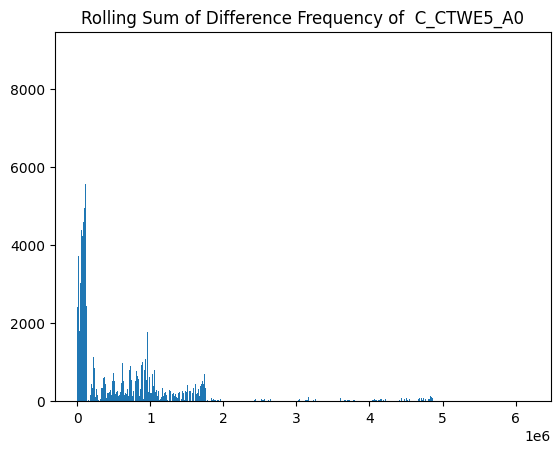

******************************************************************************


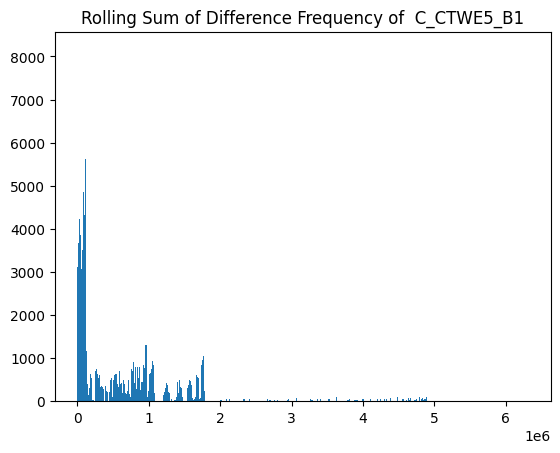

******************************************************************************


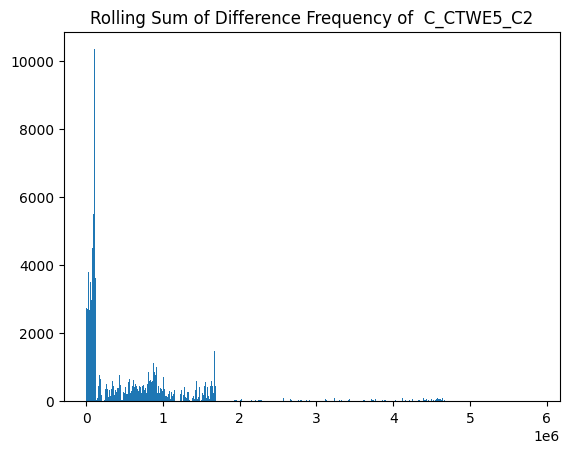

******************************************************************************


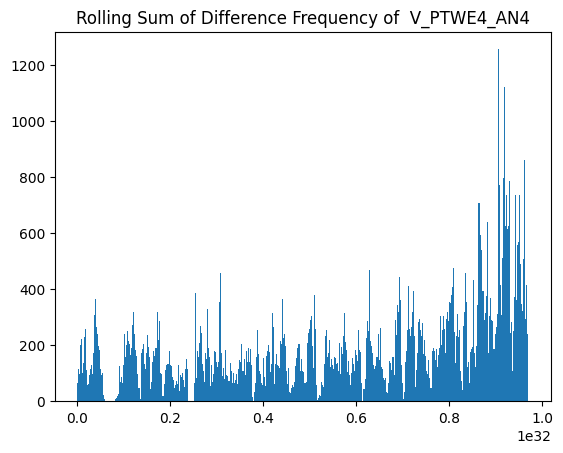

******************************************************************************


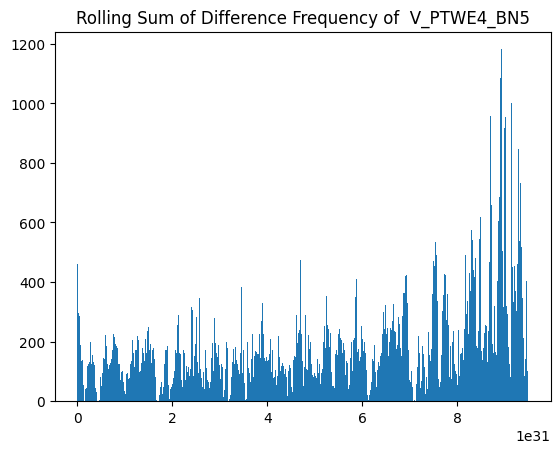

******************************************************************************


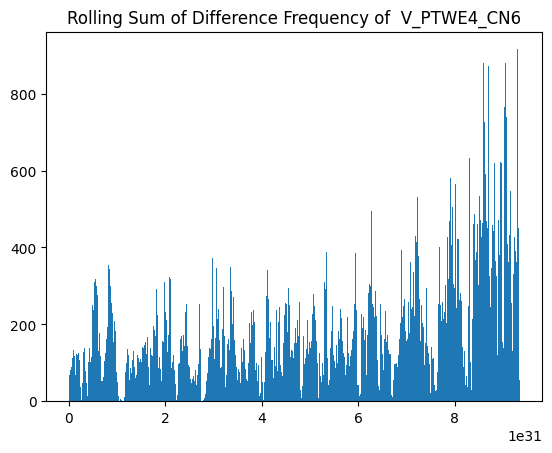

******************************************************************************


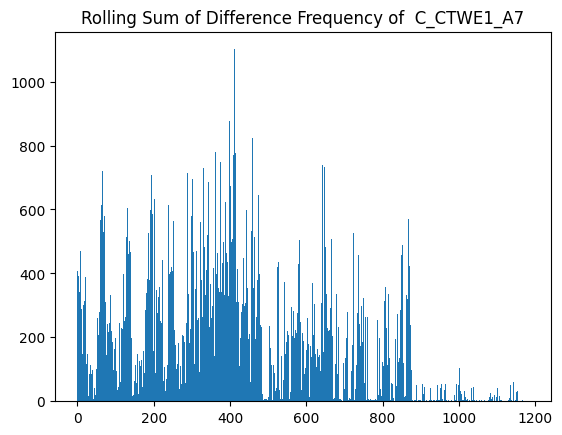

******************************************************************************


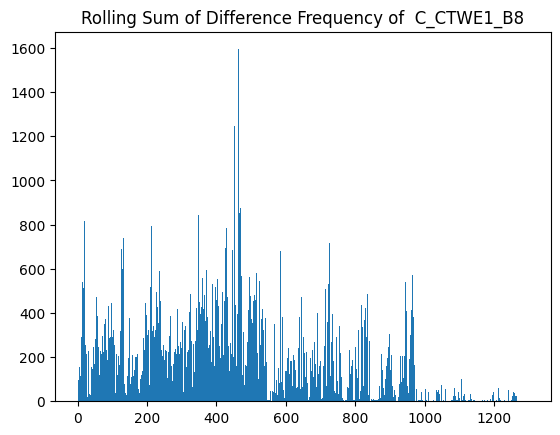

******************************************************************************


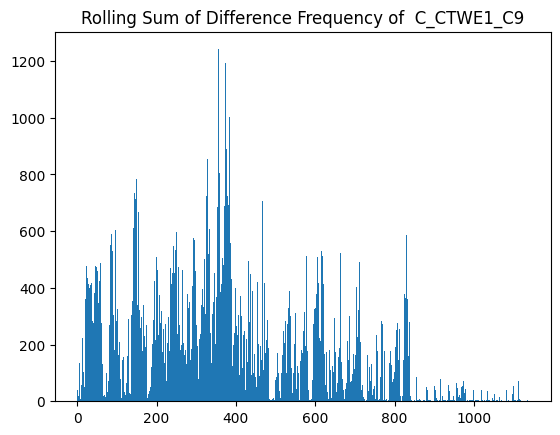

******************************************************************************


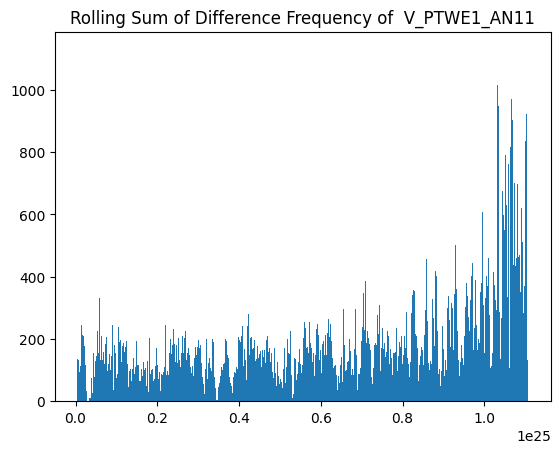

******************************************************************************


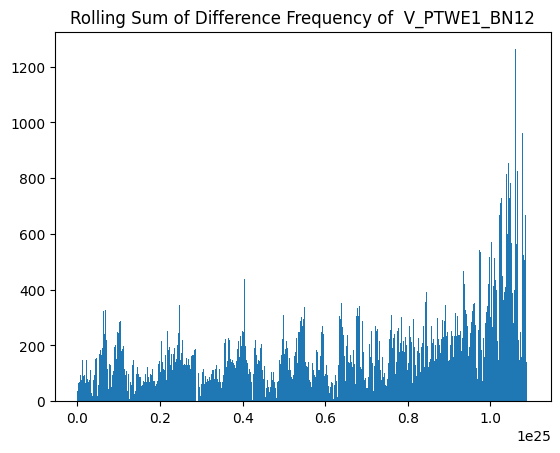

******************************************************************************


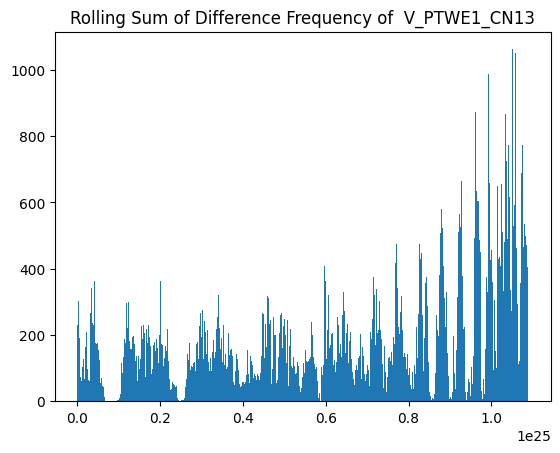

******************************************************************************


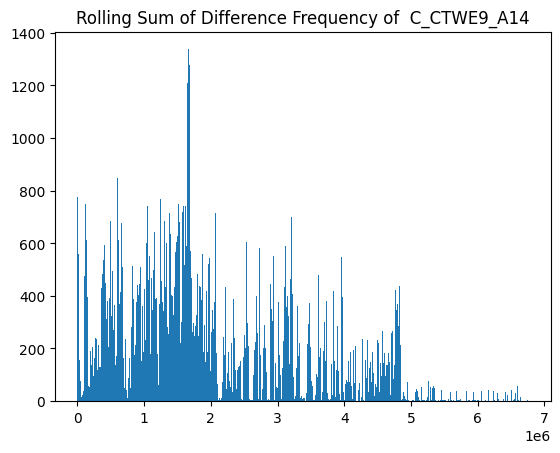

******************************************************************************


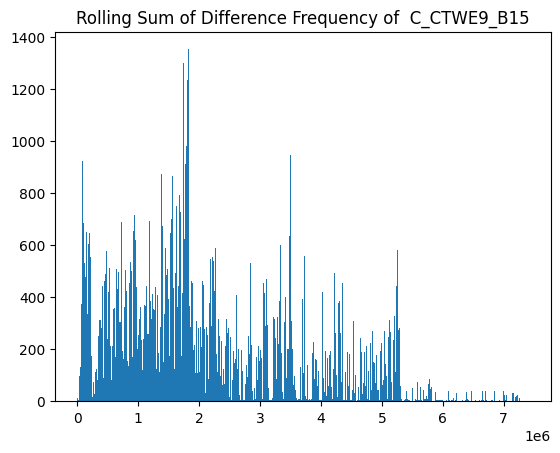

******************************************************************************


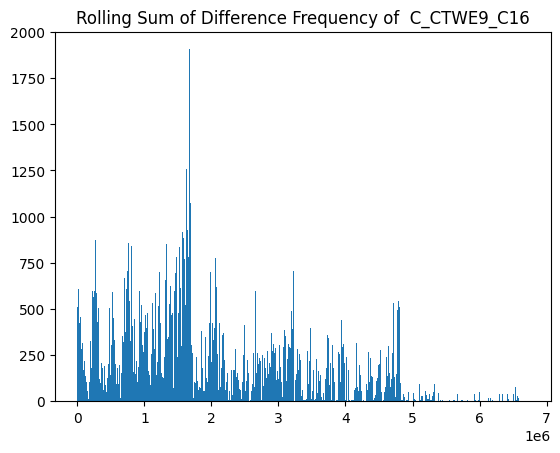

******************************************************************************


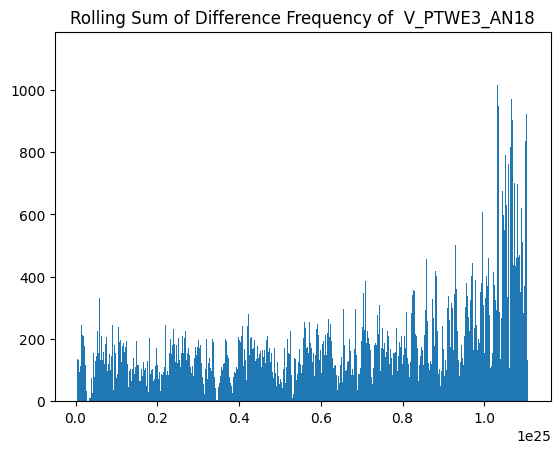

******************************************************************************


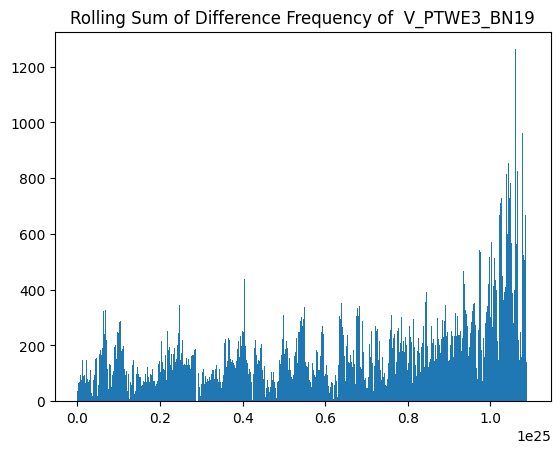

******************************************************************************


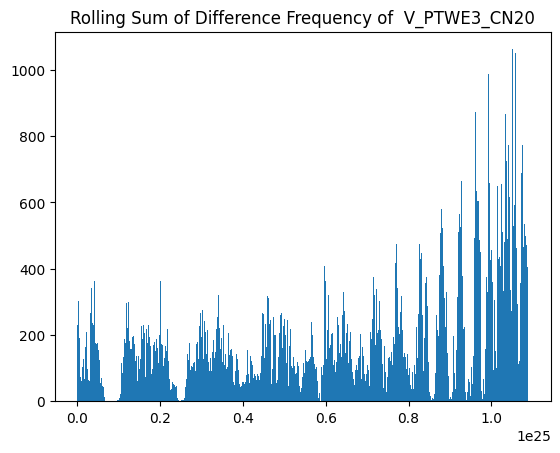

******************************************************************************


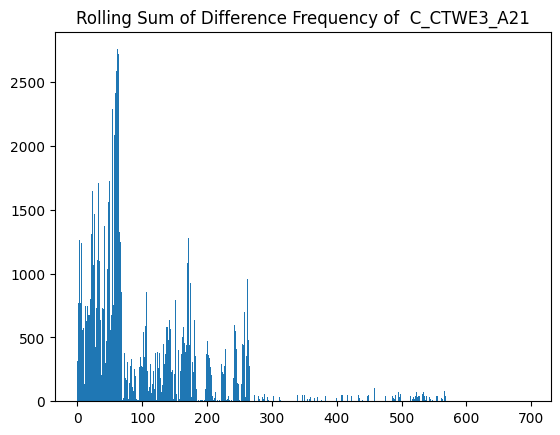

******************************************************************************


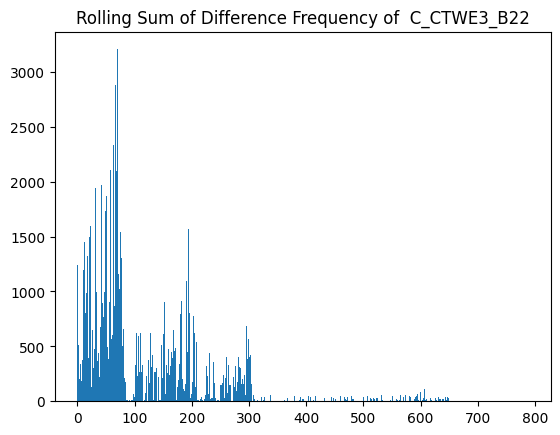

******************************************************************************


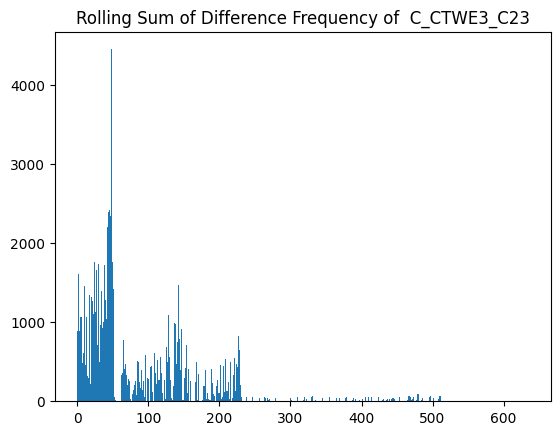

******************************************************************************


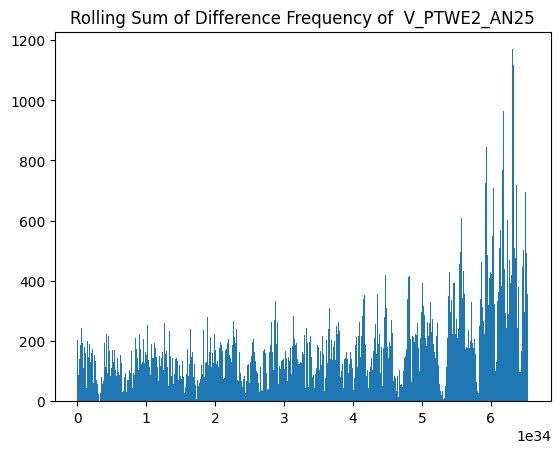

******************************************************************************


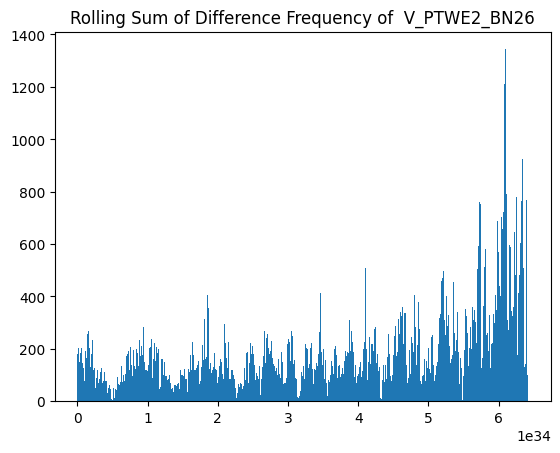

******************************************************************************


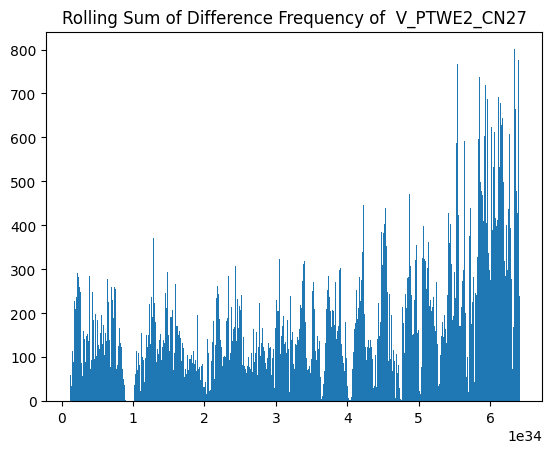

******************************************************************************


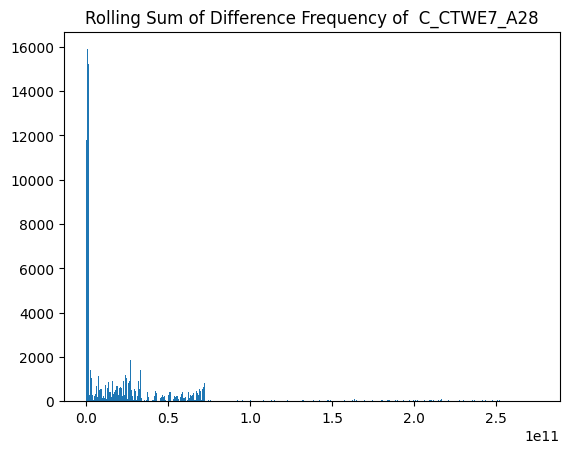

******************************************************************************


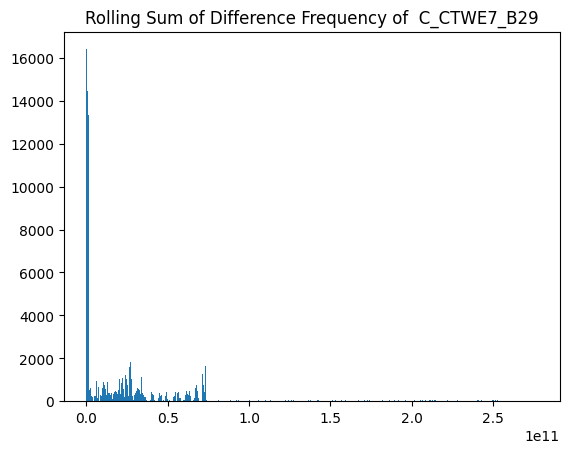

******************************************************************************


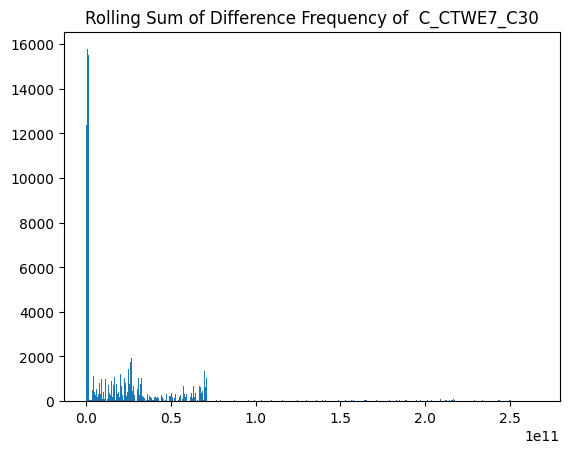

******************************************************************************


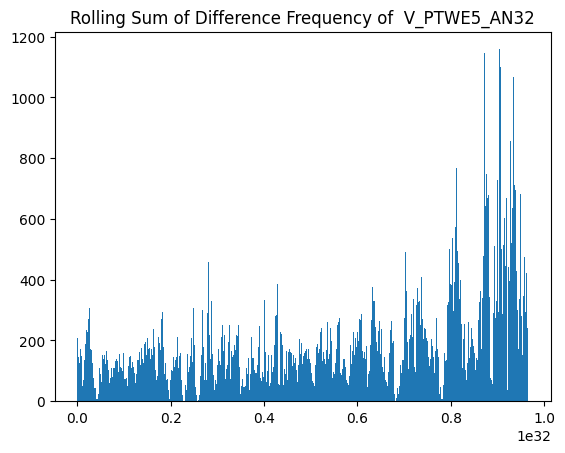

******************************************************************************


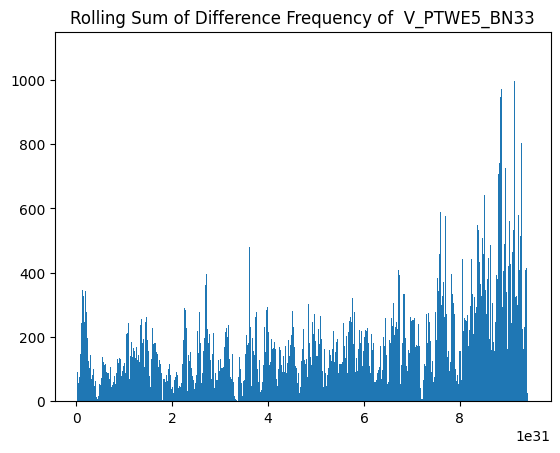

******************************************************************************


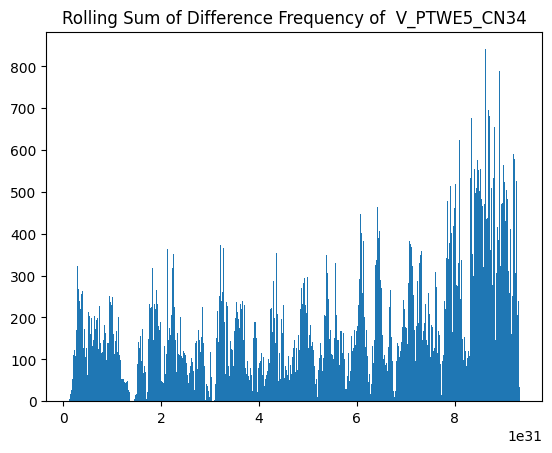

******************************************************************************


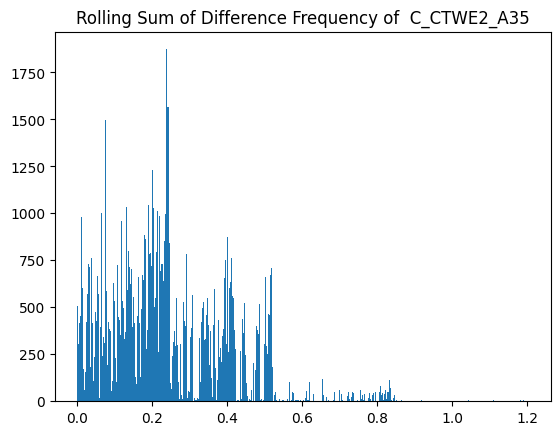

******************************************************************************


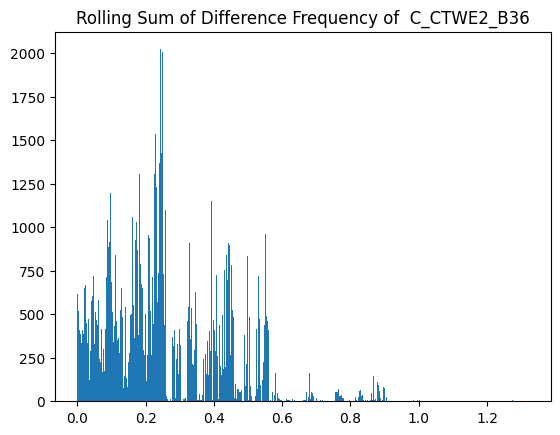

******************************************************************************


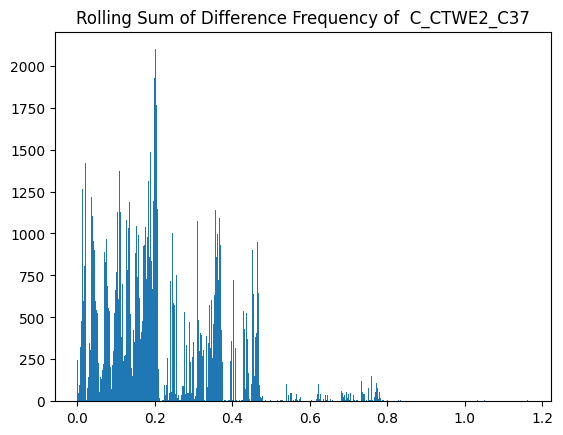

******************************************************************************


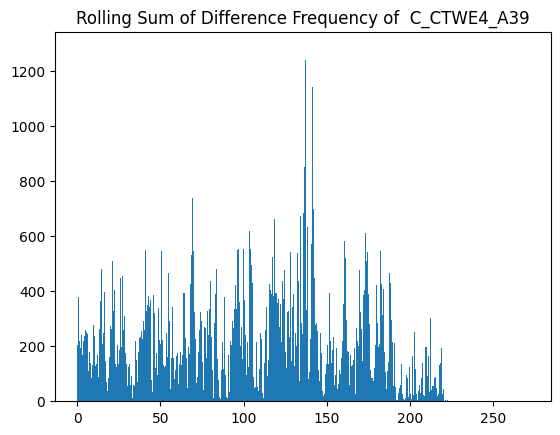

******************************************************************************


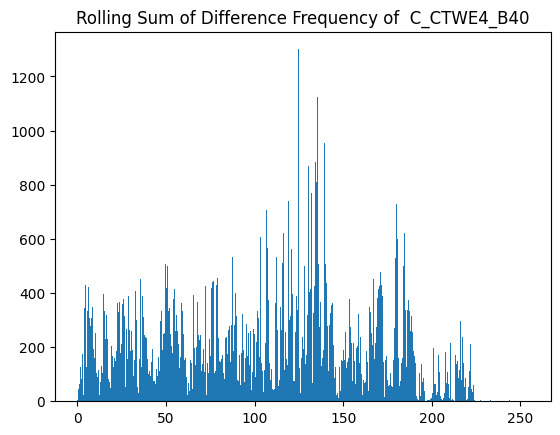

******************************************************************************


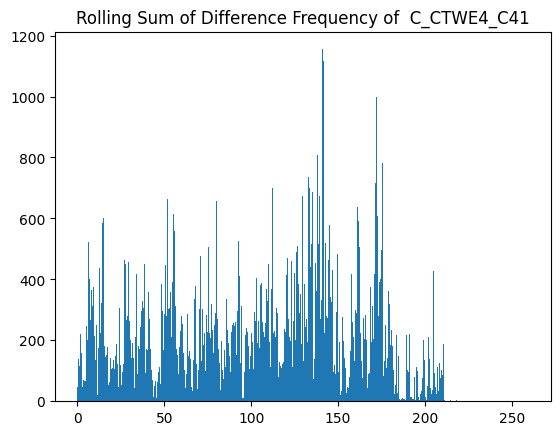

******************************************************************************


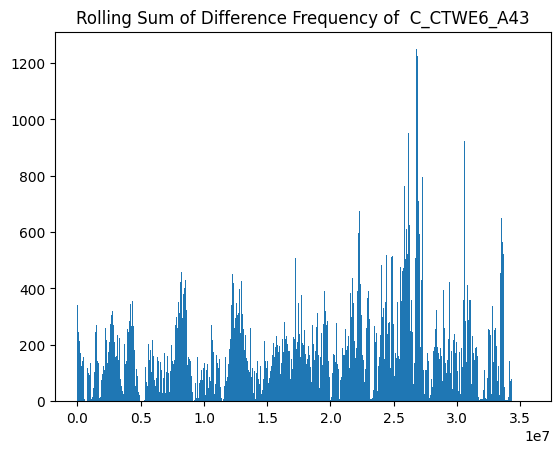

******************************************************************************


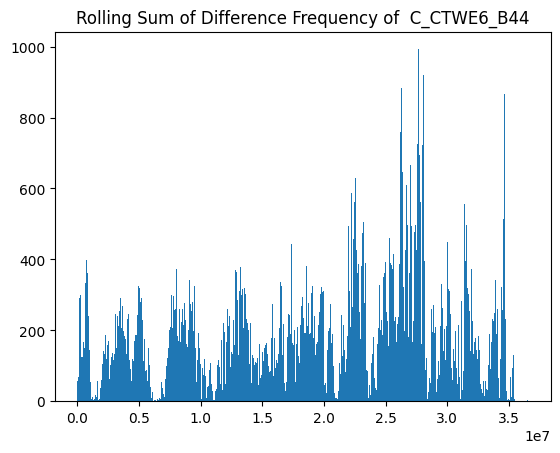

******************************************************************************


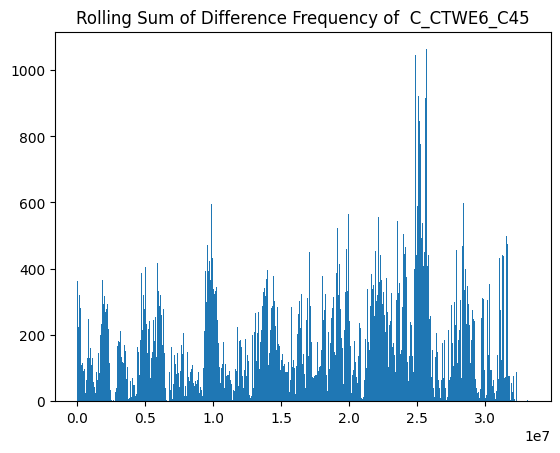

******************************************************************************


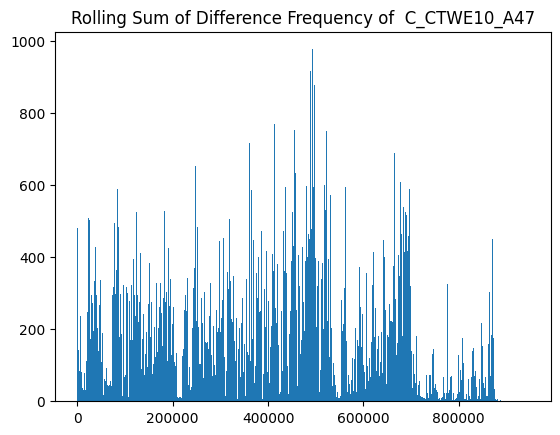

******************************************************************************


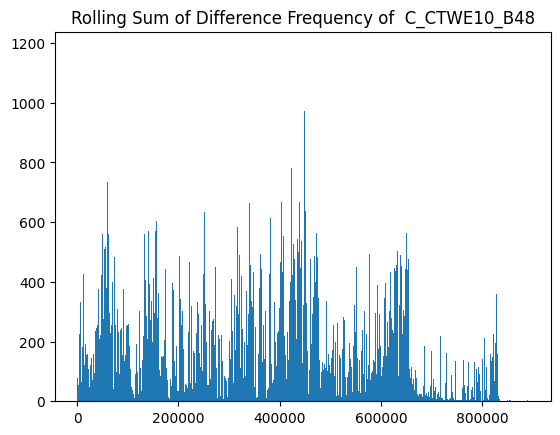

******************************************************************************


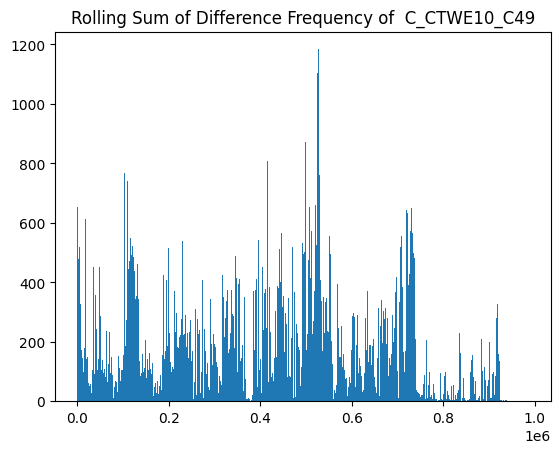

******************************************************************************


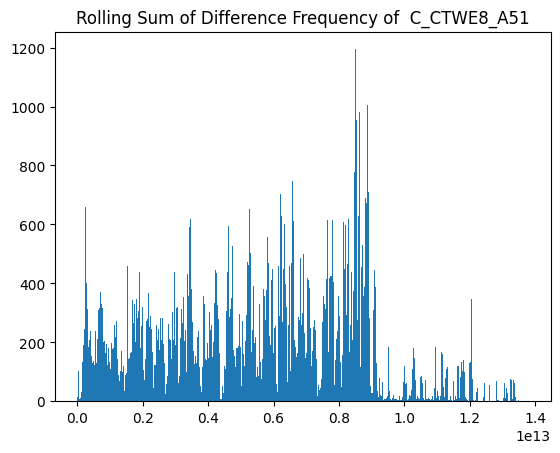

******************************************************************************


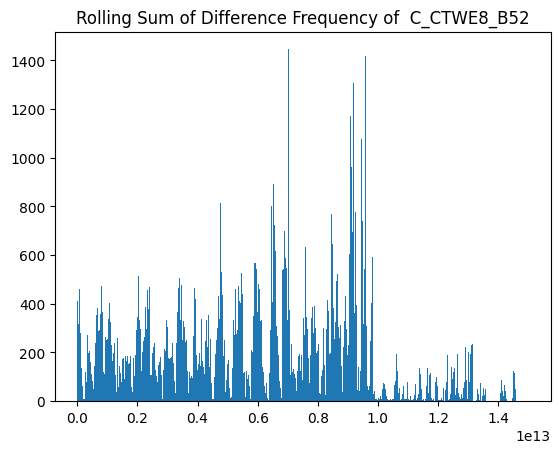

******************************************************************************


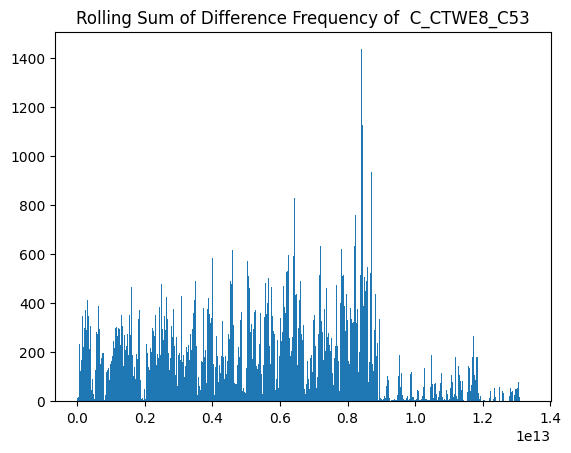

******************************************************************************


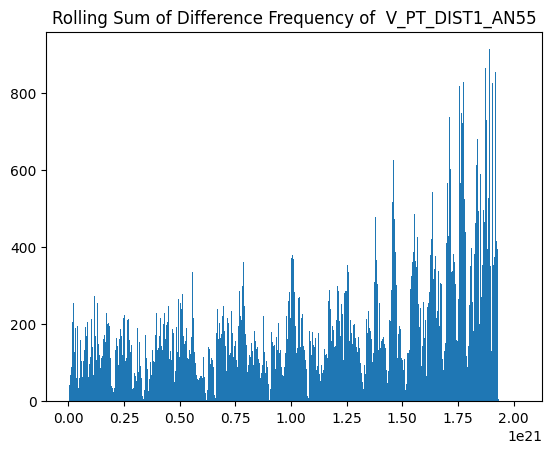

******************************************************************************


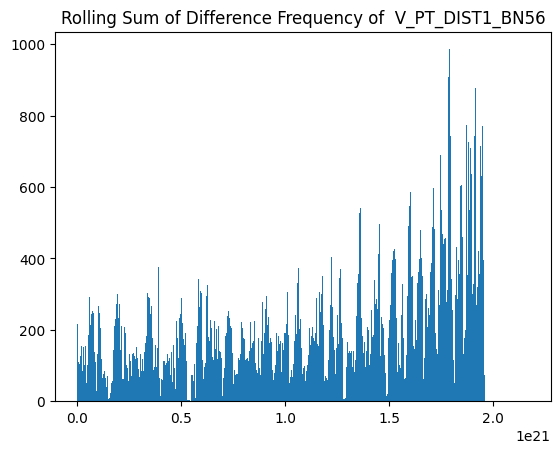

******************************************************************************


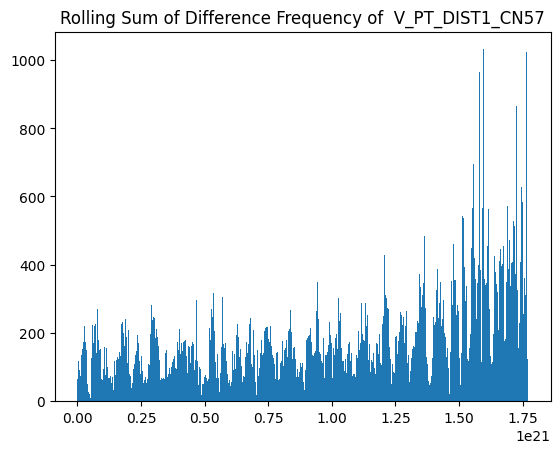

******************************************************************************


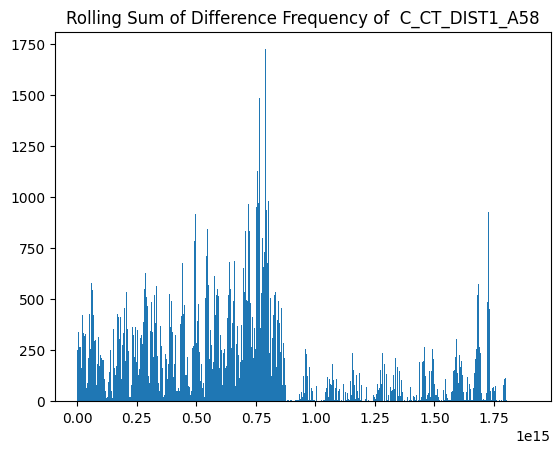

******************************************************************************


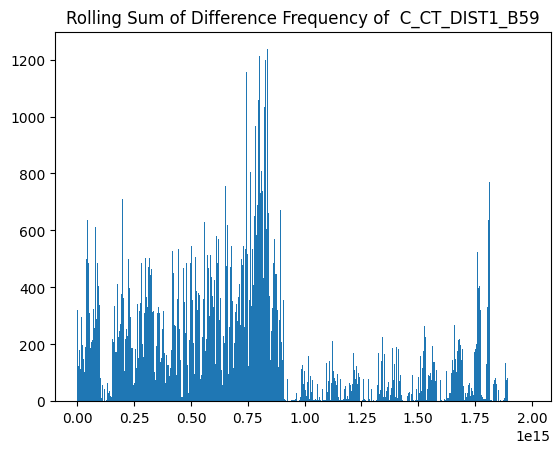

******************************************************************************


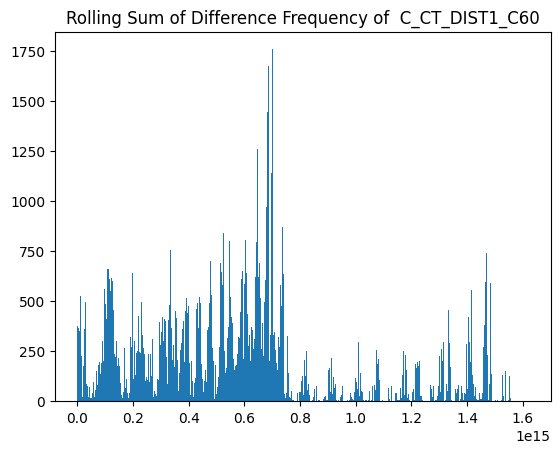

******************************************************************************


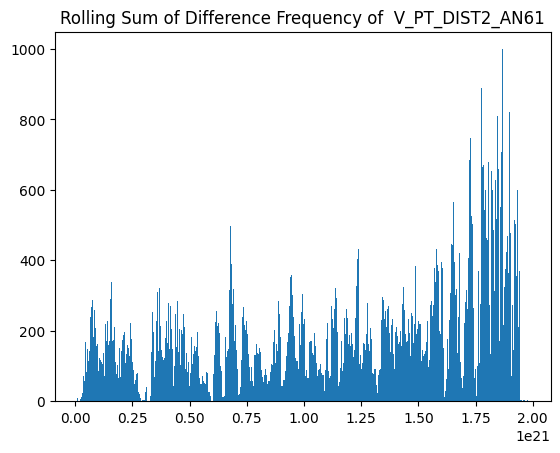

******************************************************************************


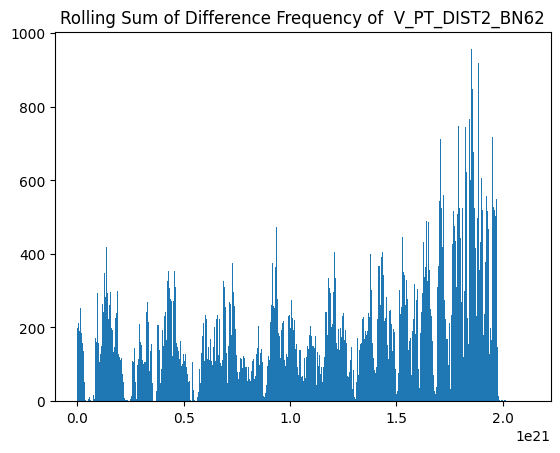

******************************************************************************


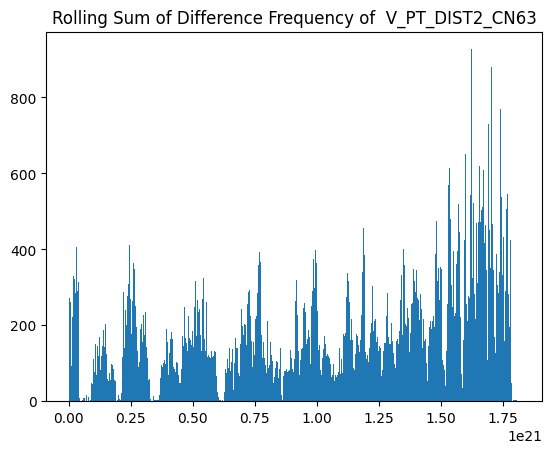

******************************************************************************


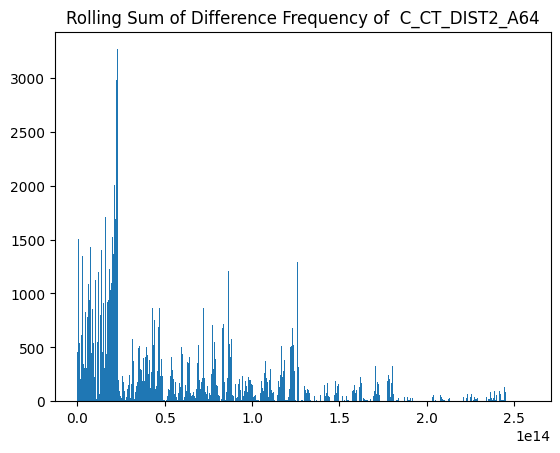

******************************************************************************


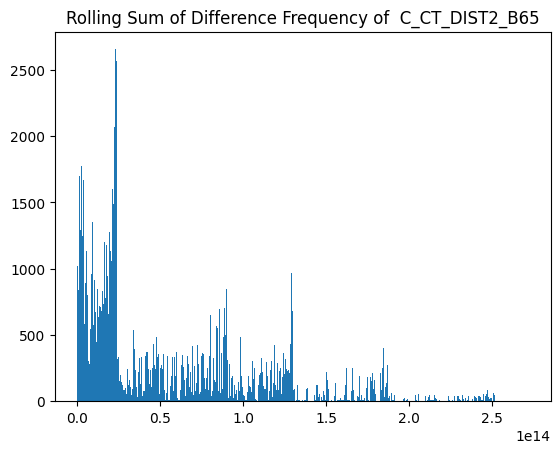

******************************************************************************


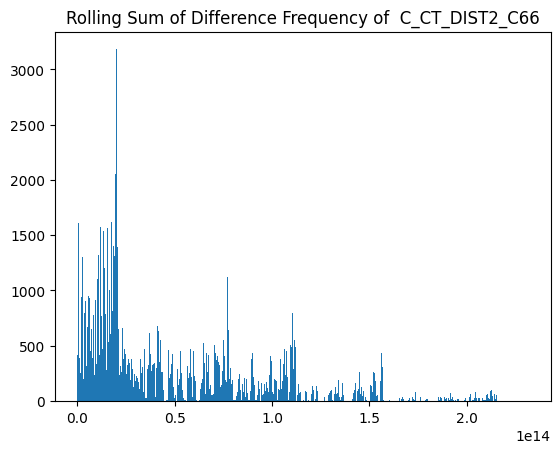

******************************************************************************


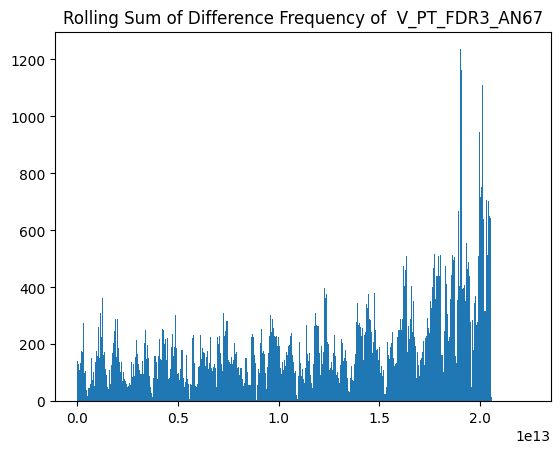

******************************************************************************


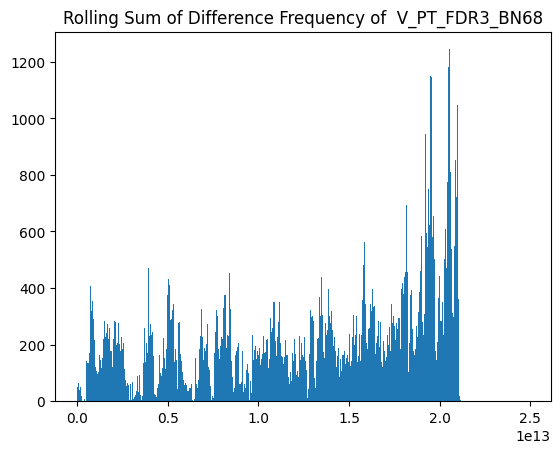

******************************************************************************


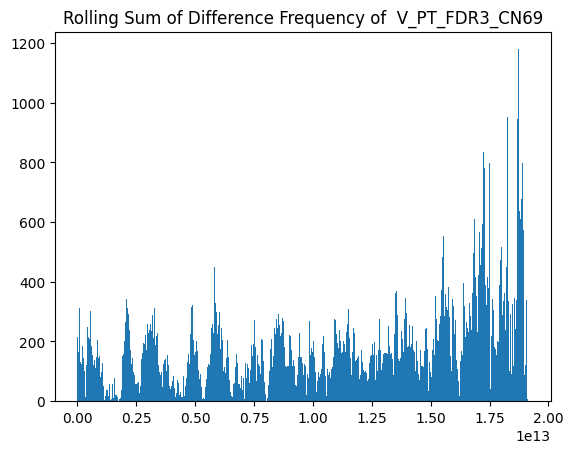

******************************************************************************


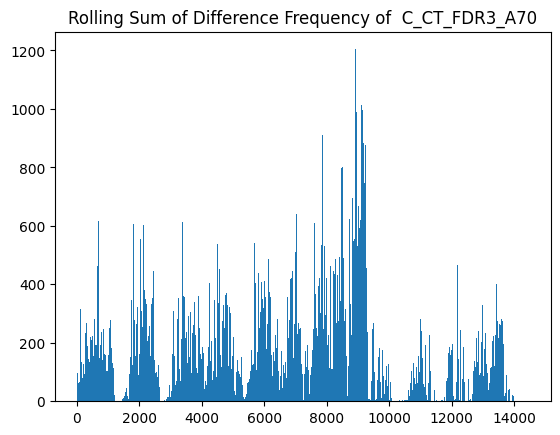

******************************************************************************


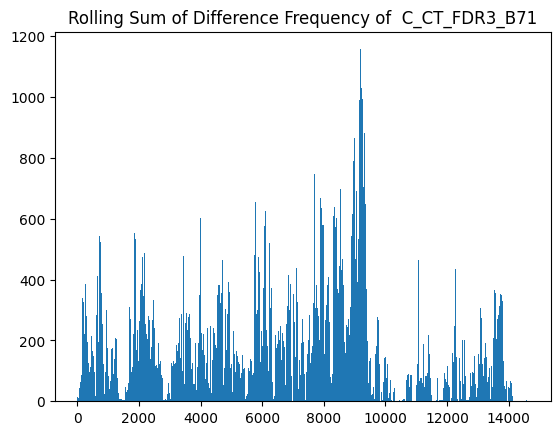

******************************************************************************


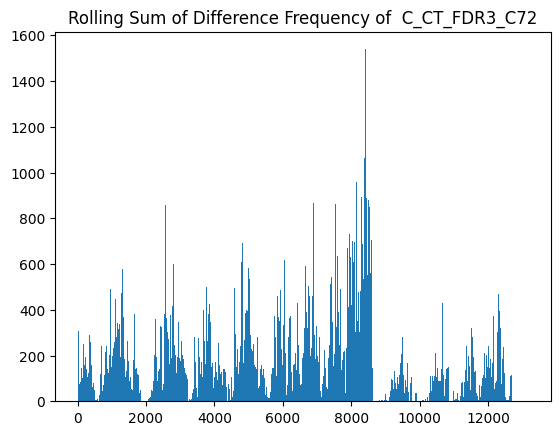

******************************************************************************


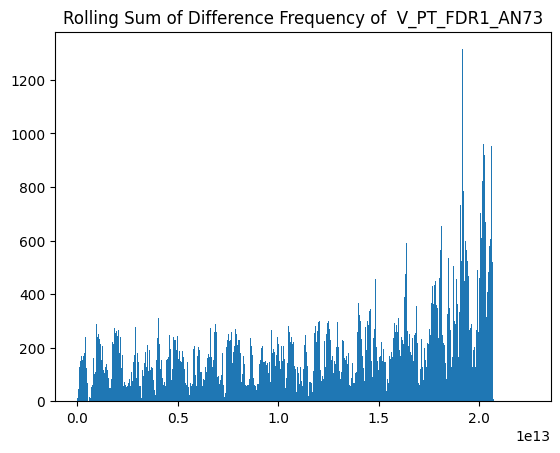

******************************************************************************


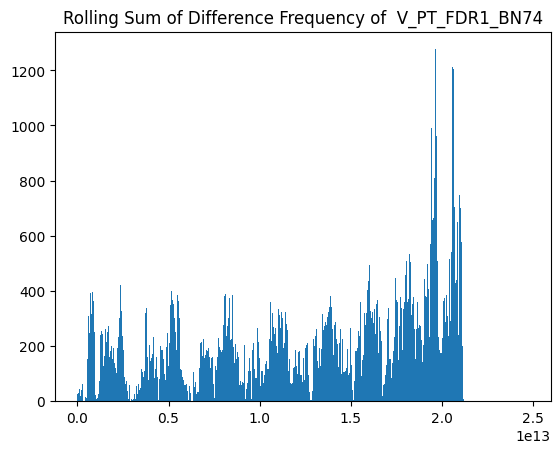

******************************************************************************


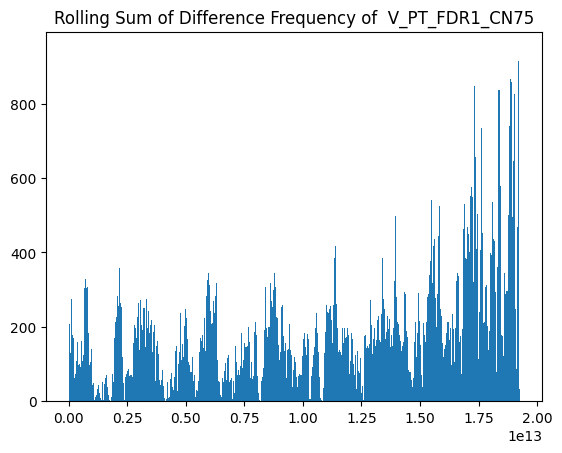

******************************************************************************


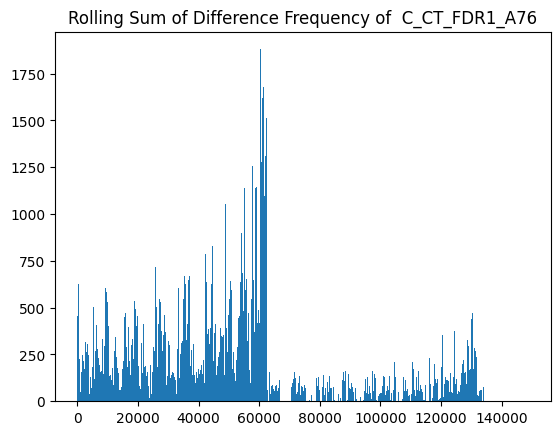

******************************************************************************


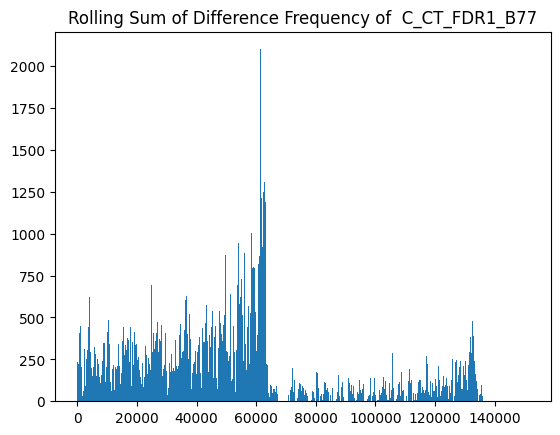

******************************************************************************


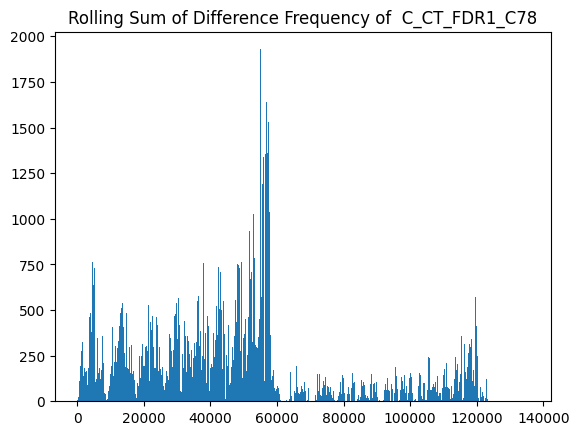

******************************************************************************


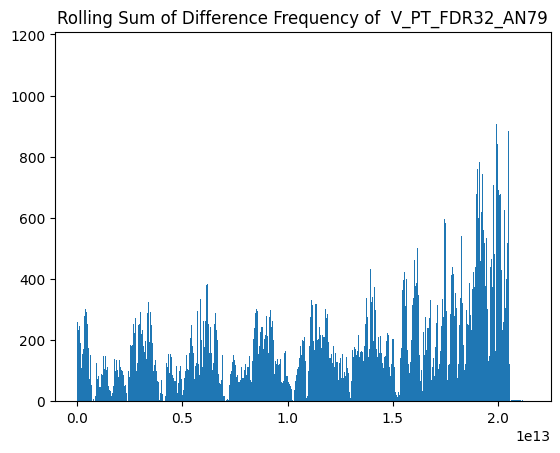

******************************************************************************


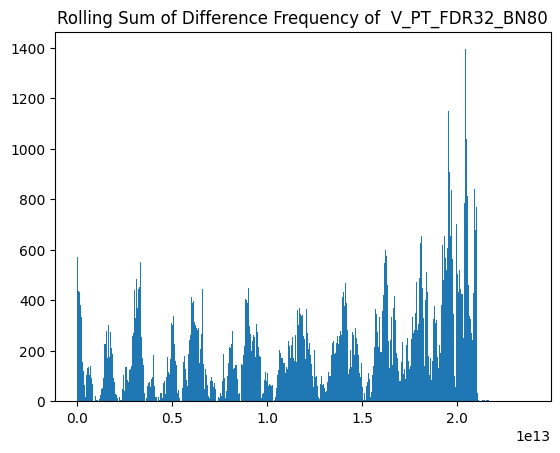

******************************************************************************


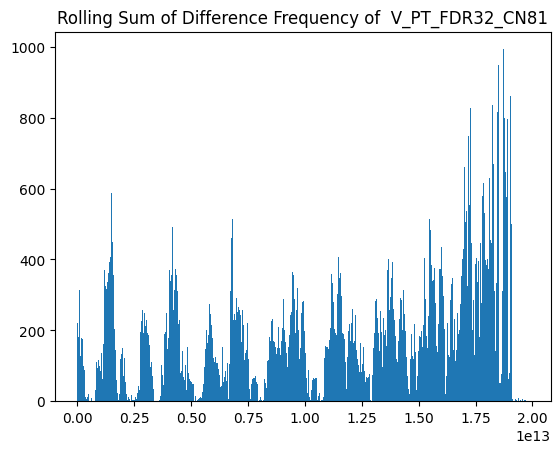

******************************************************************************


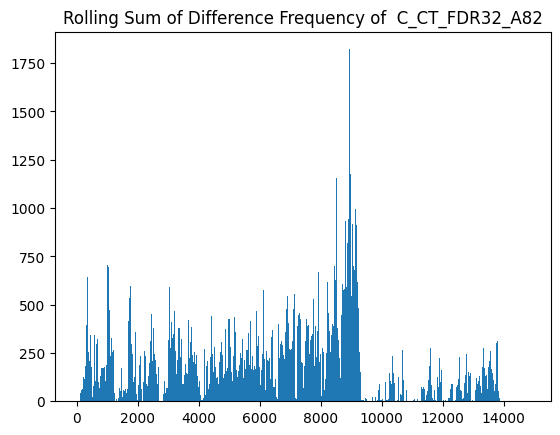

******************************************************************************


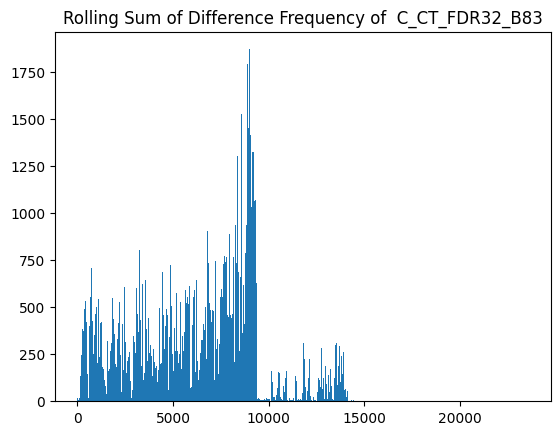

******************************************************************************


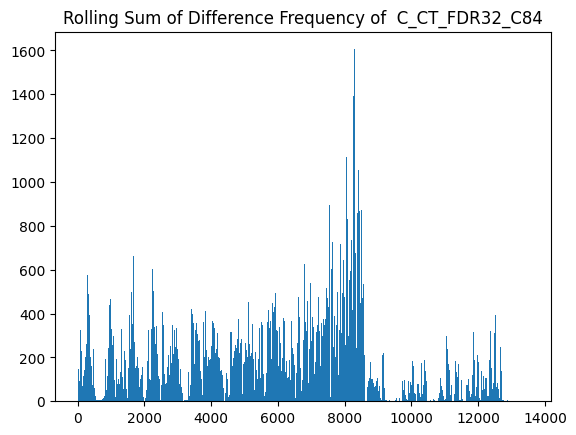

******************************************************************************


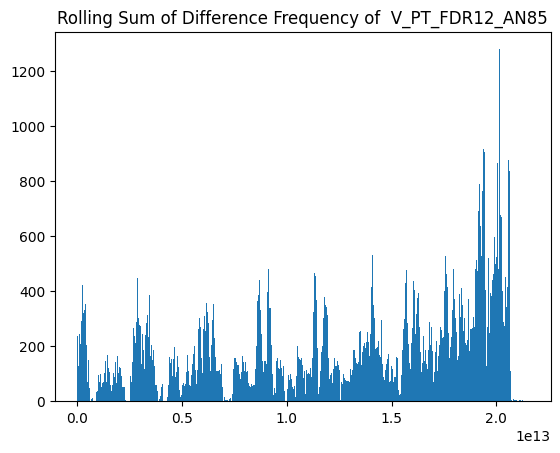

******************************************************************************


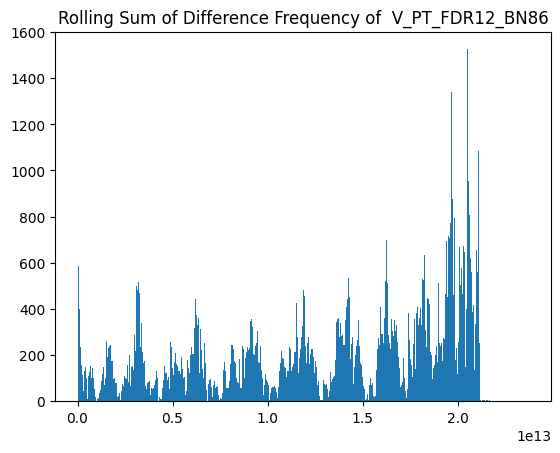

******************************************************************************


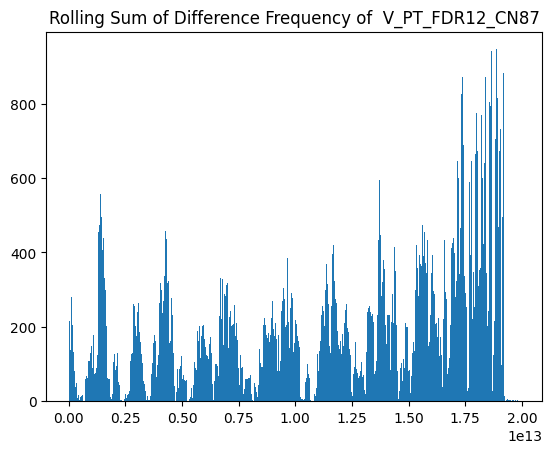

******************************************************************************


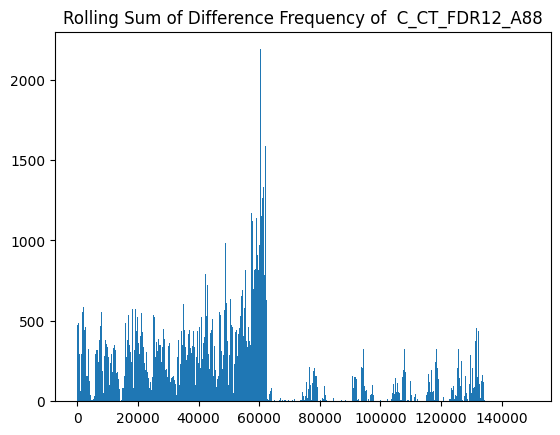

******************************************************************************


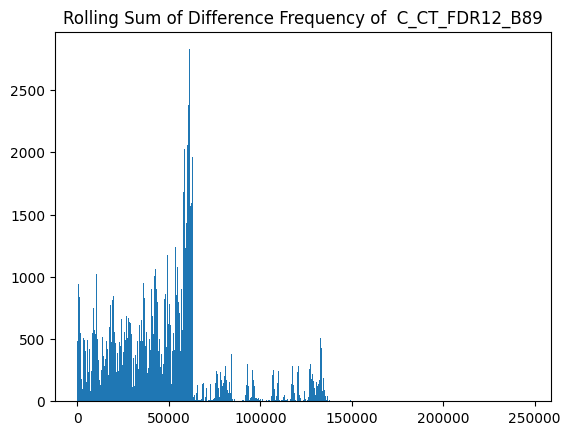

******************************************************************************


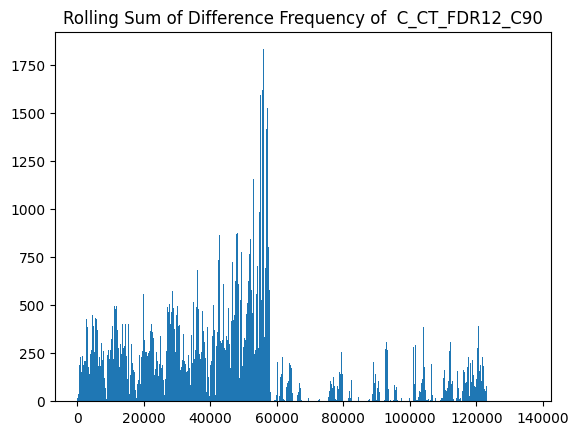

******************************************************************************


In [12]:
# do analysis for multi plot
thresholdsc = []
thresholds2c = []
cols = data.columns

# correlation window
window = 350

# rolling sum window
w = 1

quant = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    
    corr_multi = covariance_multi(data, var1_index, var2_indices, window)
    thresholdsc.append(
        get_empirical_diff_threshold(stat=corr_multi, window=w, fn=roll_sums, axis=-1, quantile=quant,
                                     sensor_names=[var1_index]))
    
    print("******************************************************************************")


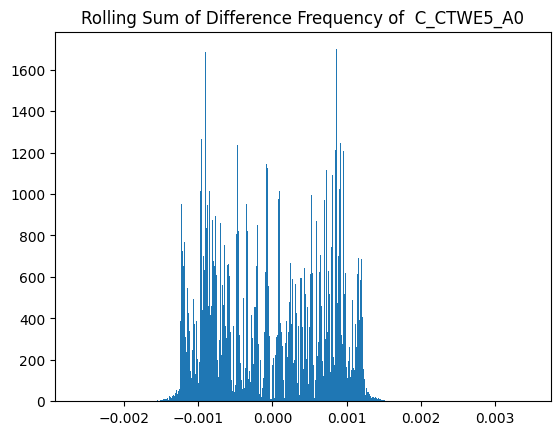

******************************************************************************


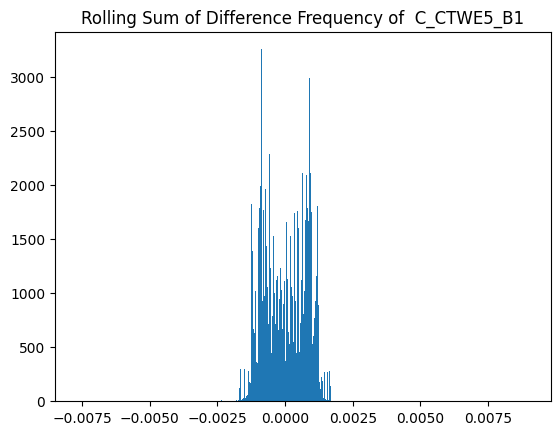

******************************************************************************


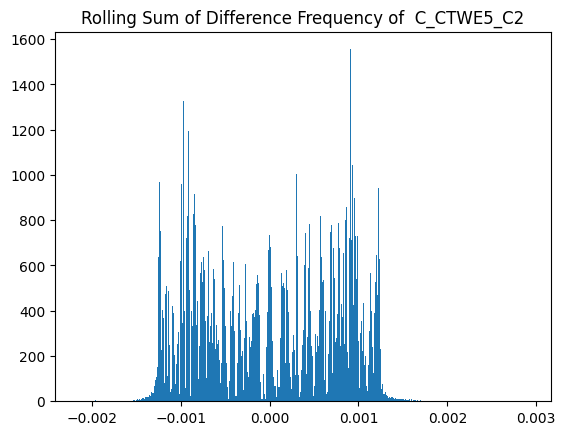

******************************************************************************


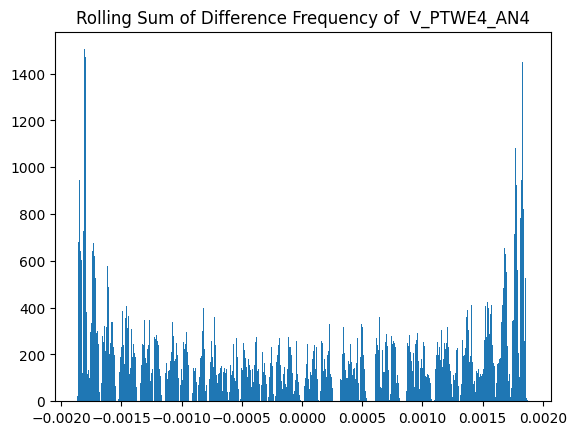

******************************************************************************


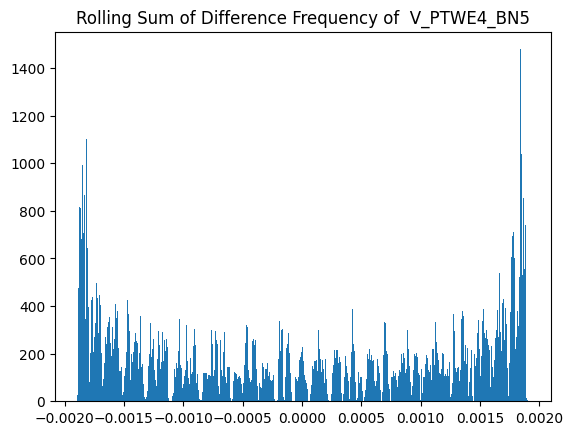

******************************************************************************


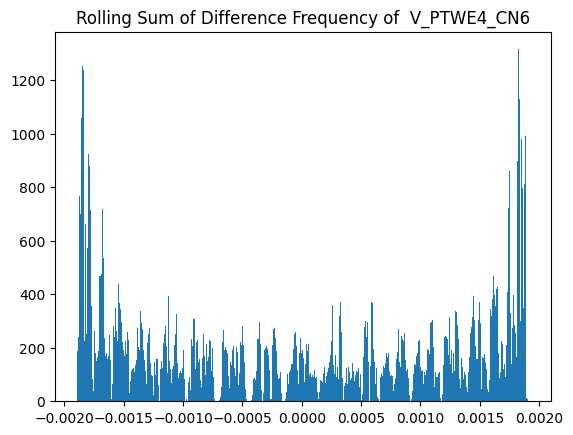

******************************************************************************


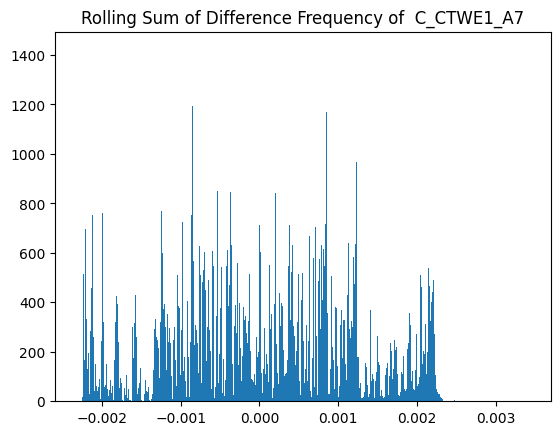

******************************************************************************


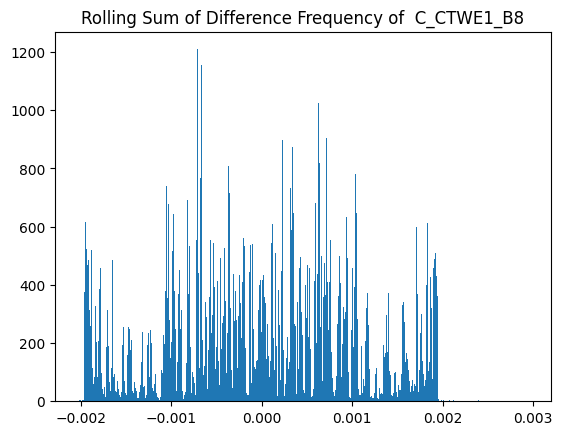

******************************************************************************


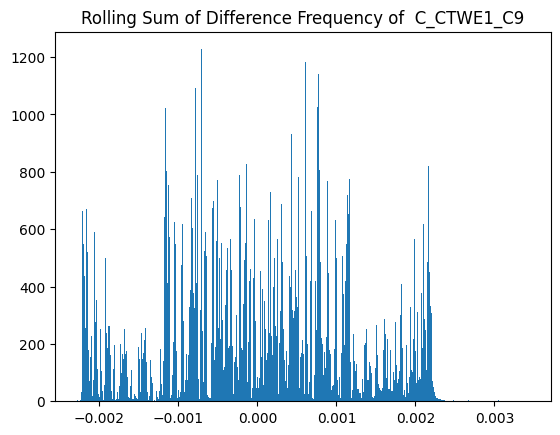

******************************************************************************


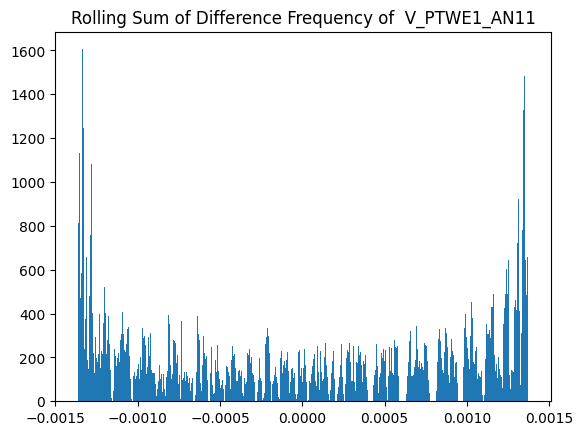

******************************************************************************


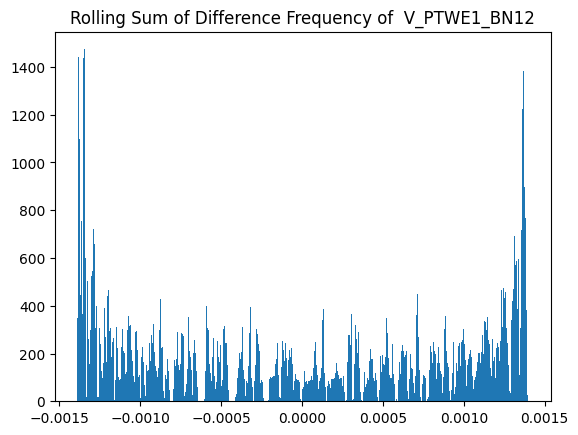

******************************************************************************


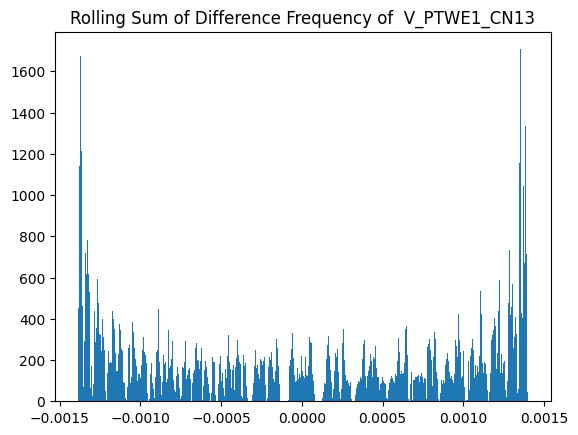

******************************************************************************


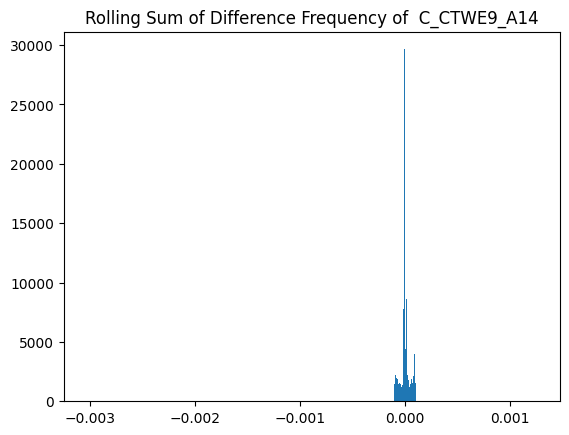

******************************************************************************


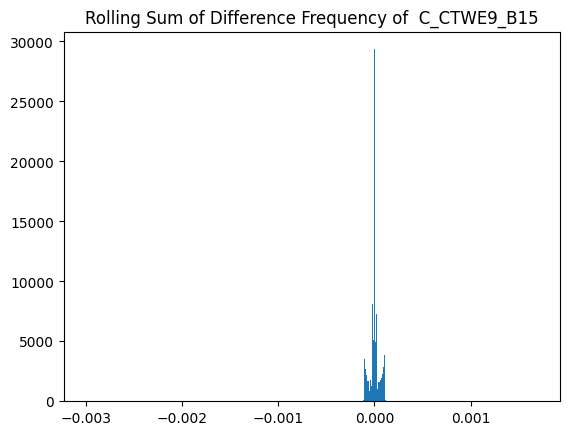

******************************************************************************


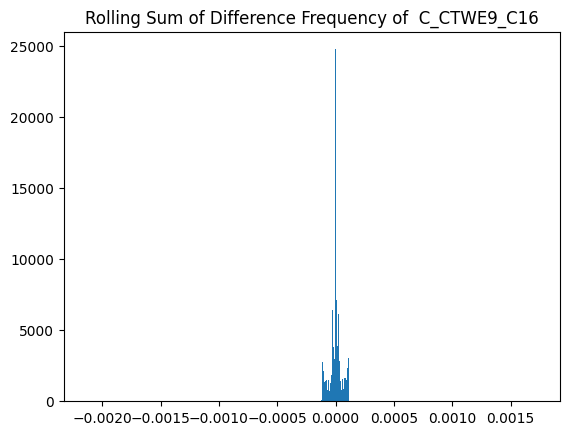

******************************************************************************


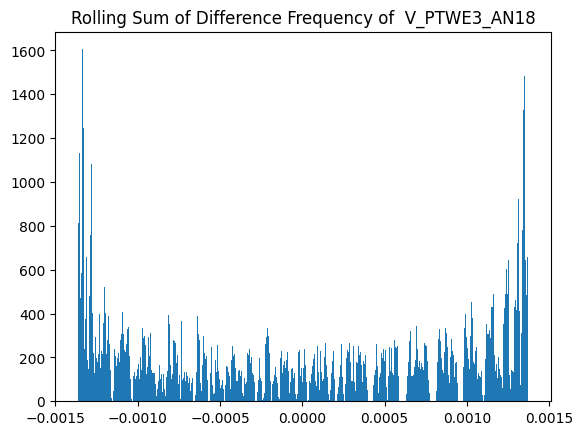

******************************************************************************


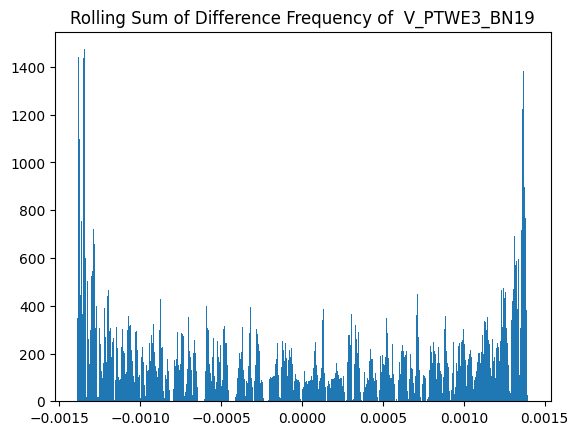

******************************************************************************


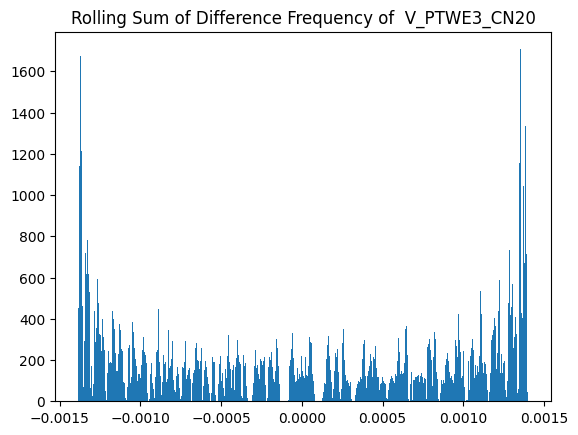

******************************************************************************


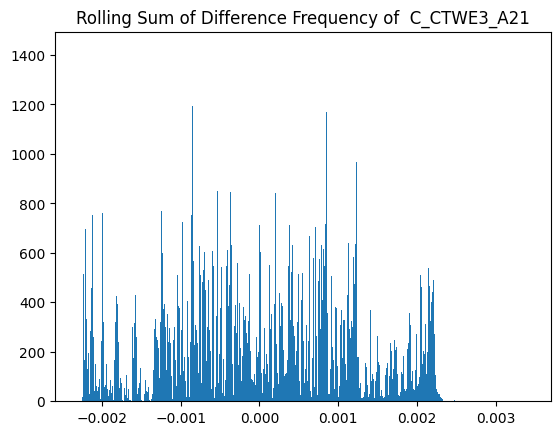

******************************************************************************


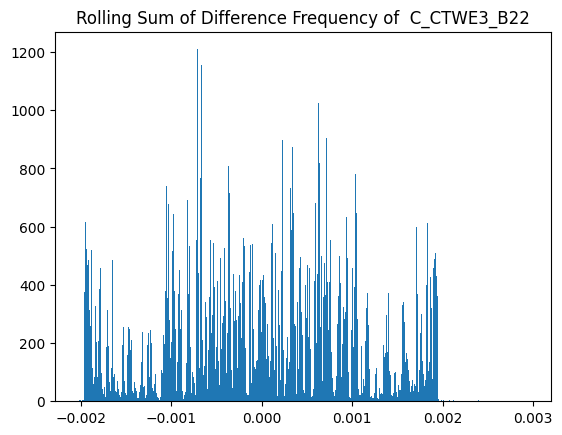

******************************************************************************


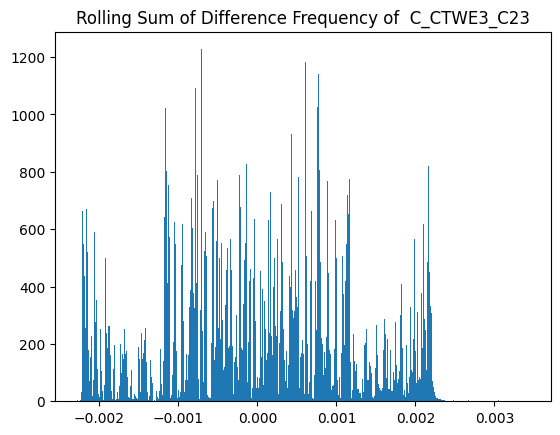

******************************************************************************


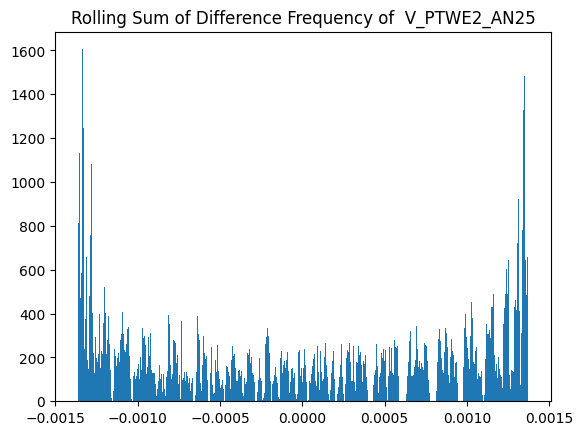

******************************************************************************


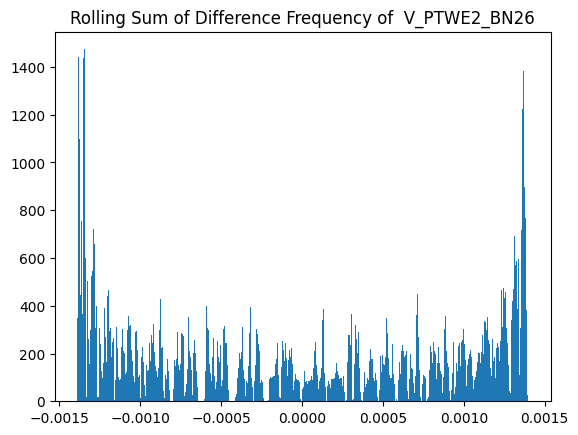

******************************************************************************


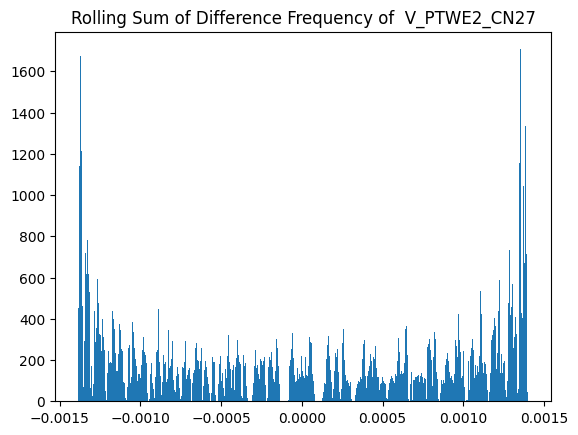

******************************************************************************


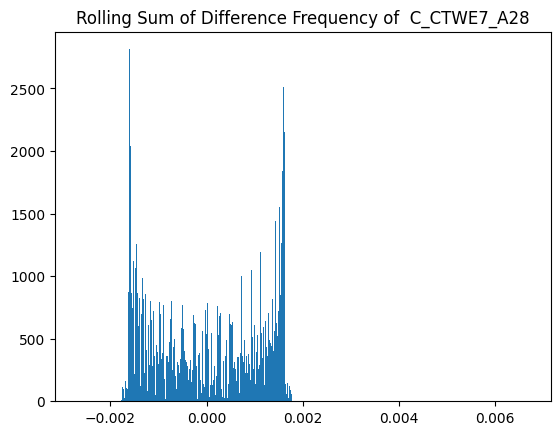

******************************************************************************


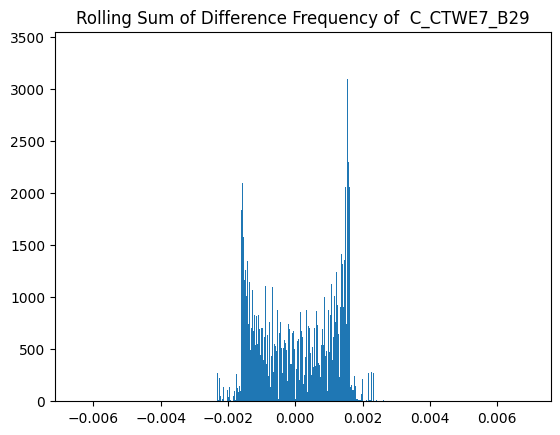

******************************************************************************


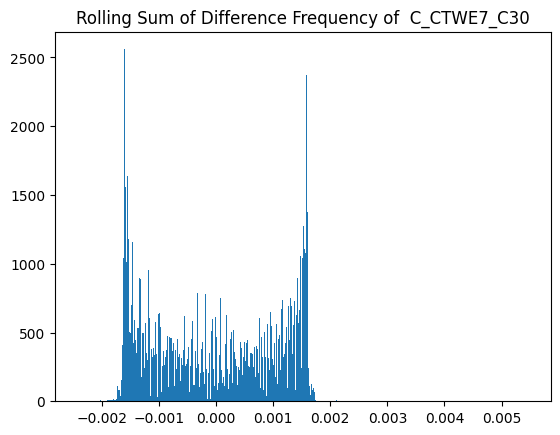

******************************************************************************


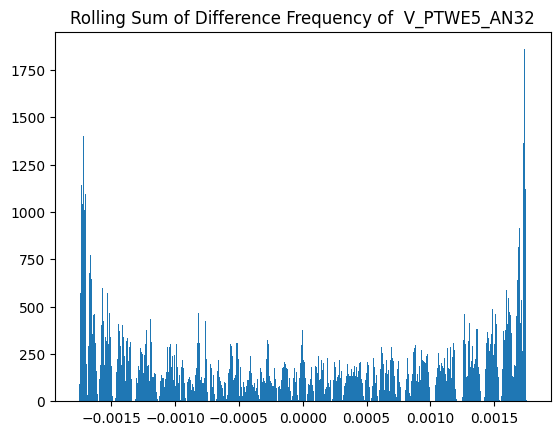

******************************************************************************


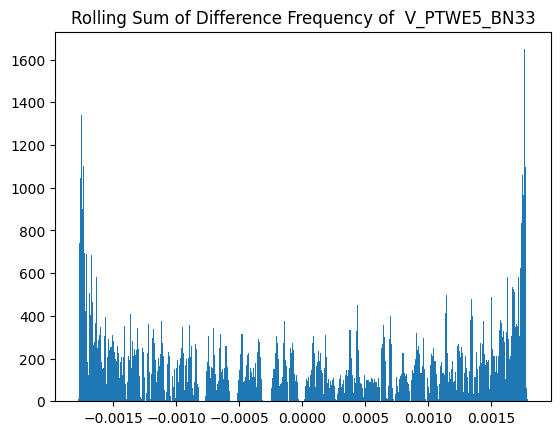

******************************************************************************


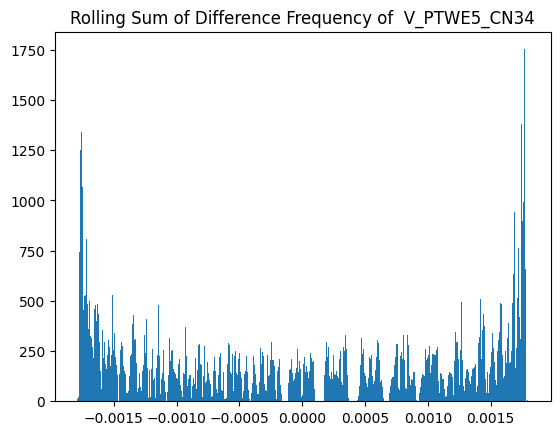

******************************************************************************


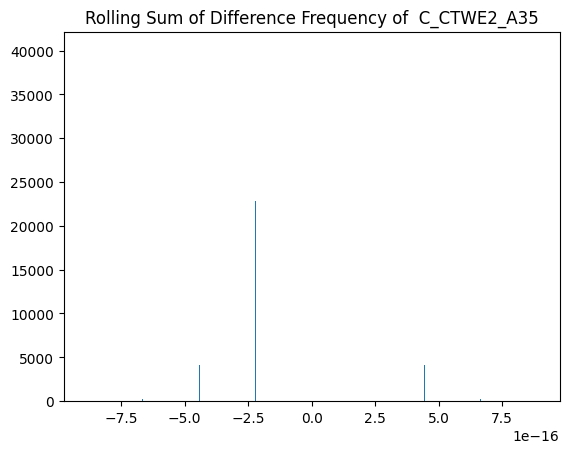

******************************************************************************


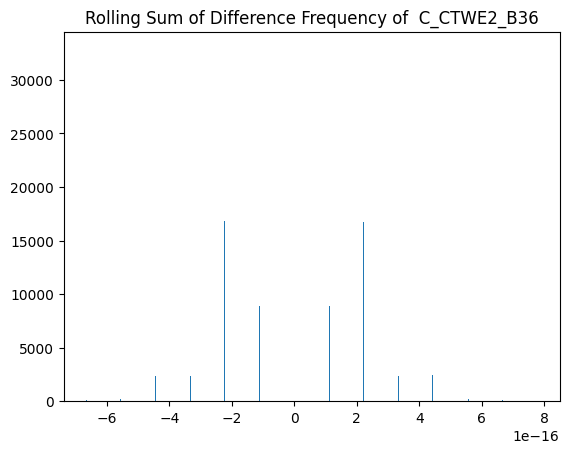

******************************************************************************


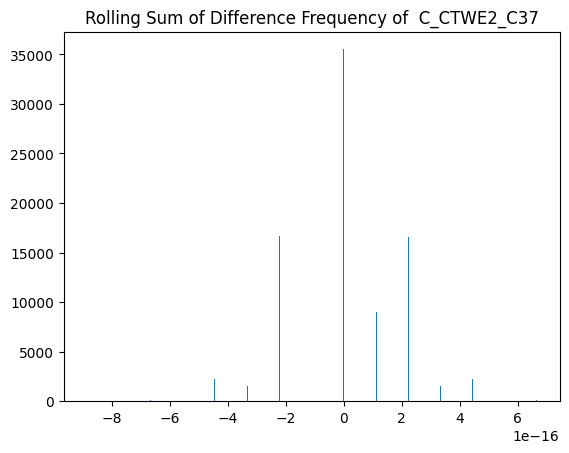

******************************************************************************


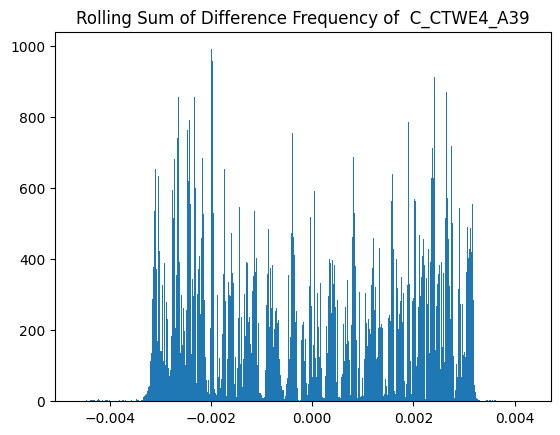

******************************************************************************


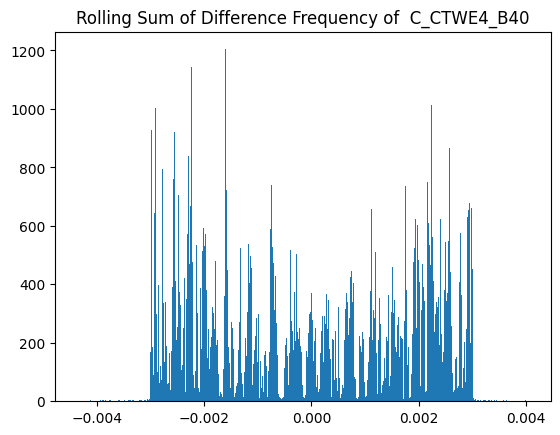

******************************************************************************


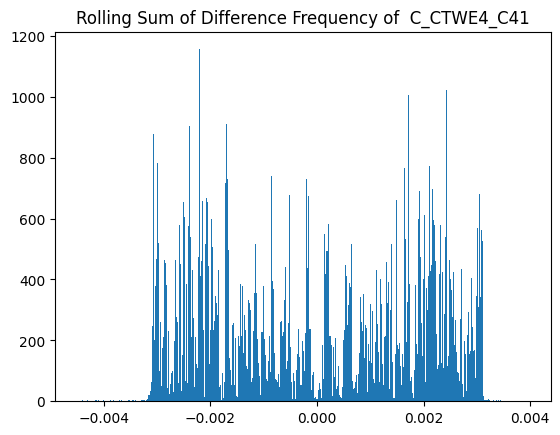

******************************************************************************


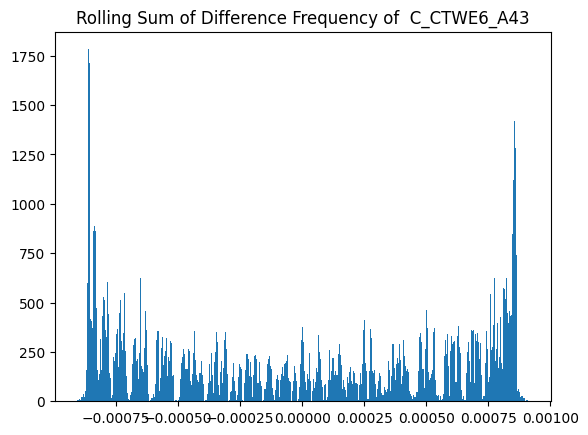

******************************************************************************


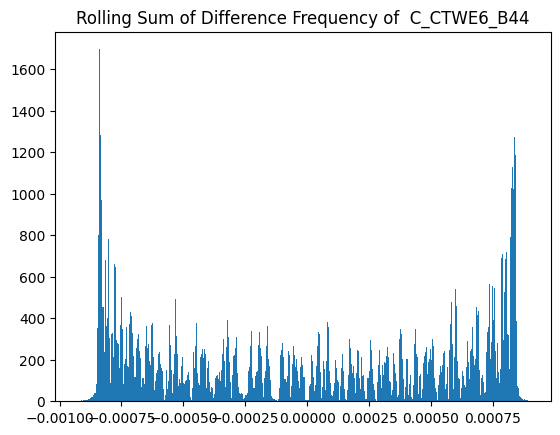

******************************************************************************


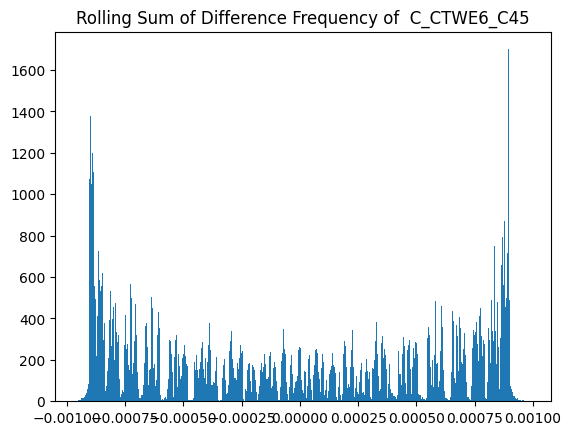

******************************************************************************


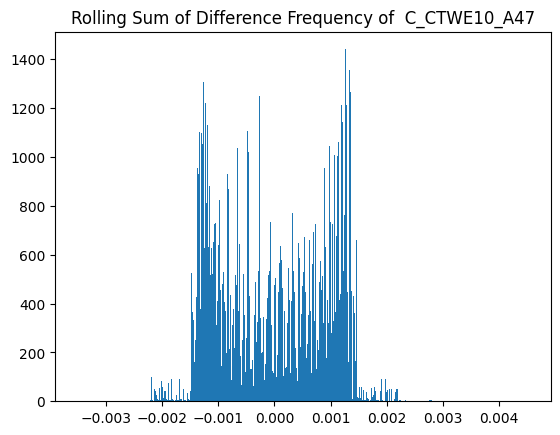

******************************************************************************


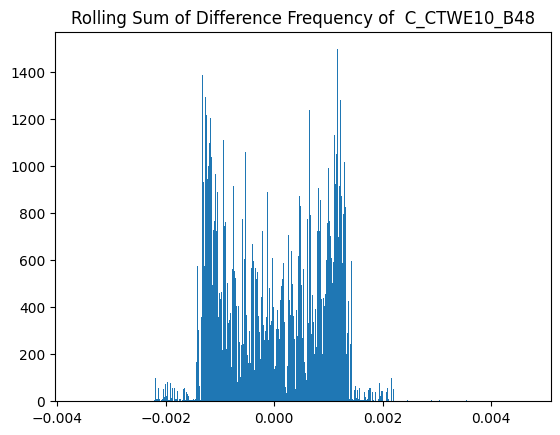

******************************************************************************


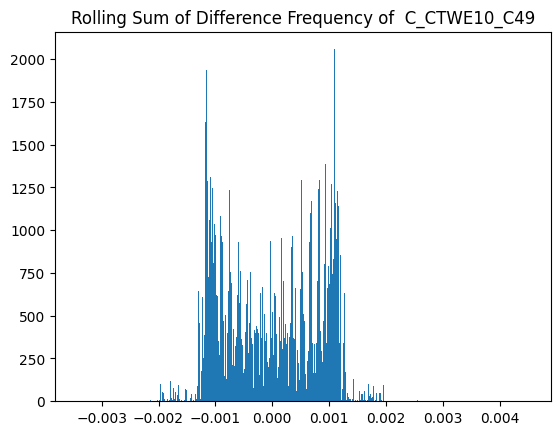

******************************************************************************


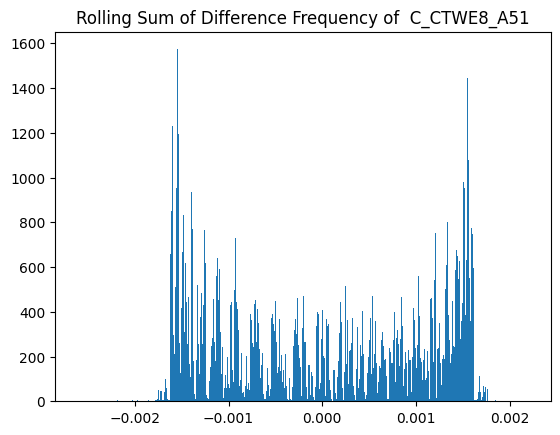

******************************************************************************


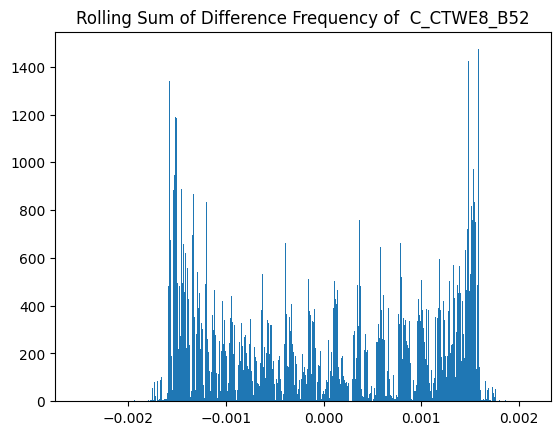

******************************************************************************


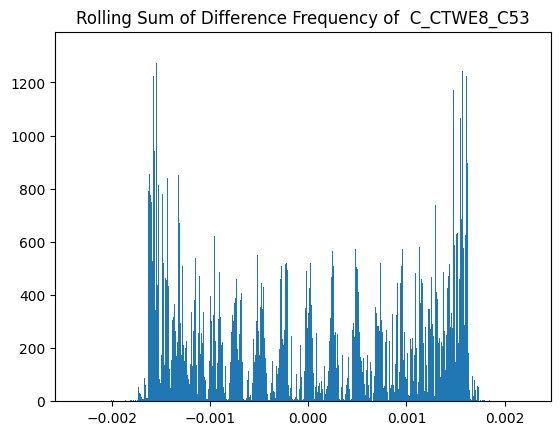

******************************************************************************


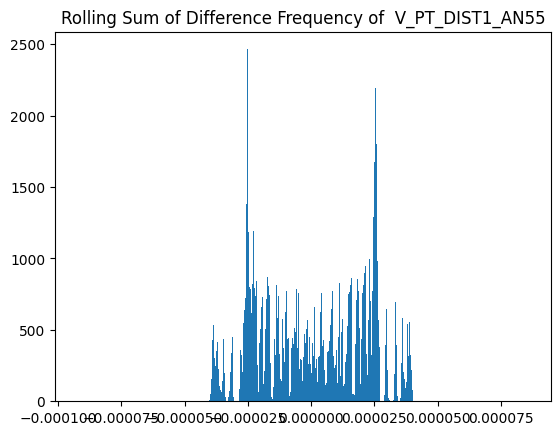

******************************************************************************


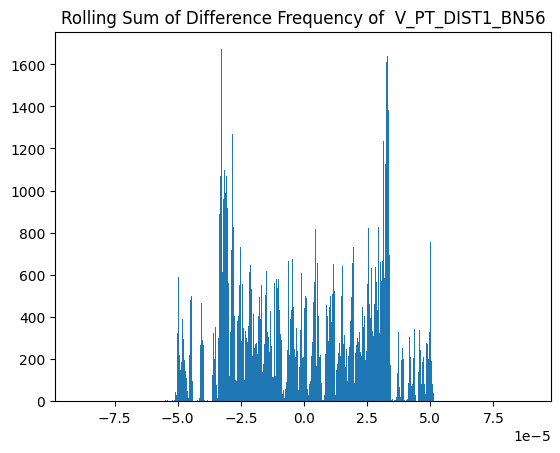

******************************************************************************


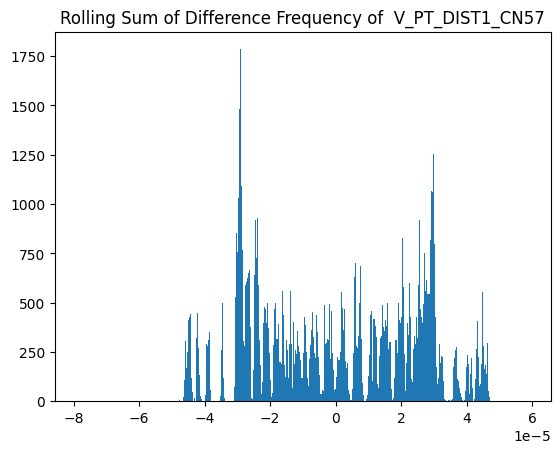

******************************************************************************


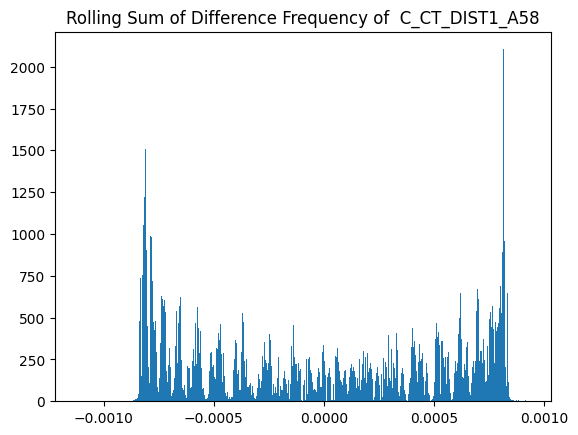

******************************************************************************


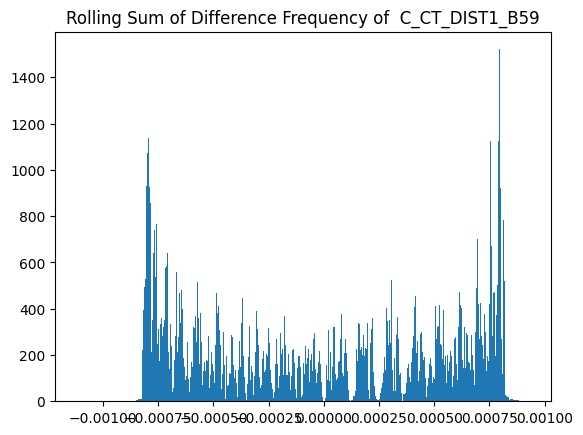

******************************************************************************


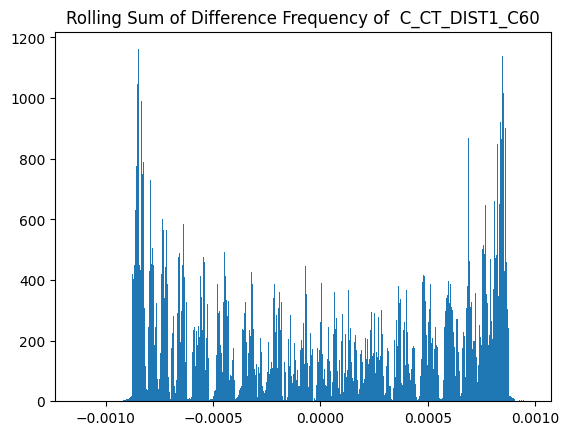

******************************************************************************


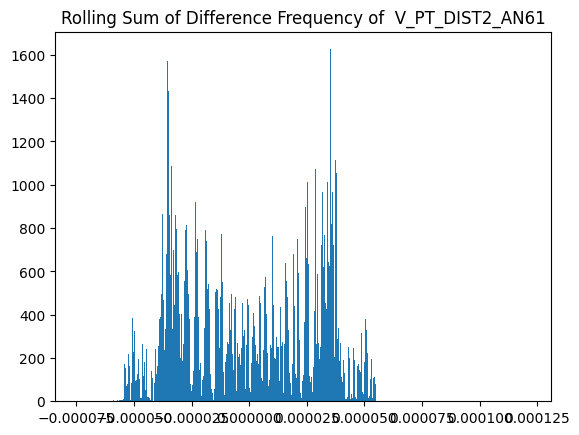

******************************************************************************


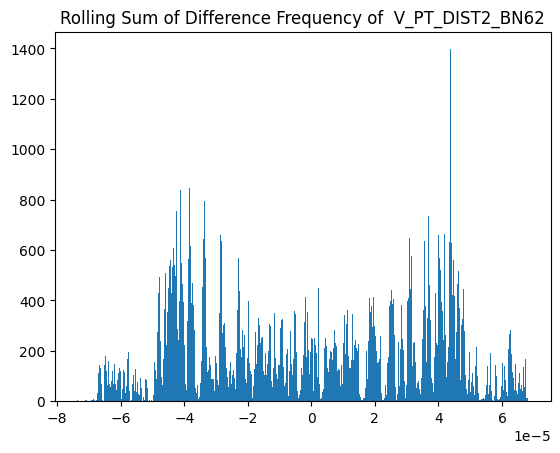

******************************************************************************


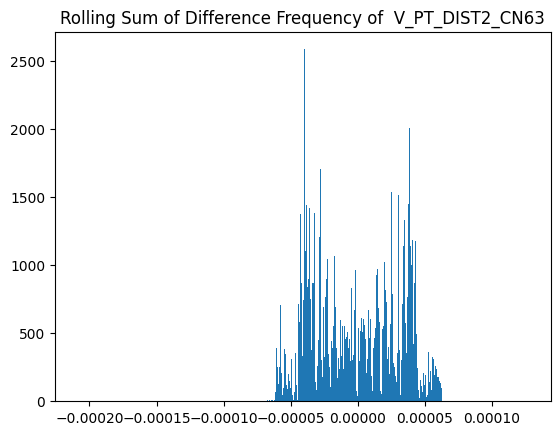

******************************************************************************


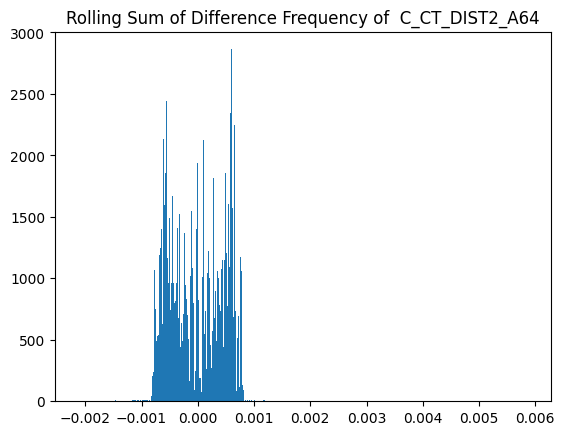

******************************************************************************


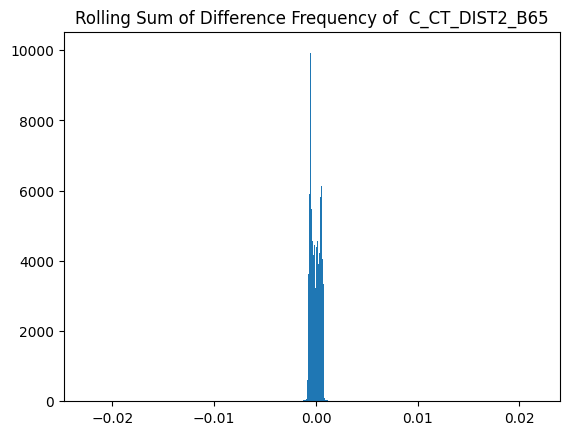

******************************************************************************


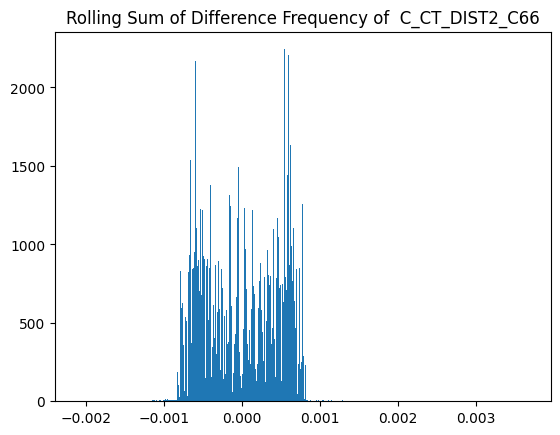

******************************************************************************


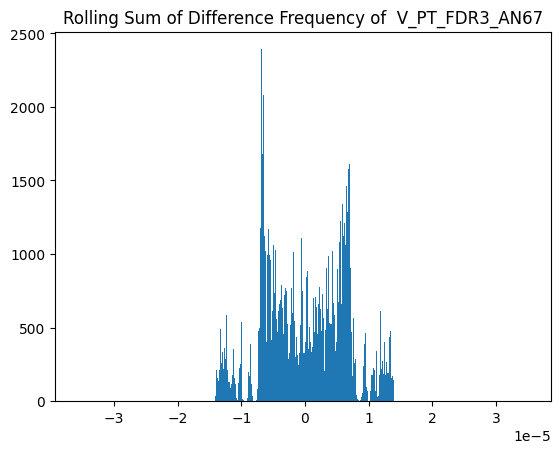

******************************************************************************


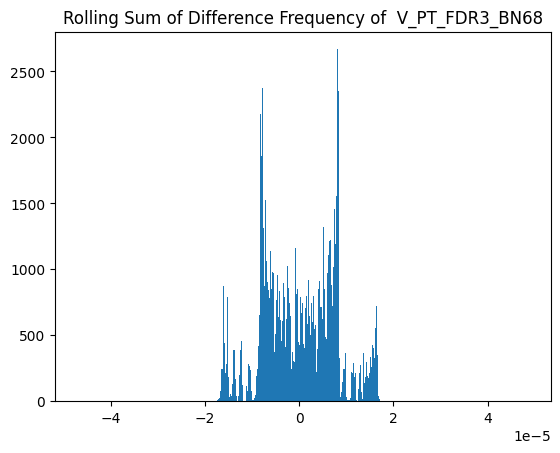

******************************************************************************


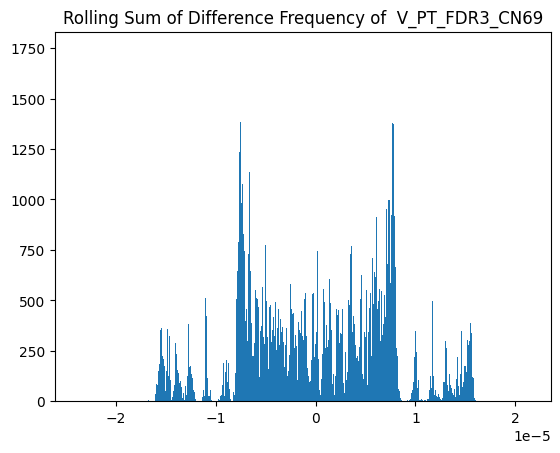

******************************************************************************


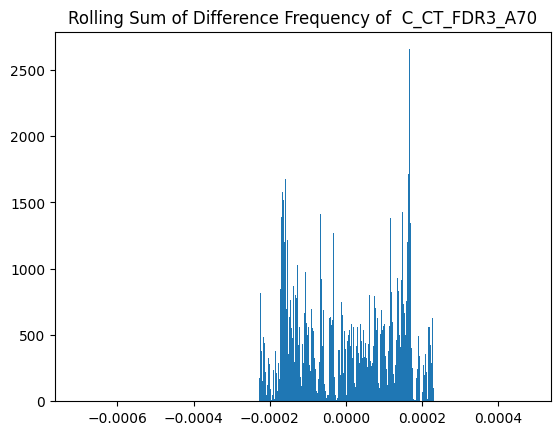

******************************************************************************


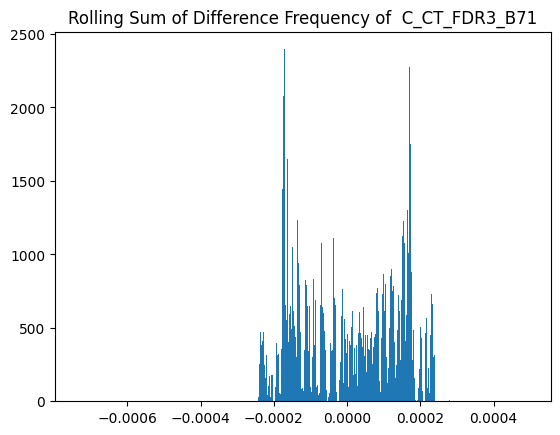

******************************************************************************


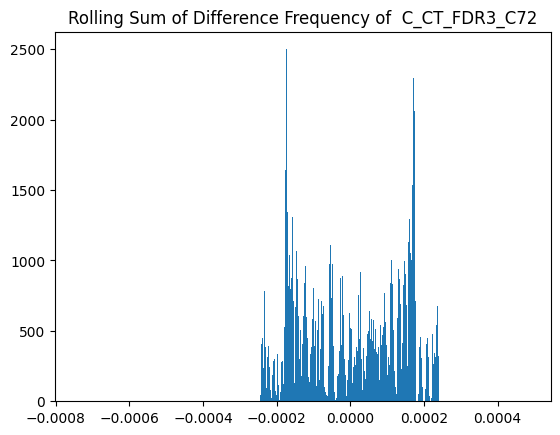

******************************************************************************


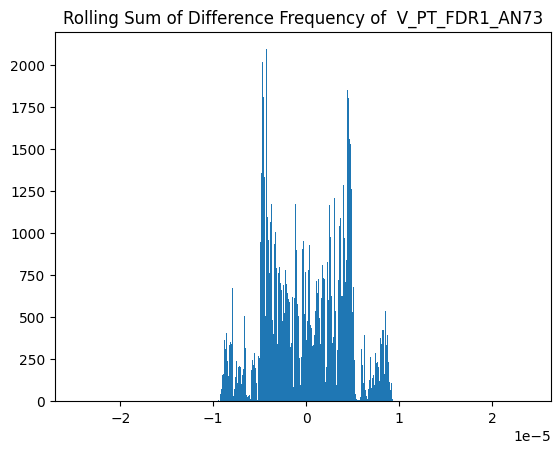

******************************************************************************


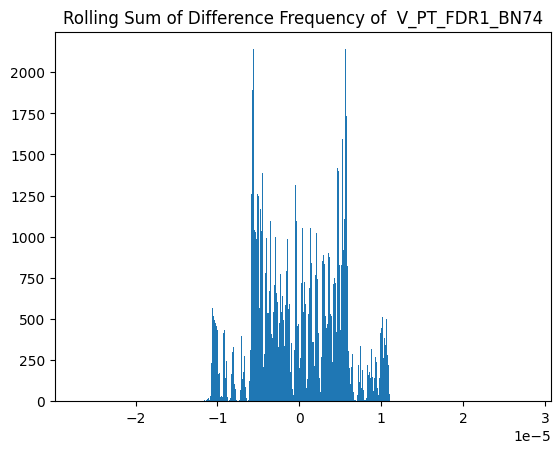

******************************************************************************


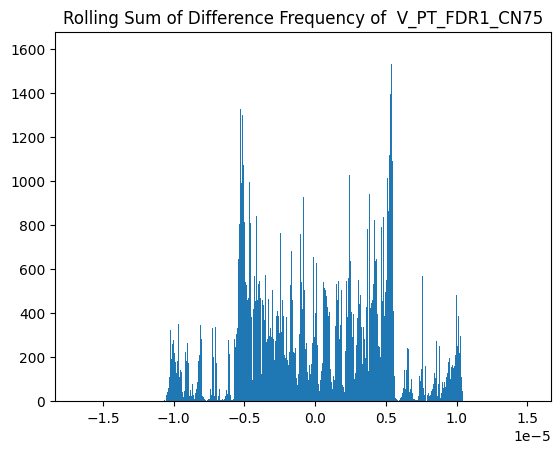

******************************************************************************


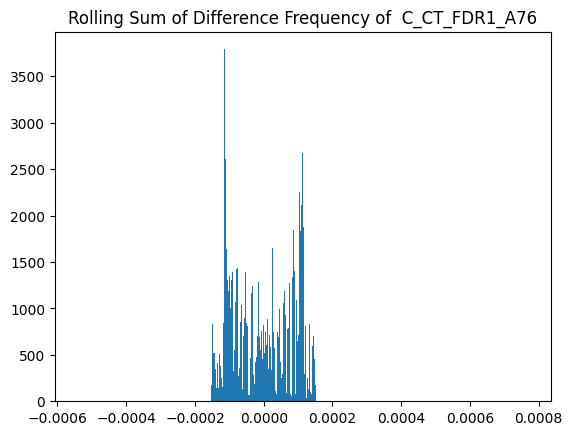

******************************************************************************


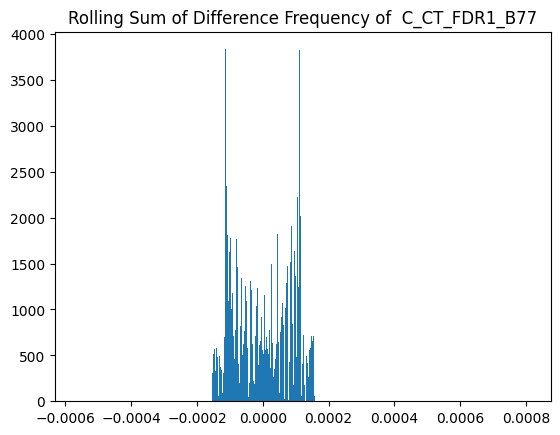

******************************************************************************


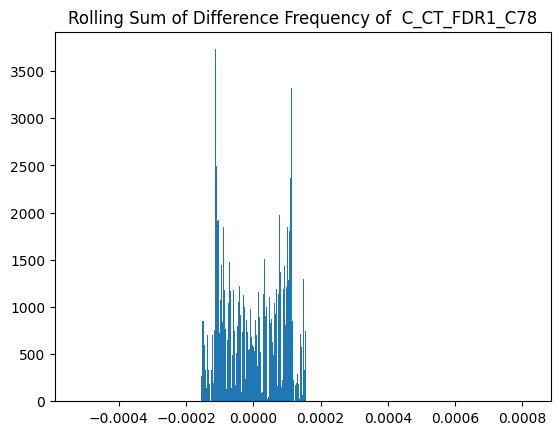

******************************************************************************


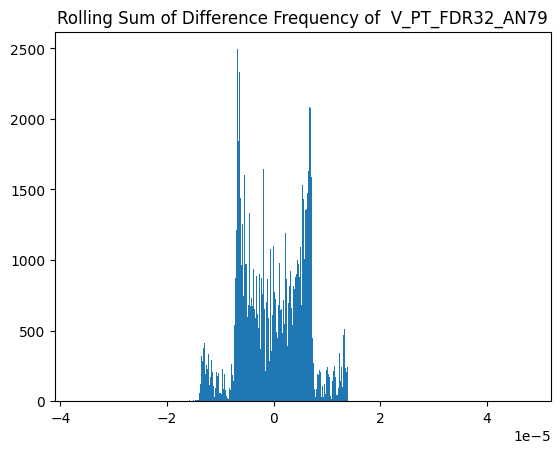

******************************************************************************


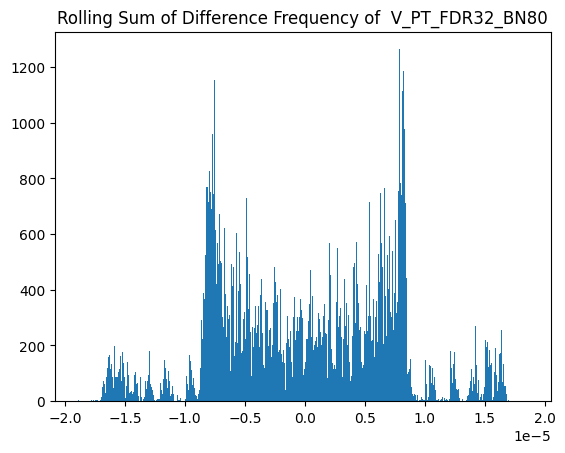

******************************************************************************


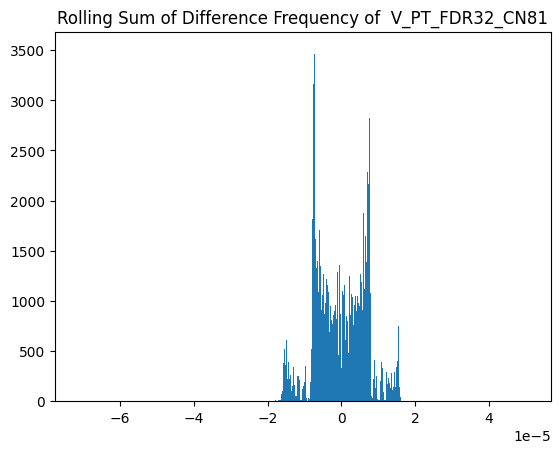

******************************************************************************


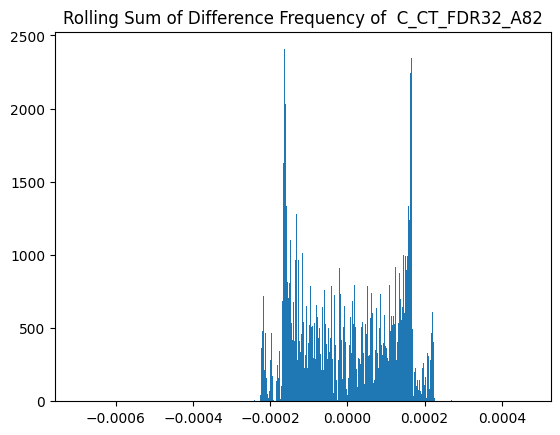

******************************************************************************


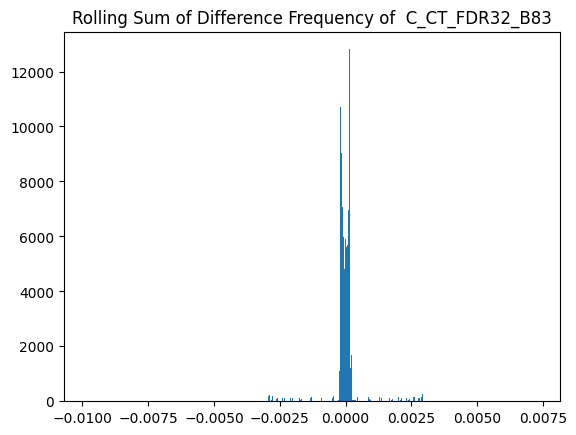

******************************************************************************


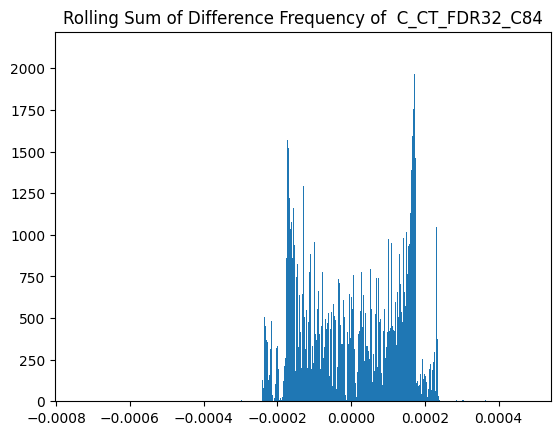

******************************************************************************


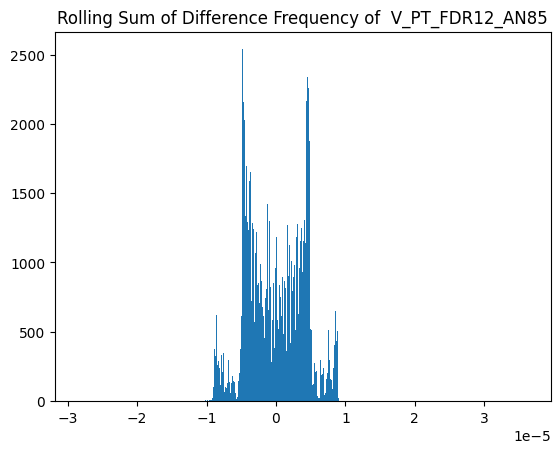

******************************************************************************


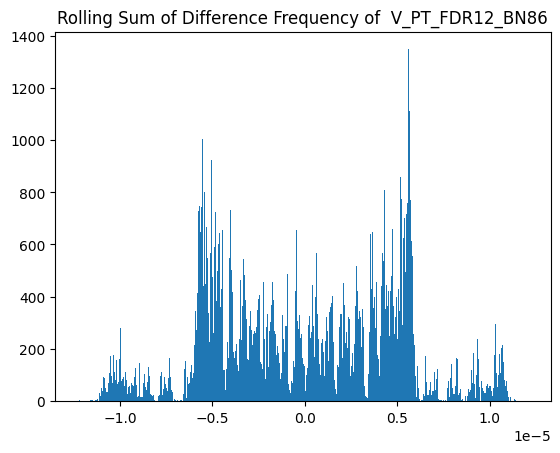

******************************************************************************


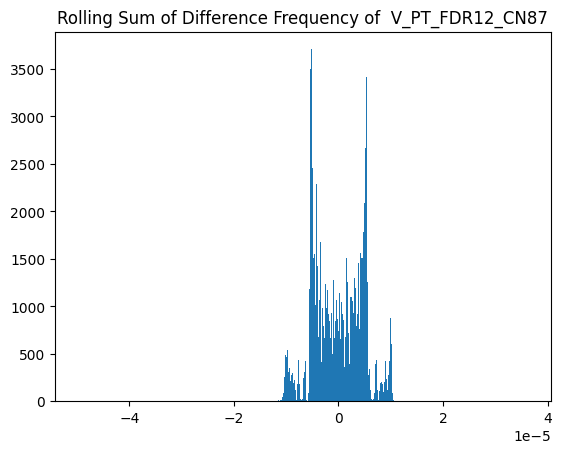

******************************************************************************


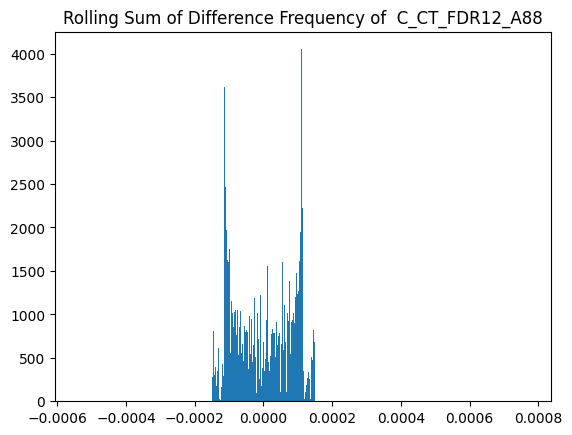

******************************************************************************


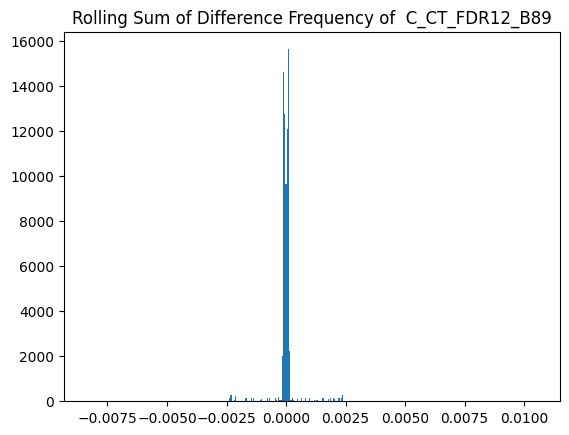

******************************************************************************


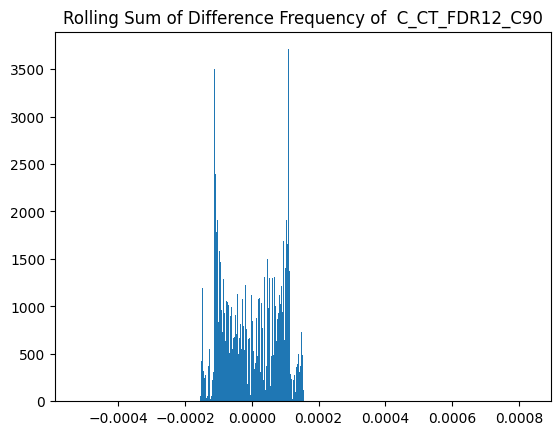

******************************************************************************


In [13]:
# do analysis for multi plot
thresholds = []
thresholds2 = []
cols = data.columns

# correlation window
window = 350

# rolling sum window
w = 1

quant = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    
    corr_multi = correlation_multi(data, var1_index, var2_indices, window)
    thresholds.append(
        get_empirical_diff_threshold(stat=corr_multi, window=w, fn=roll_sum, axis=-1, quantile=quant,
                                     sensor_names=[var1_index]))
    
    thresholds2.append(get_threshold(stat=corr_multi, window=w, fn=roll_sum, axis=-1, quantile=1-quant))
    print("******************************************************************************")

     

In [14]:
all_attack_indices = set()

for start, end in all_attack_times:
    attack_indices = df_test.index[(df_test['Time'] >= start * 1e6) & (df_test['Time'] <= end * 1e6)] - 1201
    all_attack_indices.add((attack_indices[0], attack_indices[-1]))
    
all_attack_indices

{(4080, 8879),
 (9840, 13199),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)}

In [15]:
y_true = np.zeros(len(data_test))
for start, end in all_attack_indices:
    y_true[slice(start, end)] = 1

In [16]:
cov_list = []

w = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1

    cov_multi = correlation_multi(data_test, var1_index, var2_indices, window=350)
    cov_list.append(
        roll_sum(stat=cov_multi,window=w, axis=0)
    )
    
rsum_list = np.array(cov_list)


  

In [17]:
cor_list = []

w = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1

    cov_multi = covariance_multi(data_test, var1_index, var2_indices, window=350)
    cor_list.append(
        roll_sums(stat=cov_multi,window=w, axis=0)
    )
    
rsum_listc = np.array(cor_list)

In [18]:
things = []
for i in adj_list:
  things+=[i]

***********************************************************************************************
Sensor: 1  C_CTWE5_A, No Attacks


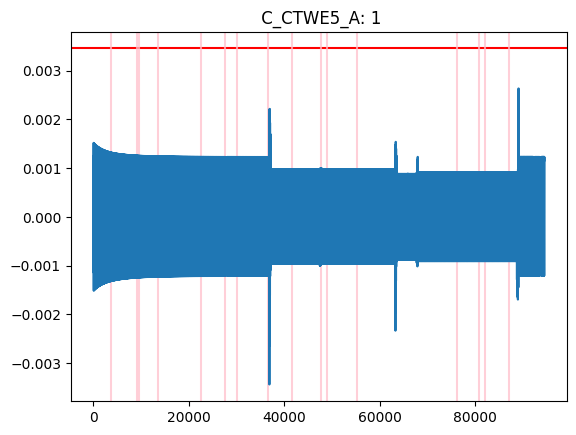

***********************************************************************************************
Sensor: 2  C_CTWE5_B, No Attacks


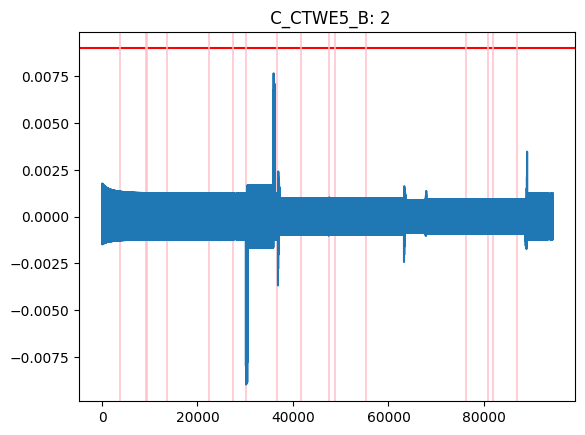

***********************************************************************************************
Sensor: 3  C_CTWE5_C, No Attacks


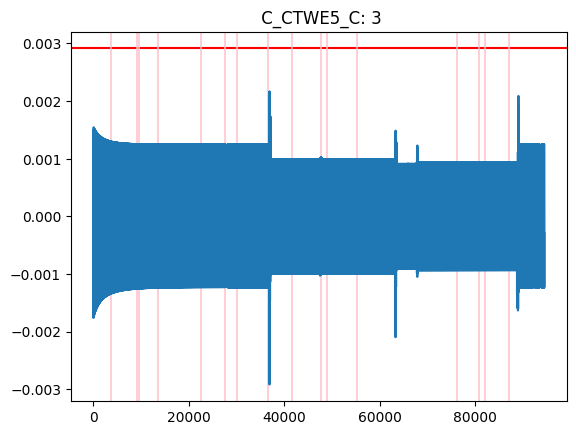

***********************************************************************************************
Sensor: 5  V_PTWE4_AN, Attack Type: PT_ratio, Time Attacked: 5.001635s to 5.972462s


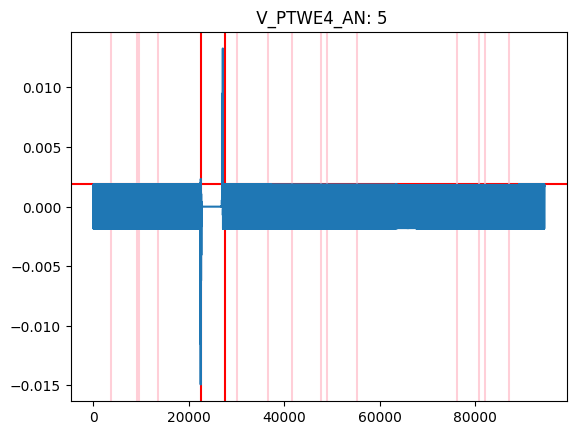

EDD = [8, 9, 46, 47, 48, 49, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668]
***********************************************************************************************
Sensor: 6  V_PTWE4_BN, No Attacks


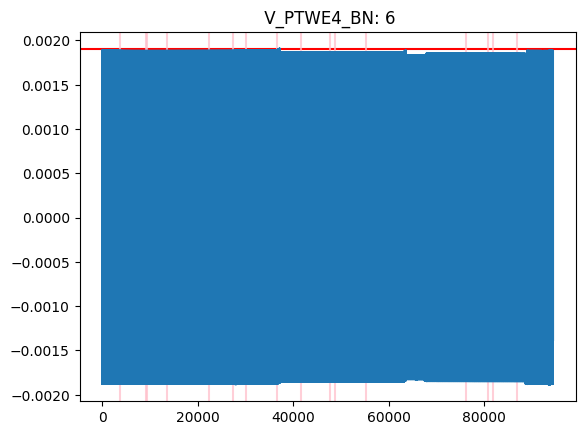

***********************************************************************************************
Sensor: 7  V_PTWE4_CN, No Attacks


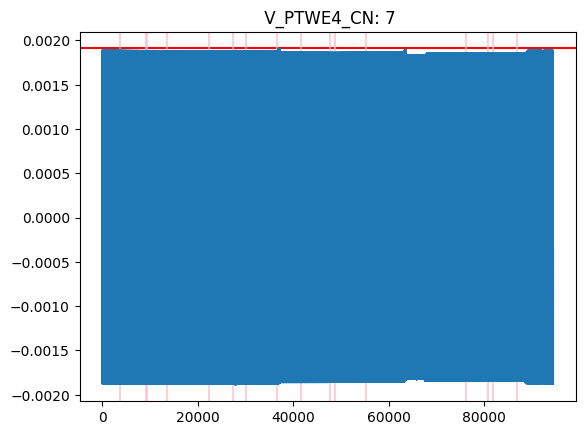

***********************************************************************************************
Sensor: 8  C_CTWE1_A, No Attacks


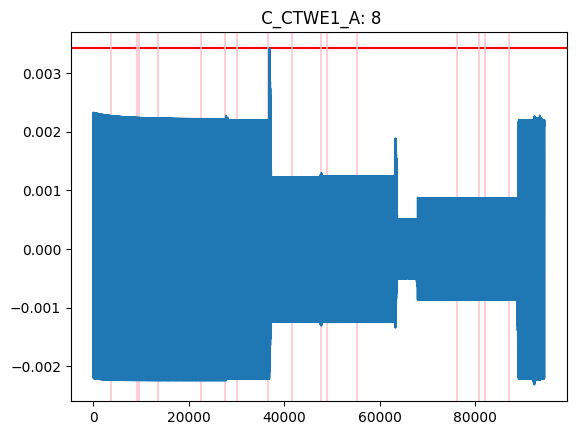

***********************************************************************************************
Sensor: 9  C_CTWE1_B, No Attacks


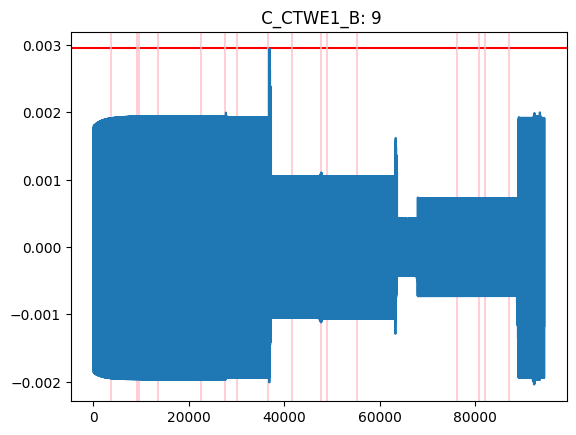

***********************************************************************************************
Sensor: 10  C_CTWE1_C, No Attacks


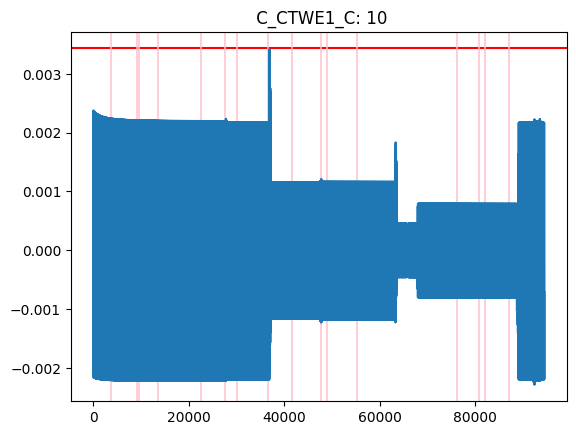

***********************************************************************************************
Sensor: 12  V_PTWE1_AN, Attack Type: PT_ratio, Time Attacked: 5.009343s to 5.972462s


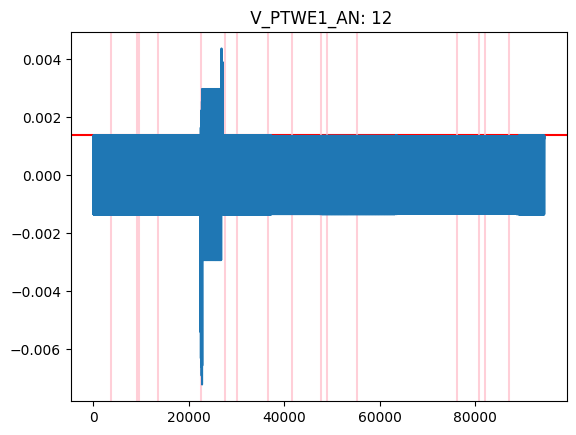

EDD = [8, 9, 46, 47, 48, 49, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668]
***********************************************************************************************
Sensor: 13  V_PTWE1_BN, No Attacks


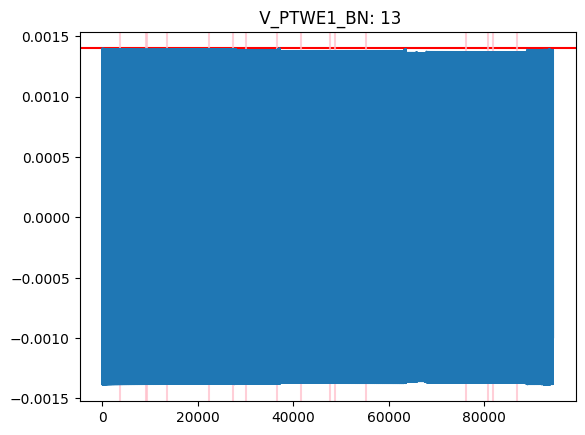

***********************************************************************************************
Sensor: 14  V_PTWE1_CN, No Attacks


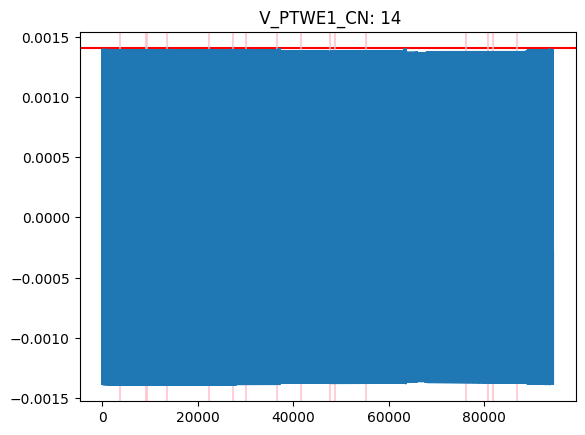

***********************************************************************************************
Sensor: 15  C_CTWE9_A, No Attacks


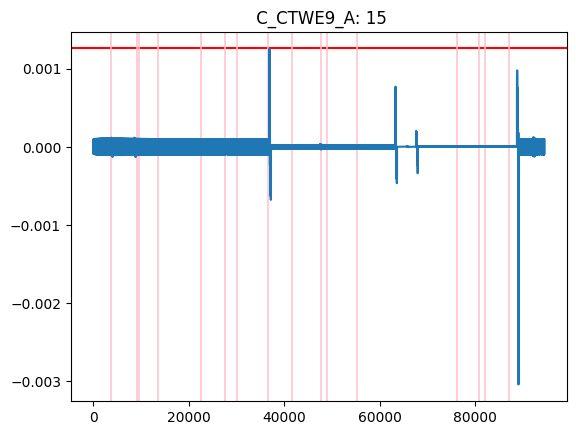

***********************************************************************************************
Sensor: 16  C_CTWE9_B, No Attacks


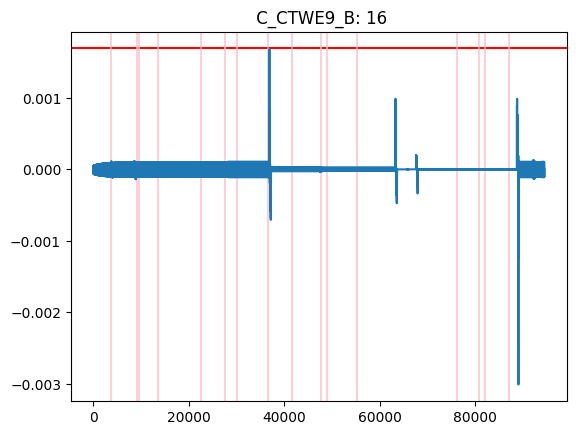

***********************************************************************************************
Sensor: 17  C_CTWE9_C, No Attacks


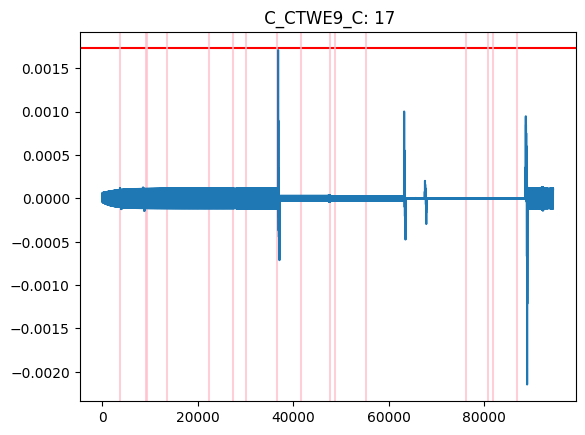

***********************************************************************************************
Sensor: 19  V_PTWE3_AN, Attack Type: PT_ratio, Time Attacked: 5.009343s to 5.972462s


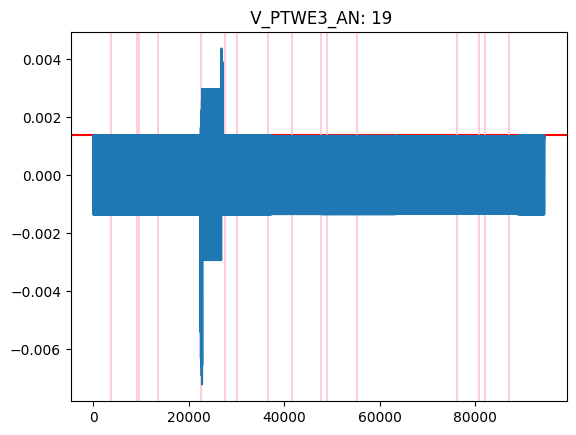

EDD = [8, 9, 46, 47, 48, 49, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668]
***********************************************************************************************
Sensor: 20  V_PTWE3_BN, No Attacks


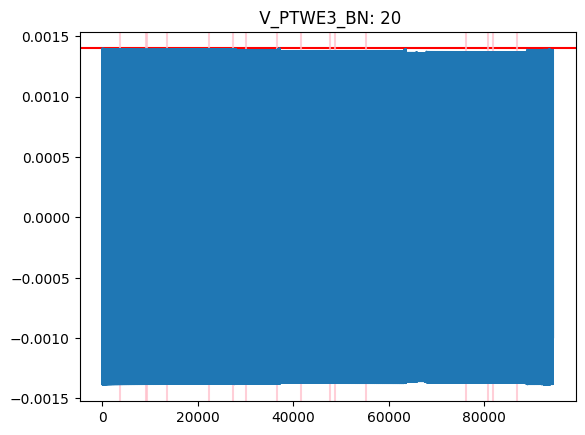

***********************************************************************************************
Sensor: 21  V_PTWE3_CN, No Attacks


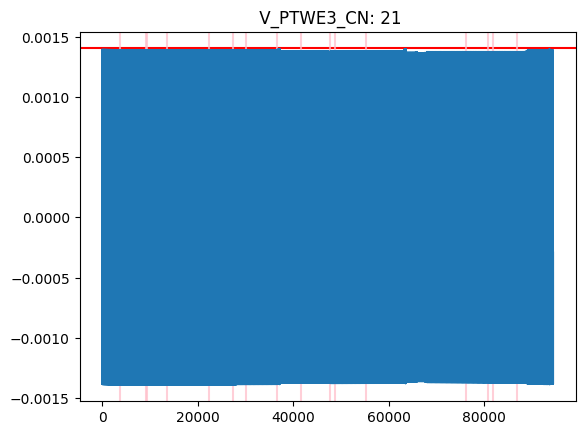

***********************************************************************************************
Sensor: 22  C_CTWE3_A, No Attacks


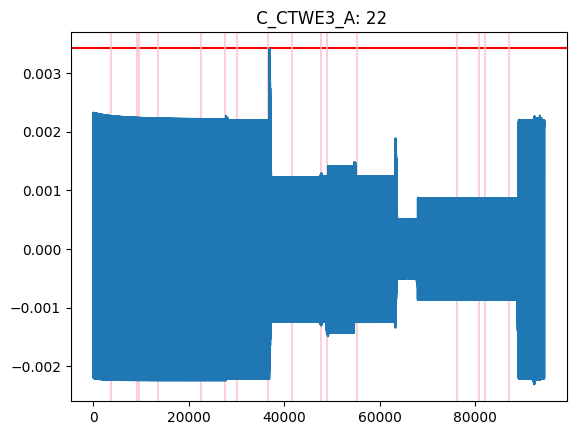

***********************************************************************************************
Sensor: 23  C_CTWE3_B, No Attacks


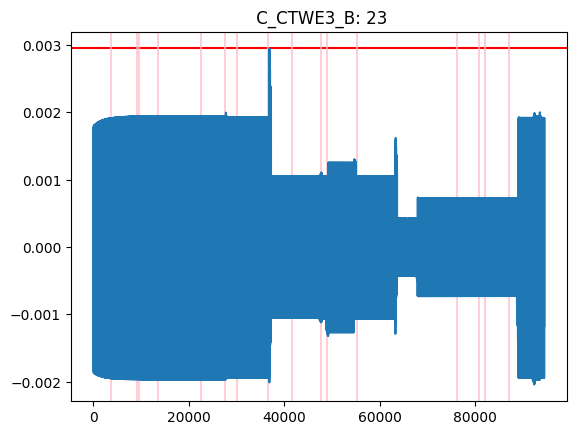

***********************************************************************************************
Sensor: 24  C_CTWE3_C, No Attacks


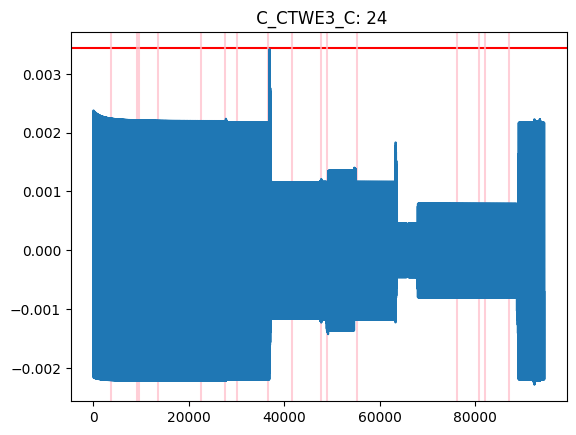

***********************************************************************************************
Sensor: 26  V_PTWE2_AN, Attack Type: PT_ratio, Time Attacked: 5.009343s to 5.972462s


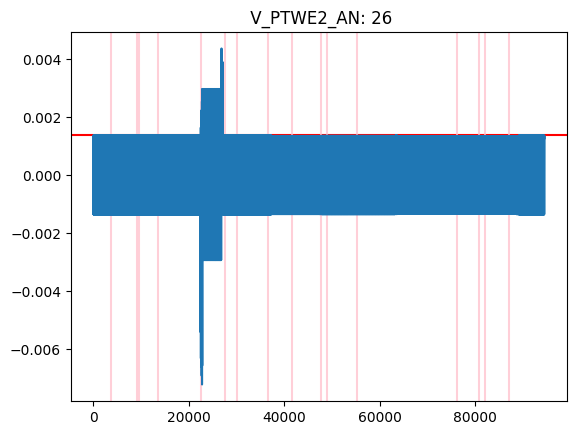

EDD = [8, 9, 46, 47, 48, 49, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668]
***********************************************************************************************
Sensor: 27  V_PTWE2_BN, No Attacks


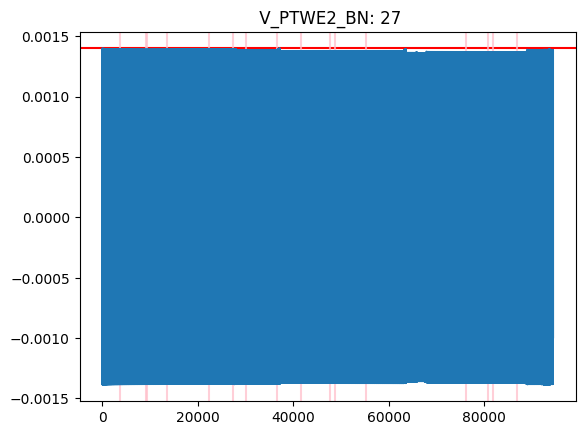

***********************************************************************************************
Sensor: 28  V_PTWE2_CN, No Attacks


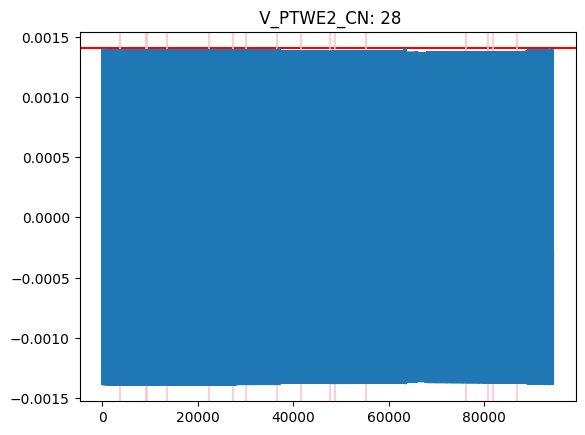

***********************************************************************************************
Sensor: 29  C_CTWE7_A, No Attacks


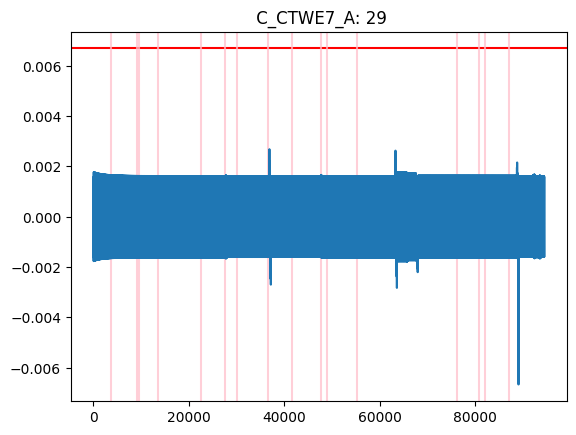

***********************************************************************************************
Sensor: 30  C_CTWE7_B, No Attacks


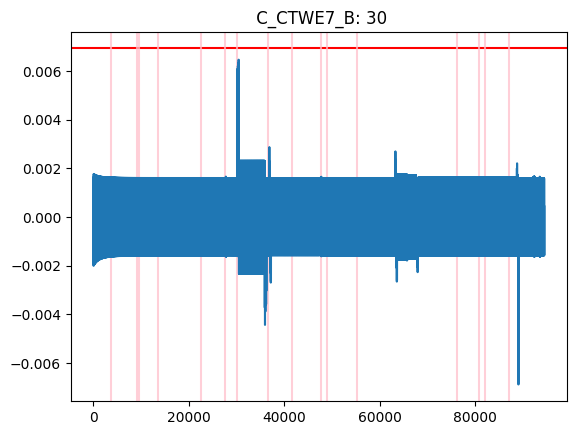

***********************************************************************************************
Sensor: 31  C_CTWE7_C, No Attacks


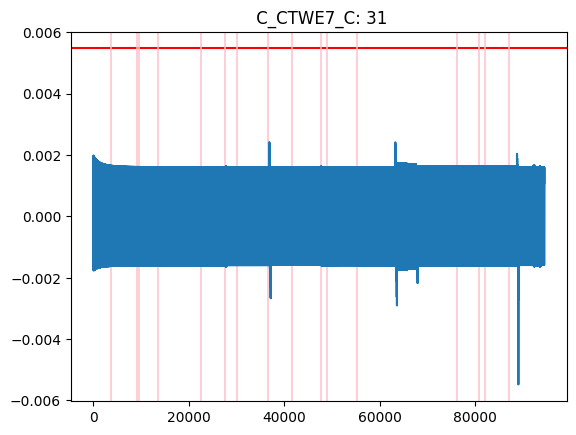

***********************************************************************************************
Sensor: 33  V_PTWE5_AN, No Attacks


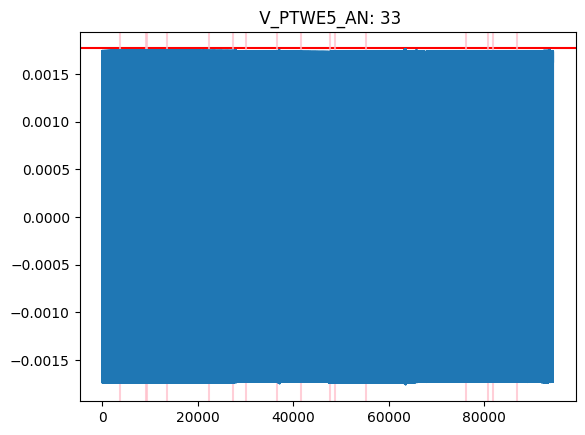

***********************************************************************************************
Sensor: 34  V_PTWE5_BN, No Attacks


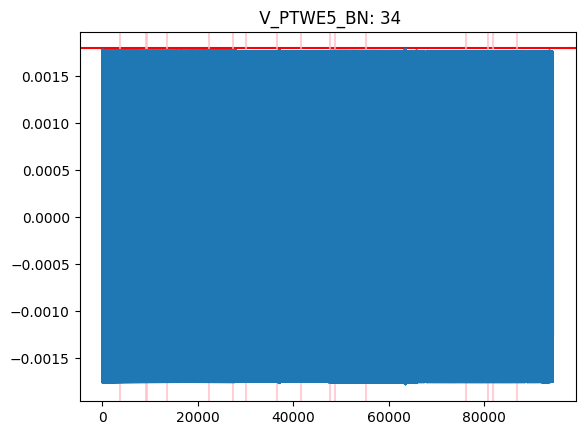

***********************************************************************************************
Sensor: 35  V_PTWE5_CN, No Attacks


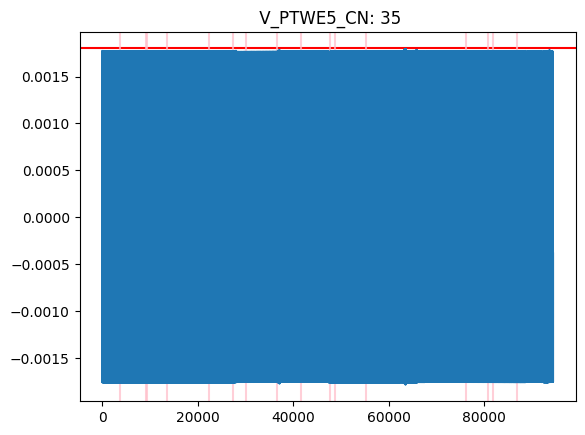

***********************************************************************************************
Sensor: 36  C_CTWE2_A, Attack Type: CT_ratio, Time Attacked: 10.499933s to 11.772216s


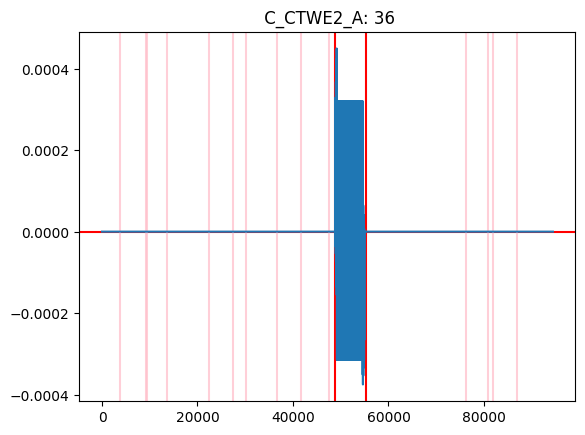

EDD = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 286, 287, 288, 289,

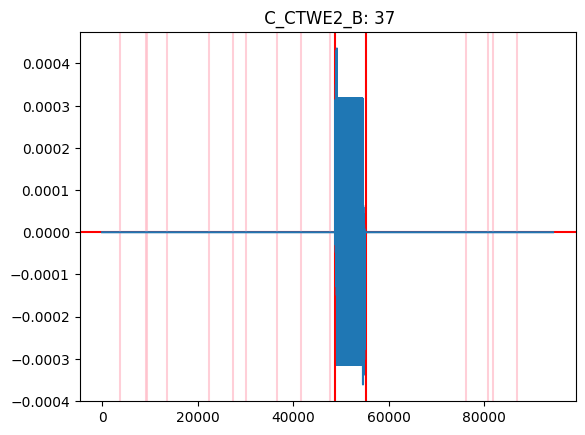

EDD = [-37187, -27306, -9474, -8923, -8624, -2736, -782, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 273, 274, 275, 276, 277, 

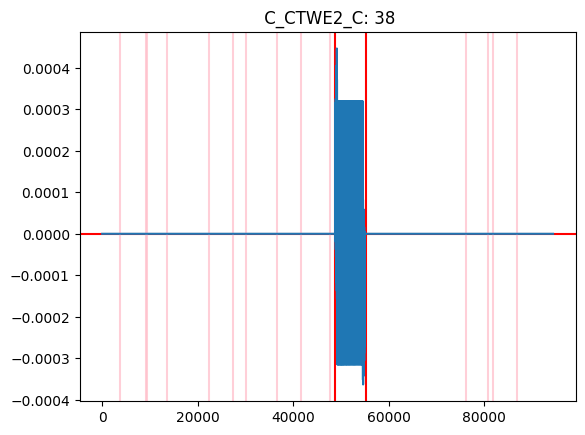

EDD = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 27

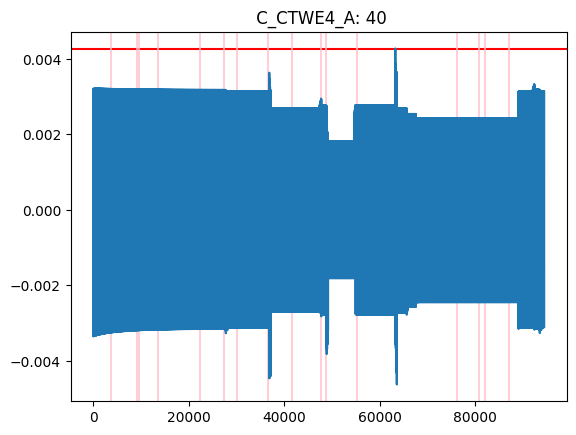

***********************************************************************************************
Sensor: 41  C_CTWE4_B, No Attacks


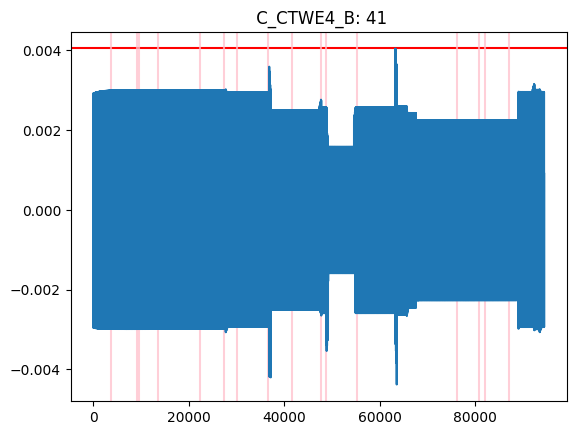

***********************************************************************************************
Sensor: 42  C_CTWE4_C, No Attacks


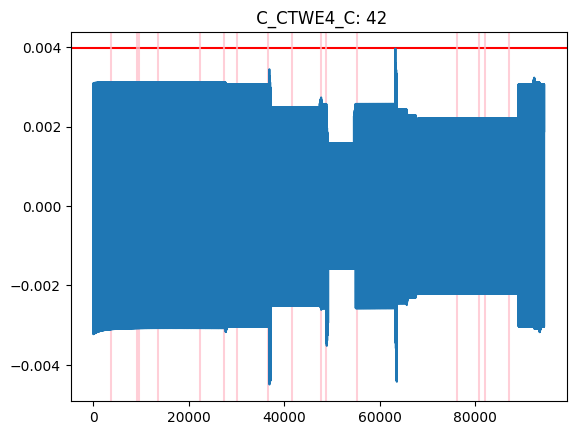

***********************************************************************************************
Sensor: 44  C_CTWE6_A, Attack Type: CT_ratio, Time Attacked: 2.101237s to 2.168319s


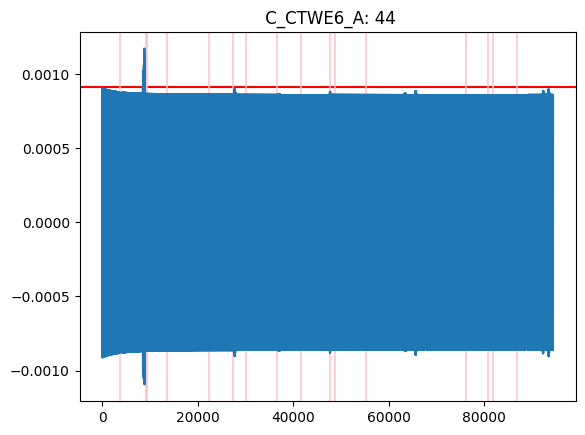

EDD = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 27

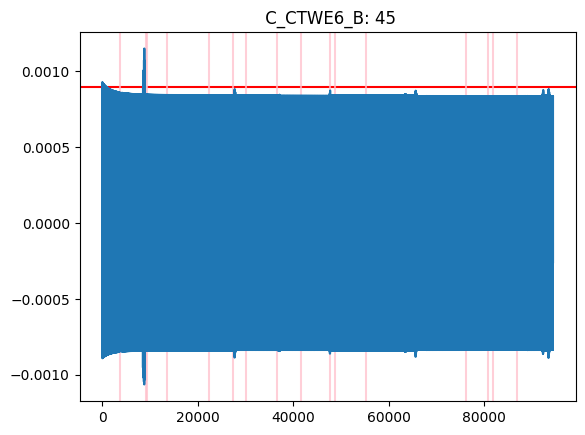

EDD = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 27

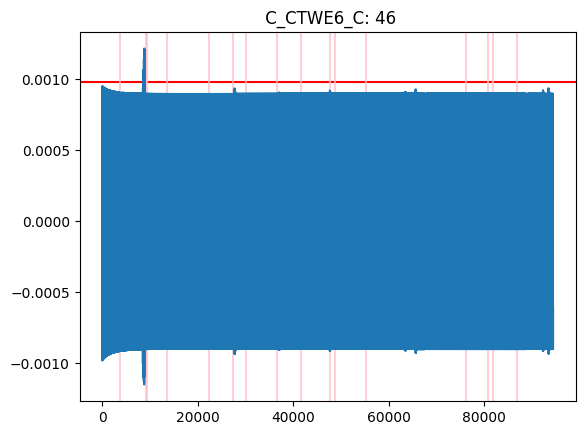

EDD = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 27

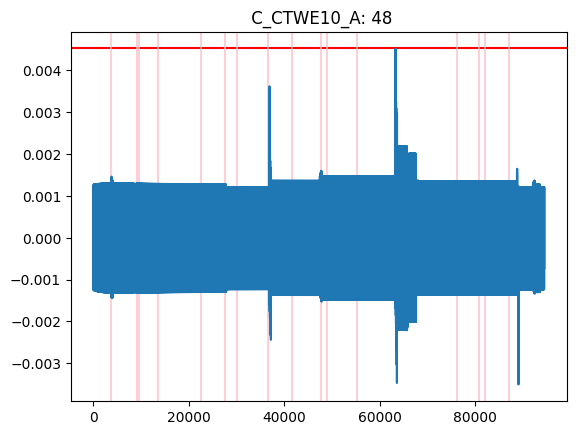

***********************************************************************************************
Sensor: 49  C_CTWE10_B, No Attacks


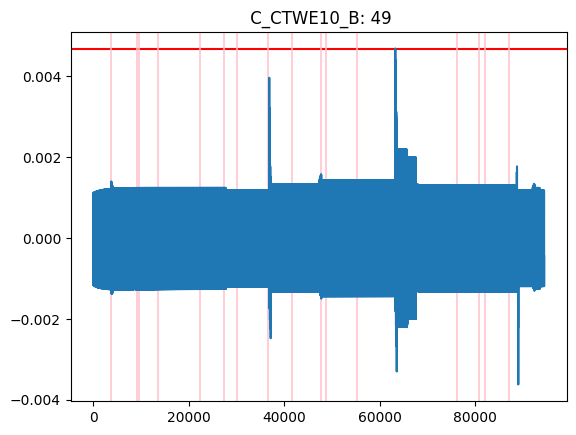

***********************************************************************************************
Sensor: 50  C_CTWE10_C, No Attacks


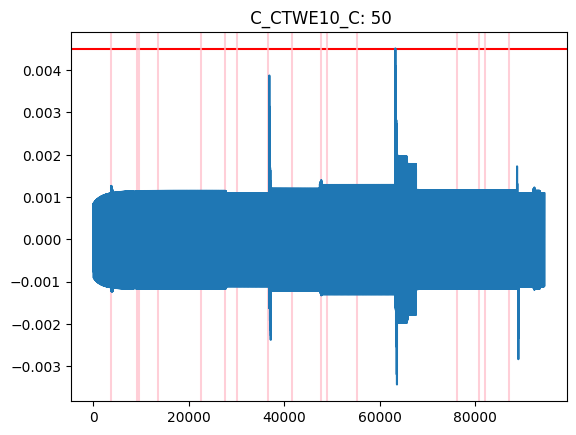

***********************************************************************************************
Sensor: 52  C_CTWE8_A, Attack Type: CT_ratio, Time Attacked: 13.539288s to 13.573038s


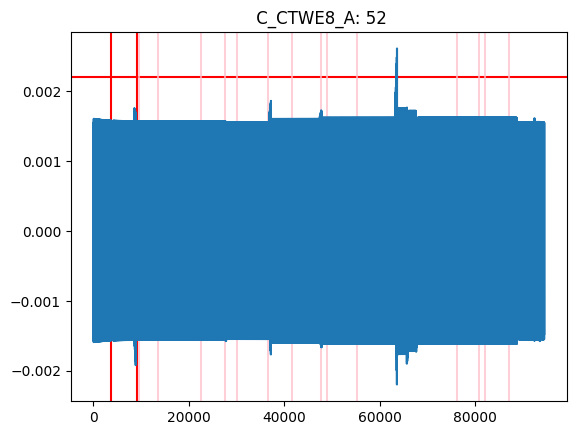

EDD = [59709, 59748, 59749, 59750, 59787, 59788, 59789, 59790, 59791, 59826, 59827, 59828, 59829, 59830, 59831, 59832, 59865, 59866, 59867, 59868, 59869, 59870, 59871]
***********************************************************************************************
Sensor: 53  C_CTWE8_B, Attack Type: CT_ratio, Time Attacked: 13.528038s to 13.570538s


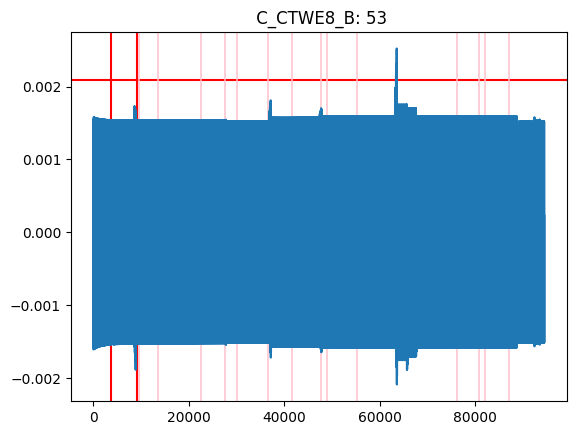

EDD = [59655, 59656, 59657, 59696, 59733, 59734, 59735, 59736, 59737, 59738, 59774, 59775, 59776, 59777, 59778, 59812, 59813, 59814, 59815, 59816, 59817, 59818, 59819, 59852, 59853, 59854, 59855, 59856, 59857, 59858, 59859]
***********************************************************************************************
Sensor: 54  C_CTWE8_C, Attack Type: CT_ratio, Time Attacked: 13.558247s to 13.567205s


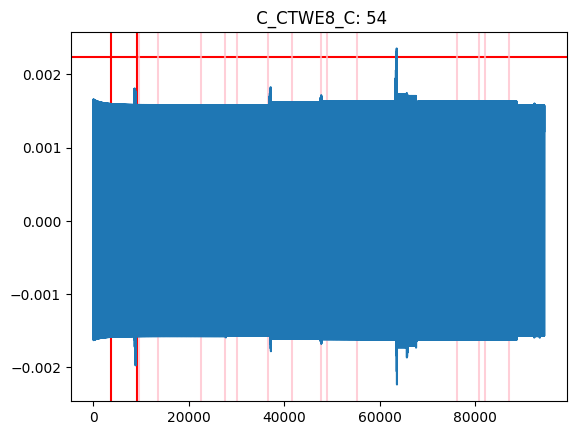

EDD = [59800, 59801, 59802, 59803, 59840, 59841, 59842, 59843]
***********************************************************************************************
Sensor: 56  V_PT_DIST1_AN, Attack Type: PT_ratio, Time Attacked: 9.065984s to 19.576125s


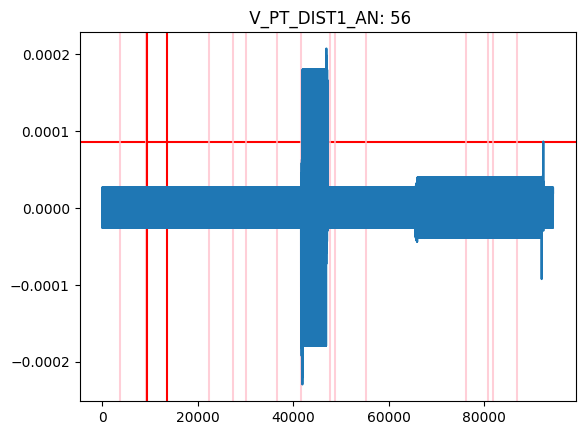

EDD = [32477, 32478, 32479, 32480, 32514, 32515, 32516, 32517, 32518, 32519, 32520, 32521, 32522, 32523, 32524, 32525, 32526, 32527, 32554, 32555, 32556, 32557, 32558, 32559, 32560, 32561, 32562, 32563, 32564, 32565, 32566, 32567, 32594, 32595, 32596, 32597, 32598, 32599, 32600, 32601, 32602, 32603, 32604, 32605, 32606, 32607, 32634, 32635, 32636, 32637, 32638, 32639, 32640, 32641, 32642, 32643, 32644, 32645, 32646, 32647, 32674, 32675, 32676, 32677, 32678, 32679, 32680, 32681, 32682, 32683, 32684, 32685, 32686, 32687, 32714, 32715, 32716, 32717, 32718, 32719, 32720, 32721, 32722, 32723, 32724, 32725, 32726, 32727, 32754, 32755, 32756, 32757, 32758, 32759, 32760, 32761, 32762, 32763, 32764, 32765, 32766, 32767, 32794, 32795, 32796, 32797, 32798, 32799, 32800, 32801, 32802, 32803, 32804, 32805, 32806, 32807, 32834, 32835, 32836, 32837, 32838, 32839, 32840, 32841, 32842, 32843, 32844, 32845, 32846, 32847, 32874, 32875, 32876, 32877, 32878, 32879, 32880, 32881, 32882, 32883, 32884, 32885,

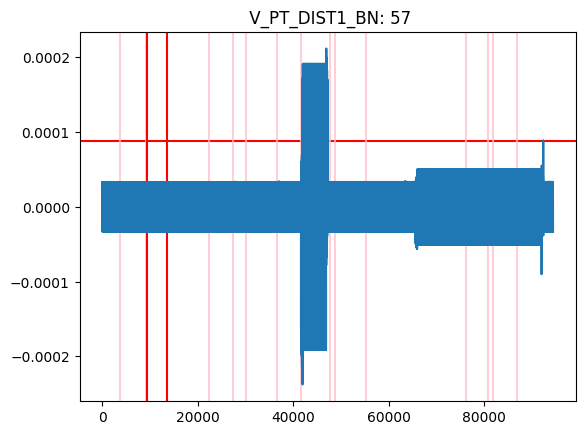

EDD = [32463, 32464, 32465, 32466, 32467, 32503, 32504, 32505, 32506, 32507, 32510, 32511, 32512, 32513, 32514, 32541, 32542, 32543, 32544, 32545, 32546, 32547, 32548, 32549, 32550, 32551, 32552, 32553, 32554, 32581, 32582, 32583, 32584, 32585, 32586, 32587, 32588, 32589, 32590, 32591, 32592, 32593, 32594, 32621, 32622, 32623, 32624, 32625, 32626, 32627, 32628, 32629, 32630, 32631, 32632, 32633, 32634, 32661, 32662, 32663, 32664, 32665, 32666, 32667, 32668, 32669, 32670, 32671, 32672, 32673, 32674, 32701, 32702, 32703, 32704, 32705, 32706, 32707, 32708, 32709, 32710, 32711, 32712, 32713, 32714, 32741, 32742, 32743, 32744, 32745, 32746, 32747, 32748, 32749, 32750, 32751, 32752, 32753, 32754, 32781, 32782, 32783, 32784, 32785, 32786, 32787, 32788, 32789, 32790, 32791, 32792, 32793, 32794, 32821, 32822, 32823, 32824, 32825, 32826, 32827, 32828, 32829, 32830, 32831, 32832, 32833, 32834, 32861, 32862, 32863, 32864, 32865, 32866, 32867, 32868, 32869, 32870, 32871, 32872, 32873, 32874, 32901,

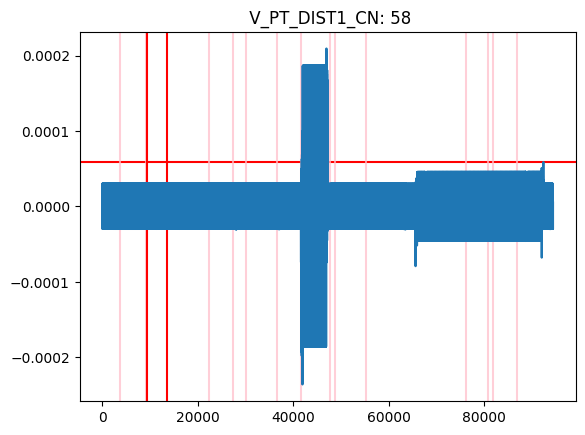

EDD = [32330, 32331, 32332, 32369, 32370, 32371, 32372, 32373, 32408, 32409, 32410, 32411, 32412, 32413, 32414, 32448, 32449, 32450, 32451, 32452, 32453, 32454, 32455, 32488, 32489, 32490, 32491, 32492, 32493, 32494, 32495, 32496, 32527, 32528, 32529, 32530, 32531, 32532, 32533, 32534, 32535, 32536, 32537, 32538, 32539, 32540, 32541, 32567, 32568, 32569, 32570, 32571, 32572, 32573, 32574, 32575, 32576, 32577, 32578, 32579, 32580, 32581, 32607, 32608, 32609, 32610, 32611, 32612, 32613, 32614, 32615, 32616, 32617, 32618, 32619, 32620, 32621, 32647, 32648, 32649, 32650, 32651, 32652, 32653, 32654, 32655, 32656, 32657, 32658, 32659, 32660, 32661, 32687, 32688, 32689, 32690, 32691, 32692, 32693, 32694, 32695, 32696, 32697, 32698, 32699, 32700, 32701, 32727, 32728, 32729, 32730, 32731, 32732, 32733, 32734, 32735, 32736, 32737, 32738, 32739, 32740, 32741, 32767, 32768, 32769, 32770, 32771, 32772, 32773, 32774, 32775, 32776, 32777, 32778, 32779, 32780, 32781, 32807, 32808, 32809, 32810, 32811,

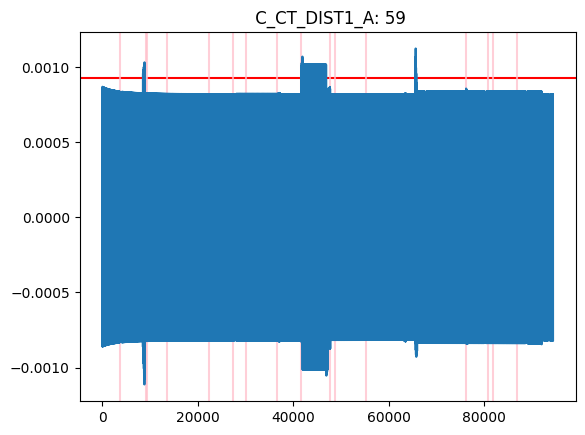

EDD = [32330, 32331, 32332, 32369, 32370, 32371, 32372, 32373, 32408, 32409, 32410, 32411, 32412, 32413, 32414, 32448, 32449, 32450, 32451, 32452, 32453, 32454, 32455, 32488, 32489, 32490, 32491, 32492, 32493, 32494, 32495, 32496, 32527, 32528, 32529, 32530, 32531, 32532, 32533, 32534, 32535, 32536, 32537, 32538, 32539, 32540, 32541, 32567, 32568, 32569, 32570, 32571, 32572, 32573, 32574, 32575, 32576, 32577, 32578, 32579, 32580, 32581, 32607, 32608, 32609, 32610, 32611, 32612, 32613, 32614, 32615, 32616, 32617, 32618, 32619, 32620, 32621, 32647, 32648, 32649, 32650, 32651, 32652, 32653, 32654, 32655, 32656, 32657, 32658, 32659, 32660, 32661, 32687, 32688, 32689, 32690, 32691, 32692, 32693, 32694, 32695, 32696, 32697, 32698, 32699, 32700, 32701, 32727, 32728, 32729, 32730, 32731, 32732, 32733, 32734, 32735, 32736, 32737, 32738, 32739, 32740, 32741, 32767, 32768, 32769, 32770, 32771, 32772, 32773, 32774, 32775, 32776, 32777, 32778, 32779, 32780, 32781, 32807, 32808, 32809, 32810, 32811,

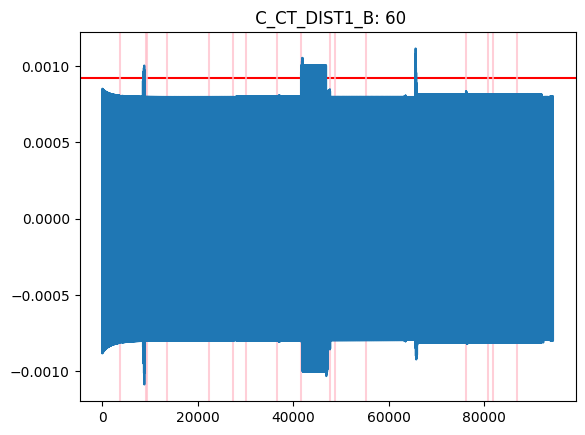

EDD = [32330, 32331, 32332, 32369, 32370, 32371, 32372, 32373, 32408, 32409, 32410, 32411, 32412, 32413, 32414, 32448, 32449, 32450, 32451, 32452, 32453, 32454, 32455, 32488, 32489, 32490, 32491, 32492, 32493, 32494, 32495, 32496, 32527, 32528, 32529, 32530, 32531, 32532, 32533, 32534, 32535, 32536, 32537, 32538, 32539, 32540, 32541, 32567, 32568, 32569, 32570, 32571, 32572, 32573, 32574, 32575, 32576, 32577, 32578, 32579, 32580, 32581, 32607, 32608, 32609, 32610, 32611, 32612, 32613, 32614, 32615, 32616, 32617, 32618, 32619, 32620, 32621, 32647, 32648, 32649, 32650, 32651, 32652, 32653, 32654, 32655, 32656, 32657, 32658, 32659, 32660, 32661, 32687, 32688, 32689, 32690, 32691, 32692, 32693, 32694, 32695, 32696, 32697, 32698, 32699, 32700, 32701, 32727, 32728, 32729, 32730, 32731, 32732, 32733, 32734, 32735, 32736, 32737, 32738, 32739, 32740, 32741, 32767, 32768, 32769, 32770, 32771, 32772, 32773, 32774, 32775, 32776, 32777, 32778, 32779, 32780, 32781, 32807, 32808, 32809, 32810, 32811,

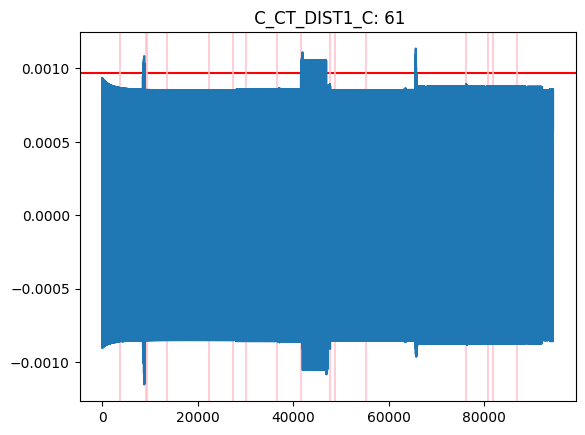

EDD = [32330, 32331, 32332, 32369, 32370, 32371, 32372, 32373, 32408, 32409, 32410, 32411, 32412, 32413, 32414, 32448, 32449, 32450, 32451, 32452, 32453, 32454, 32455, 32488, 32489, 32490, 32491, 32492, 32493, 32494, 32495, 32496, 32527, 32528, 32529, 32530, 32531, 32532, 32533, 32534, 32535, 32536, 32537, 32538, 32539, 32540, 32541, 32567, 32568, 32569, 32570, 32571, 32572, 32573, 32574, 32575, 32576, 32577, 32578, 32579, 32580, 32581, 32607, 32608, 32609, 32610, 32611, 32612, 32613, 32614, 32615, 32616, 32617, 32618, 32619, 32620, 32621, 32647, 32648, 32649, 32650, 32651, 32652, 32653, 32654, 32655, 32656, 32657, 32658, 32659, 32660, 32661, 32687, 32688, 32689, 32690, 32691, 32692, 32693, 32694, 32695, 32696, 32697, 32698, 32699, 32700, 32701, 32727, 32728, 32729, 32730, 32731, 32732, 32733, 32734, 32735, 32736, 32737, 32738, 32739, 32740, 32741, 32767, 32768, 32769, 32770, 32771, 32772, 32773, 32774, 32775, 32776, 32777, 32778, 32779, 32780, 32781, 32807, 32808, 32809, 32810, 32811,

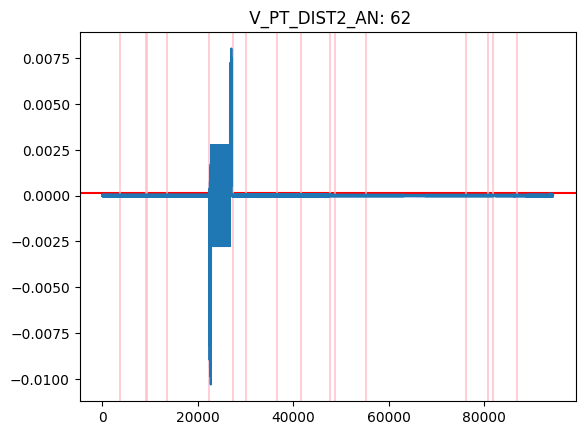

EDD = [32330, 32331, 32332, 32369, 32370, 32371, 32372, 32373, 32408, 32409, 32410, 32411, 32412, 32413, 32414, 32448, 32449, 32450, 32451, 32452, 32453, 32454, 32455, 32488, 32489, 32490, 32491, 32492, 32493, 32494, 32495, 32496, 32527, 32528, 32529, 32530, 32531, 32532, 32533, 32534, 32535, 32536, 32537, 32538, 32539, 32540, 32541, 32567, 32568, 32569, 32570, 32571, 32572, 32573, 32574, 32575, 32576, 32577, 32578, 32579, 32580, 32581, 32607, 32608, 32609, 32610, 32611, 32612, 32613, 32614, 32615, 32616, 32617, 32618, 32619, 32620, 32621, 32647, 32648, 32649, 32650, 32651, 32652, 32653, 32654, 32655, 32656, 32657, 32658, 32659, 32660, 32661, 32687, 32688, 32689, 32690, 32691, 32692, 32693, 32694, 32695, 32696, 32697, 32698, 32699, 32700, 32701, 32727, 32728, 32729, 32730, 32731, 32732, 32733, 32734, 32735, 32736, 32737, 32738, 32739, 32740, 32741, 32767, 32768, 32769, 32770, 32771, 32772, 32773, 32774, 32775, 32776, 32777, 32778, 32779, 32780, 32781, 32807, 32808, 32809, 32810, 32811,

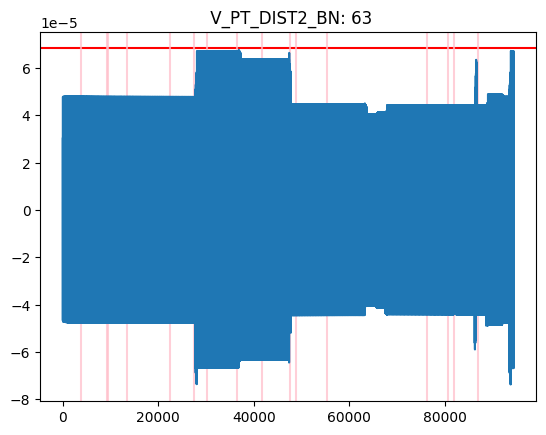

***********************************************************************************************
Sensor: 64  V_PT_DIST2_CN, No Attacks


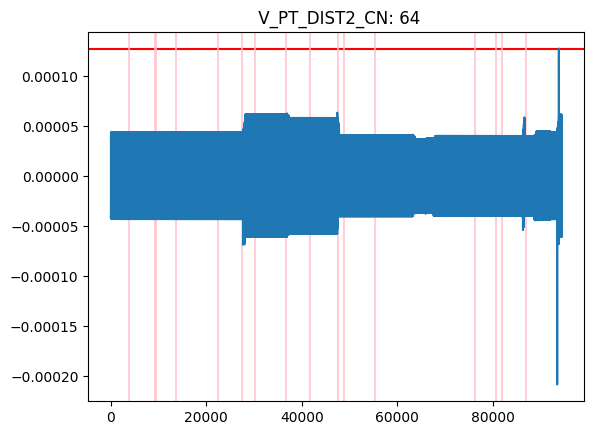

***********************************************************************************************
Sensor: 65  C_CT_DIST2_A, No Attacks


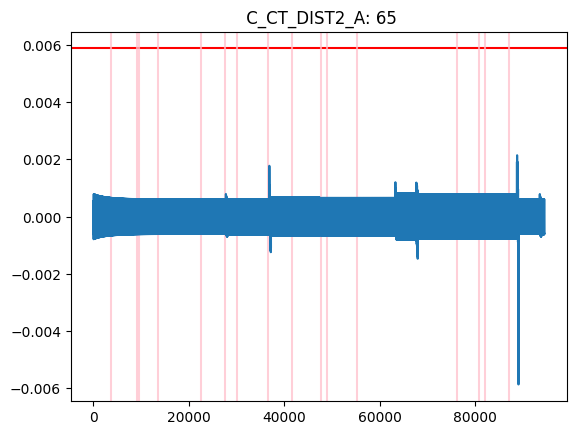

***********************************************************************************************
Sensor: 66  C_CT_DIST2_B, Attack Type: CT_ratio, Time Attacked: 6.602666s to 6.603499s


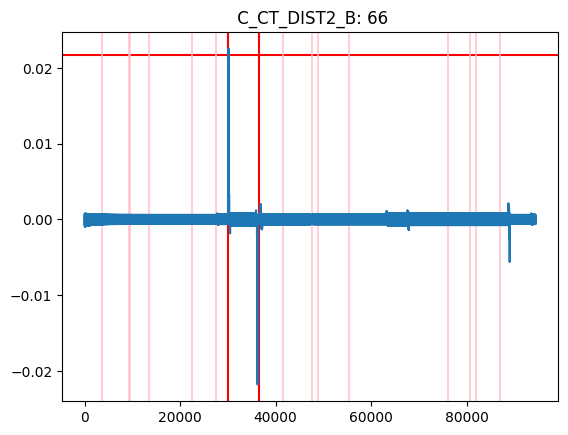

EDD = [13, 14, 15, 16, 17]
***********************************************************************************************
Sensor: 67  C_CT_DIST2_C, No Attacks


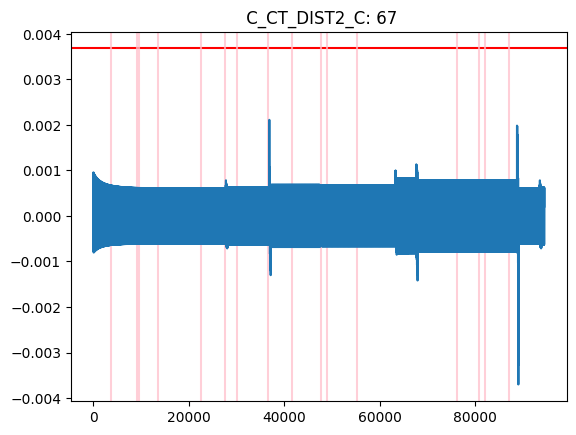

***********************************************************************************************
Sensor: 68  V_PT_FDR3_AN, Attack Type: PT_ratio, Time Attacked: 9.023901s to 19.576125s


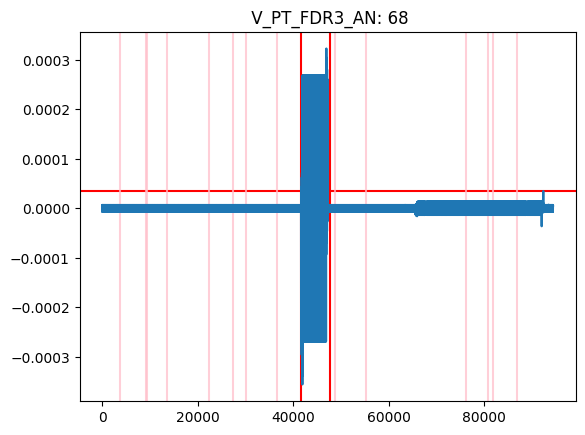

EDD = [115, 116, 117, 118, 155, 156, 157, 158, 159, 160, 161, 194, 195, 196, 197, 198, 199, 200, 201, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645

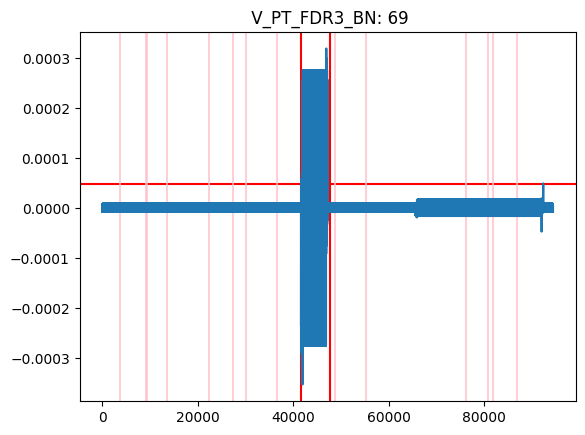

EDD = [142, 143, 144, 145, 146, 181, 182, 183, 184, 185, 186, 187, 221, 222, 223, 224, 225, 226, 227, 228, 261, 262, 263, 264, 265, 266, 267, 268, 269, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674

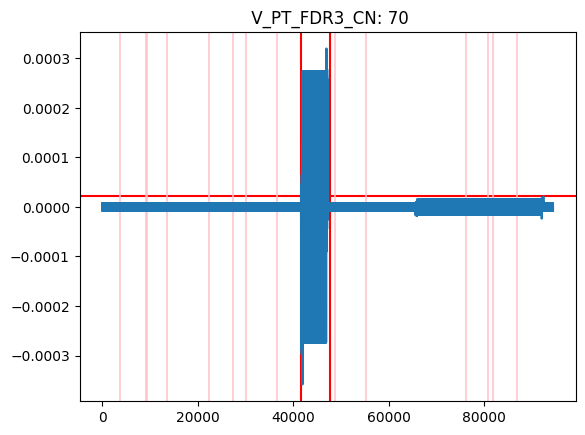

EDD = [88, 89, 90, 91, 92, 93, 127, 128, 129, 130, 131, 132, 133, 167, 168, 169, 170, 171, 172, 173, 174, 175, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623,

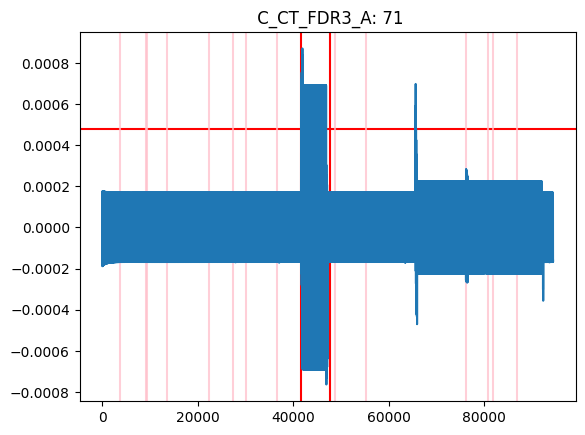

EDD = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 6

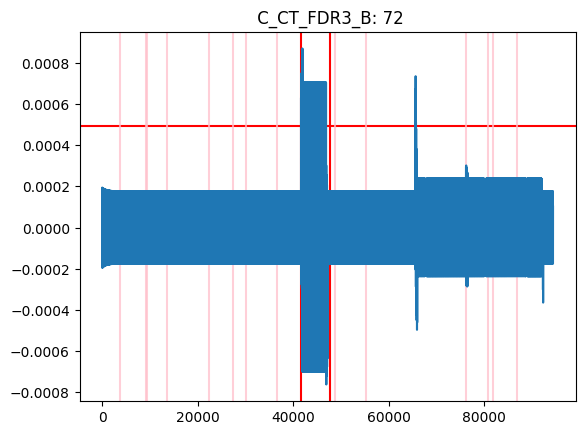

EDD = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 686, 687, 688, 689, 690, 691, 692, 693, 69

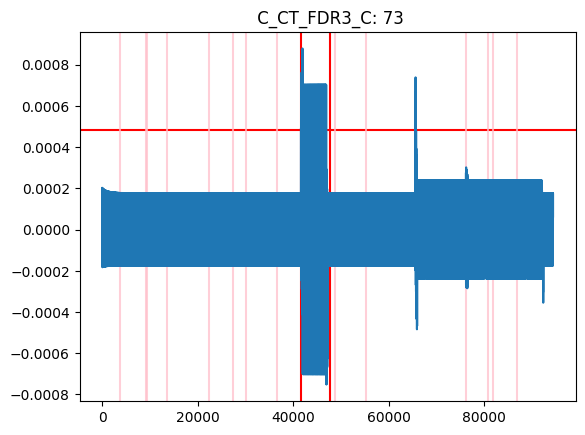

EDD = [0, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 348, 349, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 673, 674, 675, 676, 677, 678, 679, 680, 681, 6

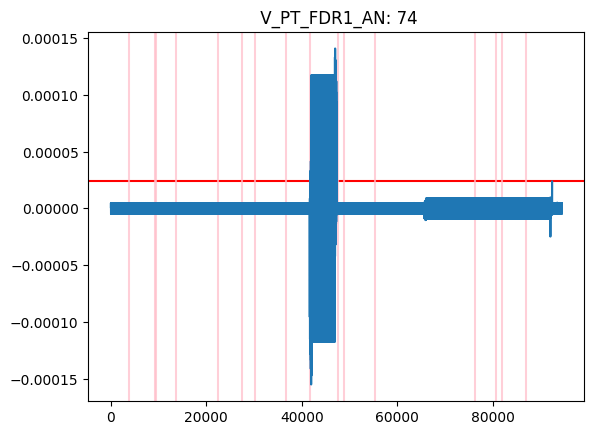

EDD = [0, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 348, 349, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 673, 674, 675, 676, 677, 678, 679, 680, 681, 6

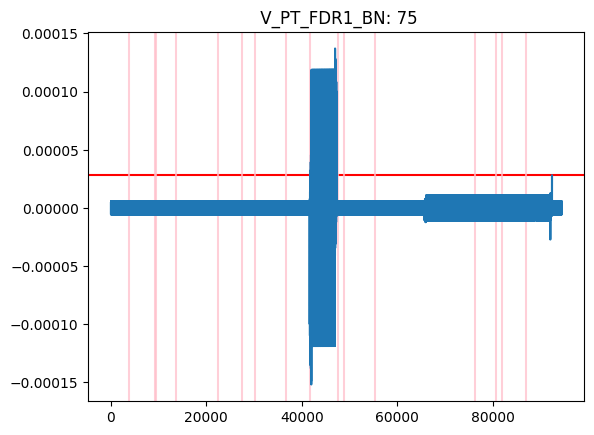

EDD = [0, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 348, 349, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 673, 674, 675, 676, 677, 678, 679, 680, 681, 6

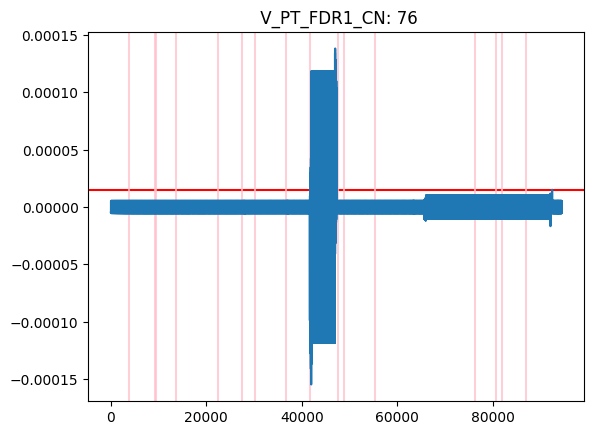

EDD = [0, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 348, 349, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 673, 674, 675, 676, 677, 678, 679, 680, 681, 6

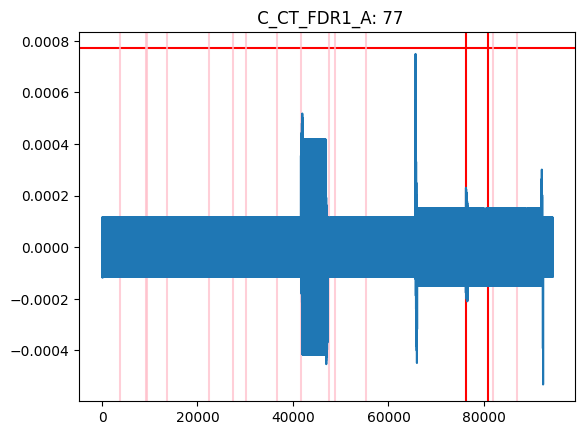

***********************************************************************************************
Sensor: 78  C_CT_FDR1_B, No Attacks


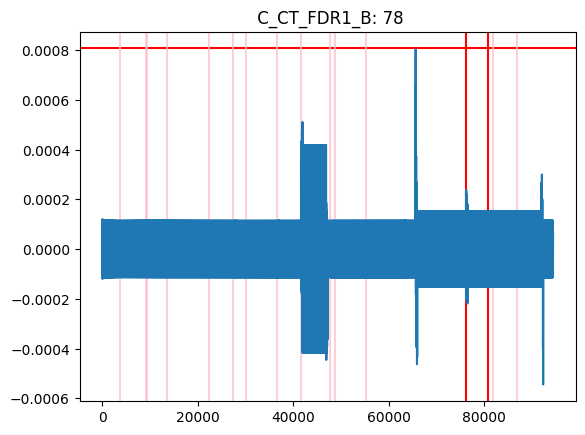

***********************************************************************************************
Sensor: 79  C_CT_FDR1_C, No Attacks


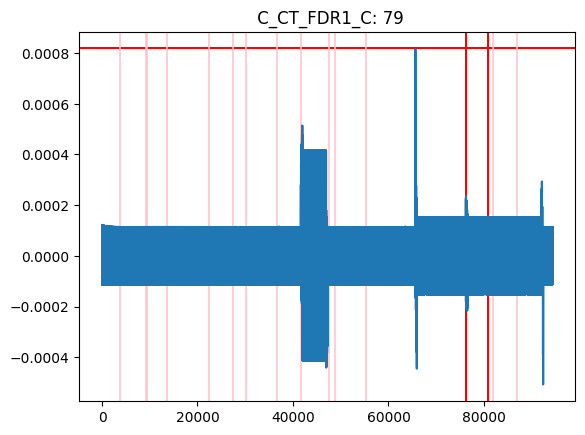

***********************************************************************************************
Sensor: 80  V_PT_FDR32_AN, No Attacks


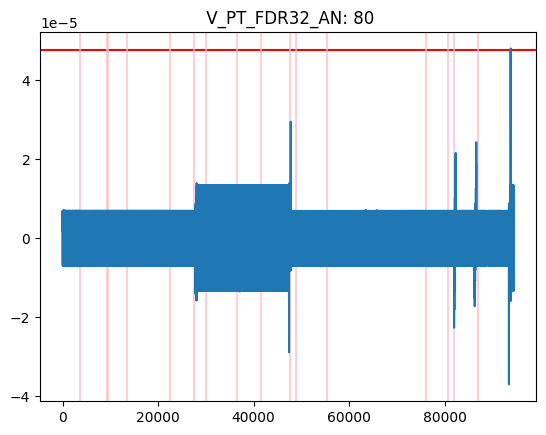

***********************************************************************************************
Sensor: 81  V_PT_FDR32_BN, Attack Type: PT_ratio, Time Attacked: 17.461972s to 18.370924s


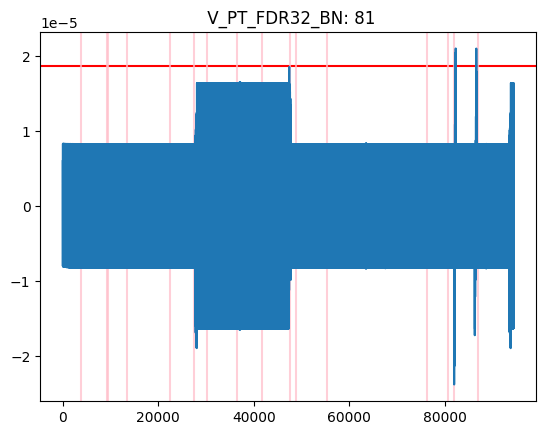

EDD = []
***********************************************************************************************
Sensor: 82  V_PT_FDR32_CN, No Attacks


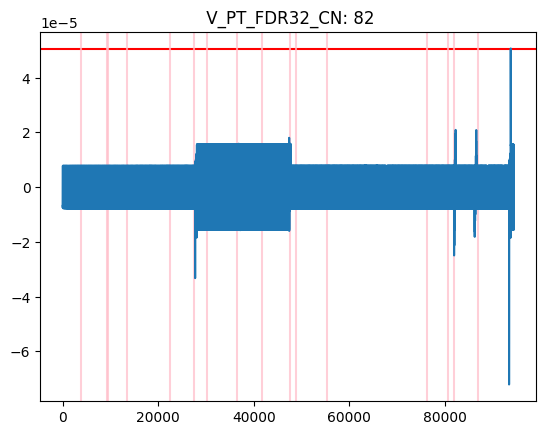

***********************************************************************************************
Sensor: 83  C_CT_FDR32_A, Attack Type: CT_ratio, Time Attacked: 6.104336s to 19.821748s


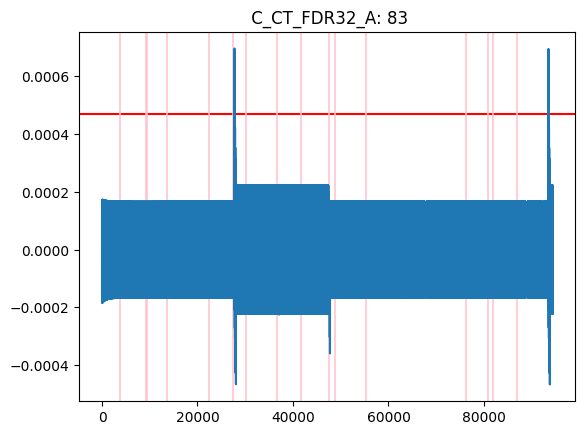

EDD = []
***********************************************************************************************
Sensor: 84  C_CT_FDR32_B, Attack Type: CT_ratio, Time Attacked: 6.610999s to 6.670999s


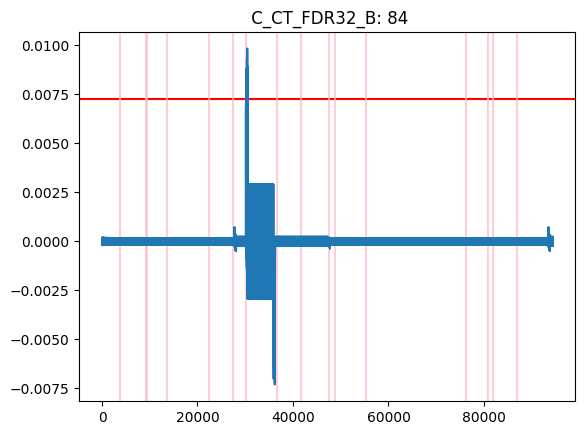

EDD = []
***********************************************************************************************
Sensor: 85  C_CT_FDR32_C, Attack Type: CT_ratio, Time Attacked: 6.099961s to 19.816748s


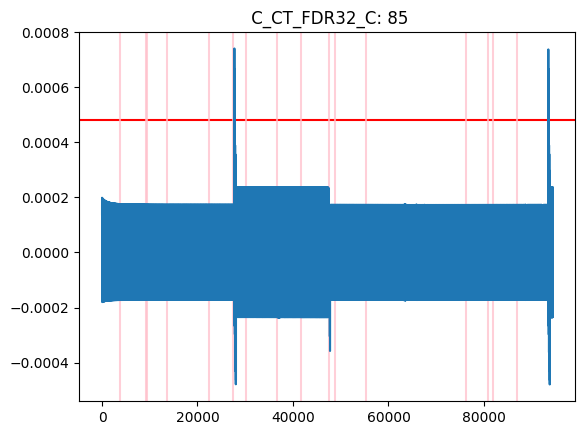

EDD = []
***********************************************************************************************
Sensor: 86  V_PT_FDR12_AN, Attack Type: PT_ratio, Time Attacked: 17.47093s to 18.372591s


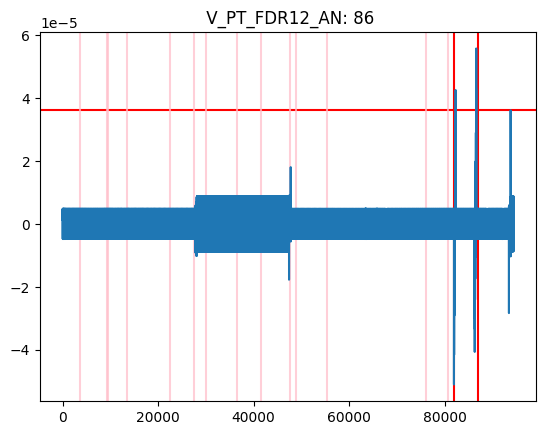

EDD = [341, 342, 343, 344, 345, 346, 347, 348, 349, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4663, 4664, 4665, 4666, 4667, 4668, 4669]
***********************************************************************************************
Sensor: 87  V_PT_FDR12_BN, Attack Type: PT_ratio, Time Attacked: 17.443638s to 18.372591s


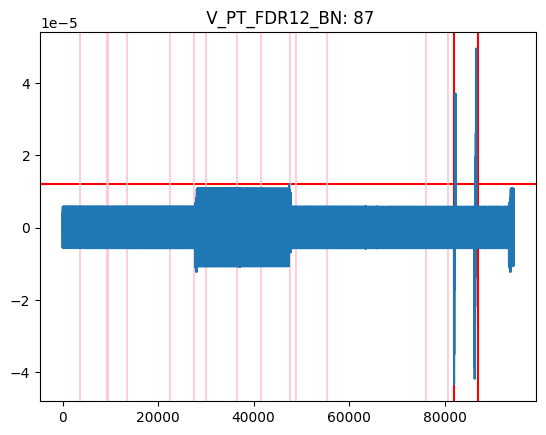

EDD = [210, 211, 212, 213, 214, 215, 216, 217, 218, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668, 4669]
***********************************************************************************************
Sensor: 88  V_PT_FDR12_CN, Attack Type: PT_

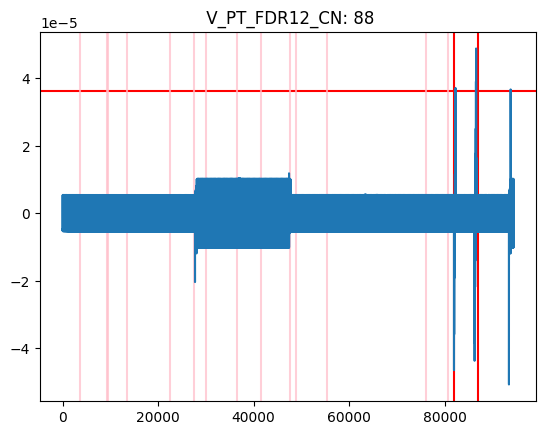

EDD = [318, 319, 320, 321, 4603, 4604, 4605, 4606, 4607, 4608, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 11870]
***********************************************************************************************
Sensor: 89  C_CT_FDR12_A, No Attacks


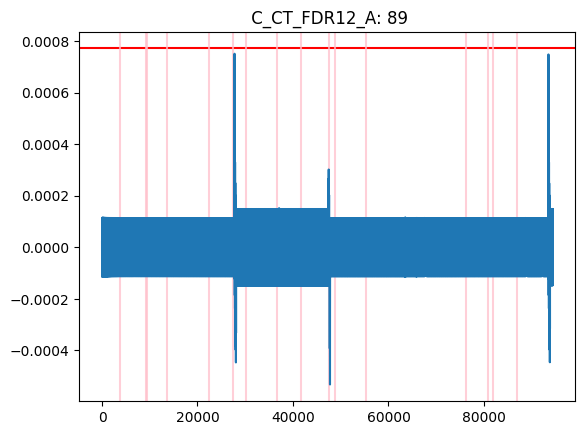

***********************************************************************************************
Sensor: 90  C_CT_FDR12_B, No Attacks


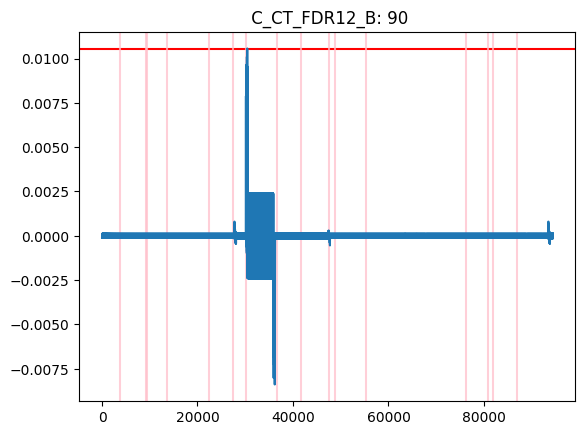

***********************************************************************************************
Sensor: 91  C_CT_FDR12_C, No Attacks


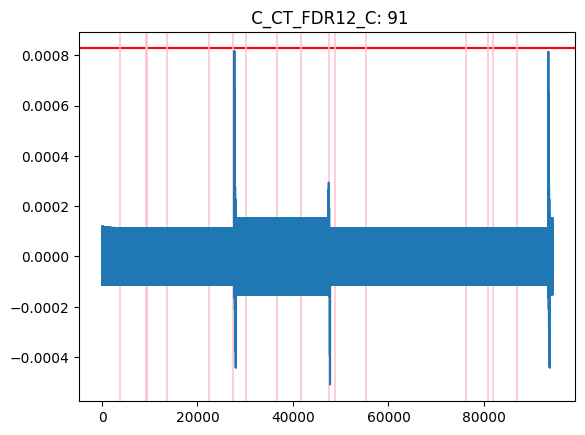

In [19]:
at_sensors = []
at_neighbor = {}
for index, i in enumerate(rsum_list):
    print("***********************************************************************************************")
    attack_in = []
    for indices, j in enumerate(i):
      if j > thresholds[index]:
        attack_in += [indices]
    if len(attack_in) > 3:
      start = (df_test['Time'][attack_in[0]+1201+window+w-1])/1e6
      end = (df_test['Time'][attack_in[-1]+1201+window+w-1])/1e6
      a_type = ""
      if cols[things[index]-1][1] == "C":
        a_type = "CT_ratio"
      elif cols[things[index]-1][1] == "V":
        a_type = "PT_ratio"
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, Attack Type: {a_type}, Time Attacked: {start}s to {end}s")
      at_sensors += [things[index]]
      at_neighbor[things[index]] = attack_in
      atk = True
    else:
      atk = False
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, No Attacks")


    plt.title(f"{cols[things[index]-1]}: {things[index]}")
    plt.axhline(thresholds[index], color='red')


    if things[index] in attack_dict:
      attack_indices = df_test.index[(df_test['Time'] >= attack_dict[things[index]][0] * 1e6) & (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201
      for start, end in all_attack_indices:
        if attack_indices[0] == start:
          set_zero = np.zeros(len(data_test)-window-w+1)
          for indices, j in enumerate(i):
            if j > thresholds[index]:
              set_zero[indices]=1
          start_w = start-window-w
          end_w = end+window+w-1

          EDD = expectation_detection_delay(set_zero,start_w)
       
          plt.axvline(start_w, color='red')
          plt.axvline(end_w, color='red')
        else:
          start_w = start-window-w
          end_w = end+window+w-1
          plt.axvline(start_w, color='pink', alpha=0.75)
          plt.axvline(end_w, color='pink', alpha=0.75)
    else:
       for start, end in all_attack_indices:
          start_w = start-window-w
          end_w = end+window+w-1
          plt.axvline(start_w, color='pink', alpha=0.75)
          plt.axvline(end_w, color='pink', alpha=0.75)
    
    plt.plot(i)
    plt.show()
    if atk:
      print(f"EDD = {EDD}")

***********************************************************************************************
Sensor: 1  C_CTWE5_A, No Attacks


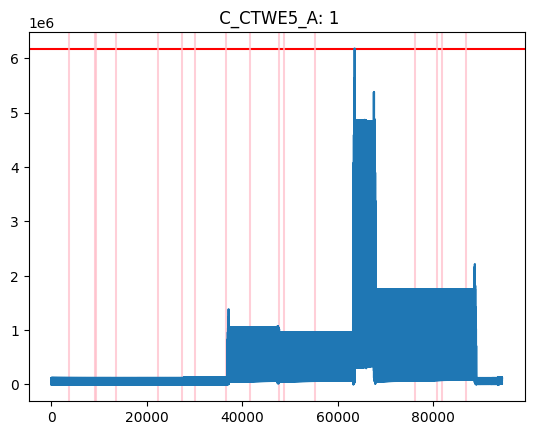

***********************************************************************************************
Sensor: 2  C_CTWE5_B, No Attacks


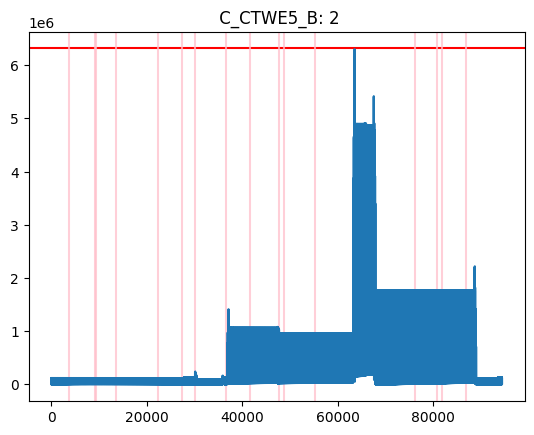

***********************************************************************************************
Sensor: 3  C_CTWE5_C, No Attacks


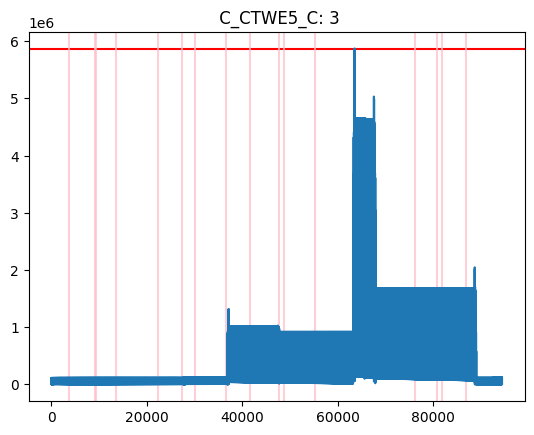

***********************************************************************************************
Sensor: 5  V_PTWE4_AN, Attack Type: PT_ratio, Time Attacked: 5.003926s to 5.972462s


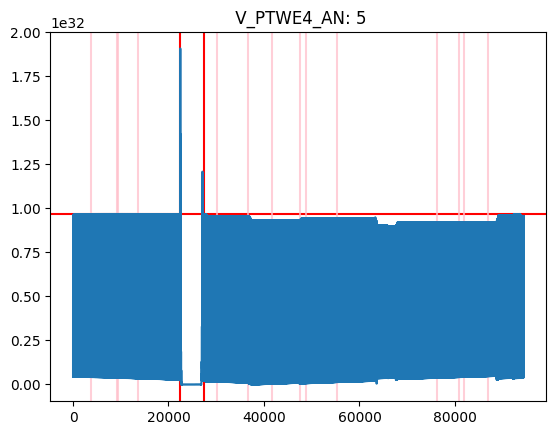

EDD = [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 4663, 4664, 4665, 4666, 4667, 4668]
***********************************************************************************************
Sensor: 6  V_PTWE4_BN, No Attacks


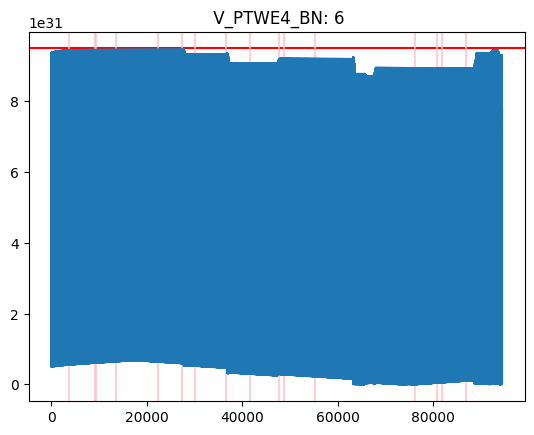

***********************************************************************************************
Sensor: 7  V_PTWE4_CN, No Attacks


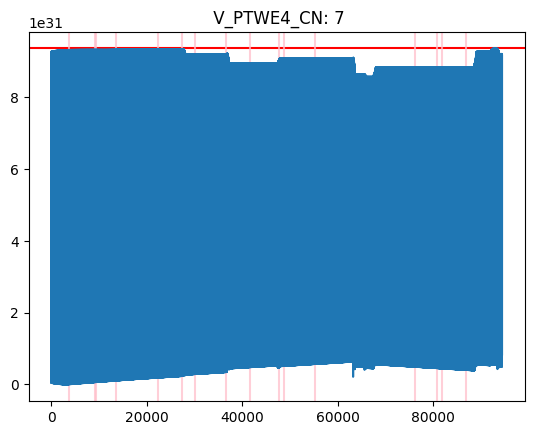

***********************************************************************************************
Sensor: 8  C_CTWE1_A, No Attacks


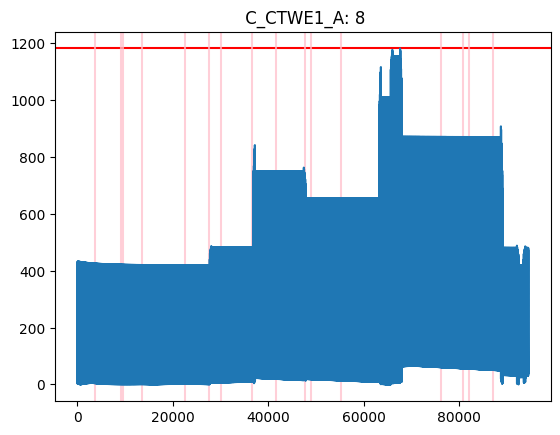

***********************************************************************************************
Sensor: 9  C_CTWE1_B, No Attacks


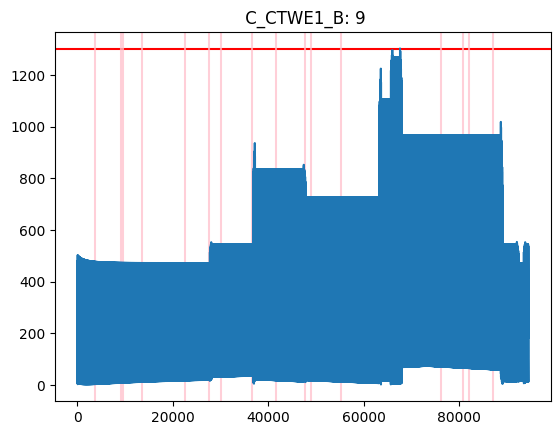

***********************************************************************************************
Sensor: 10  C_CTWE1_C, No Attacks


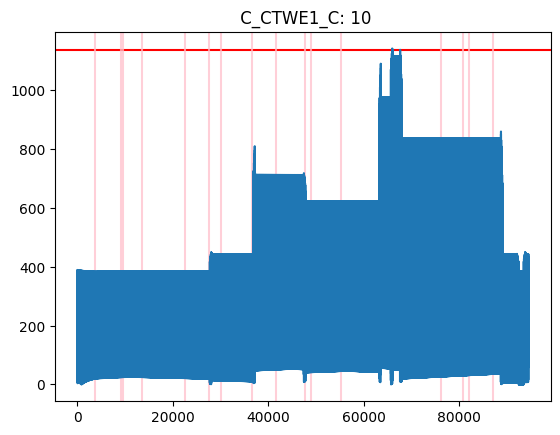

***********************************************************************************************
Sensor: 12  V_PTWE1_AN, Attack Type: PT_ratio, Time Attacked: 5.004135s to 5.047676s


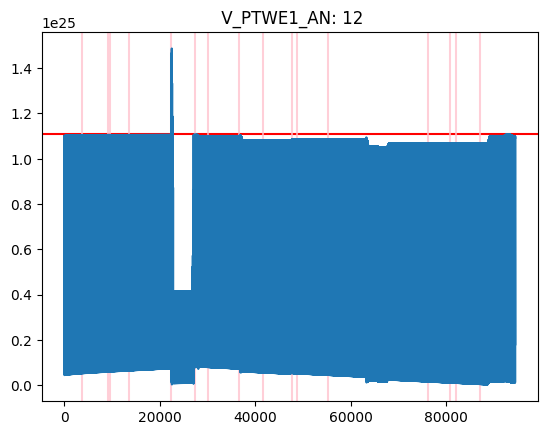

EDD = [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 4663, 4664, 4665, 4666, 4667, 4668]
***********************************************************************************************
Sensor: 13  V_PTWE1_BN, No Attacks


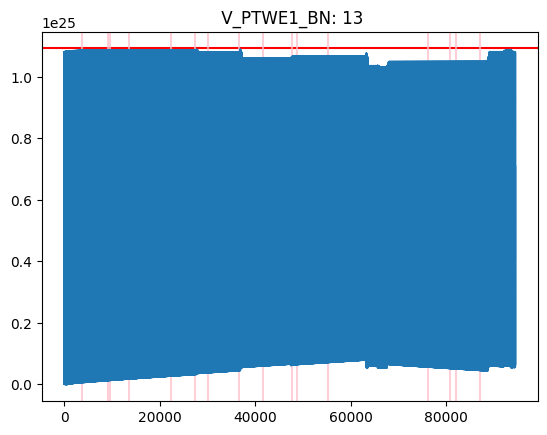

***********************************************************************************************
Sensor: 14  V_PTWE1_CN, No Attacks


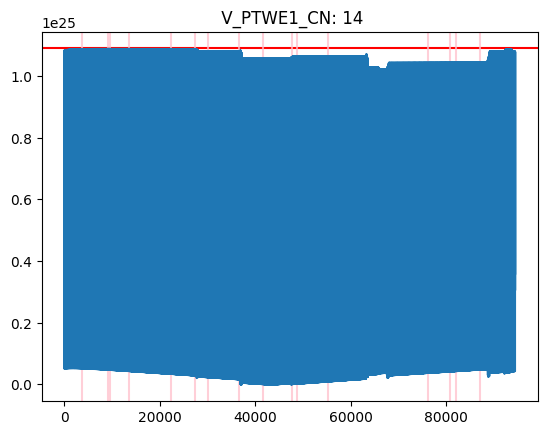

***********************************************************************************************
Sensor: 15  C_CTWE9_A, No Attacks


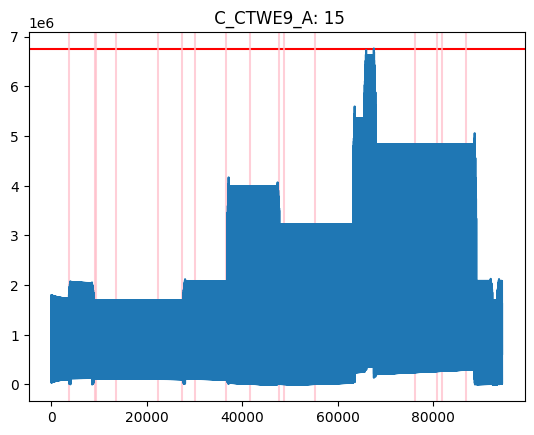

***********************************************************************************************
Sensor: 16  C_CTWE9_B, No Attacks


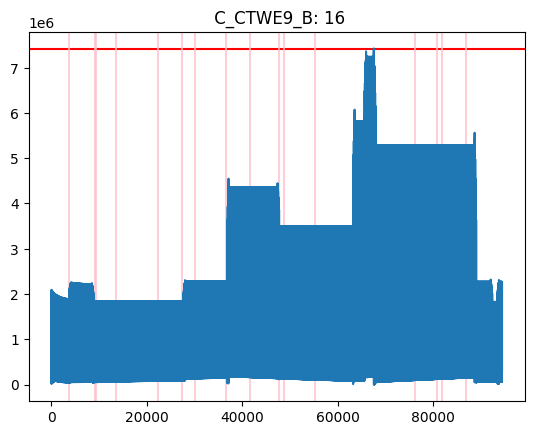

***********************************************************************************************
Sensor: 17  C_CTWE9_C, No Attacks


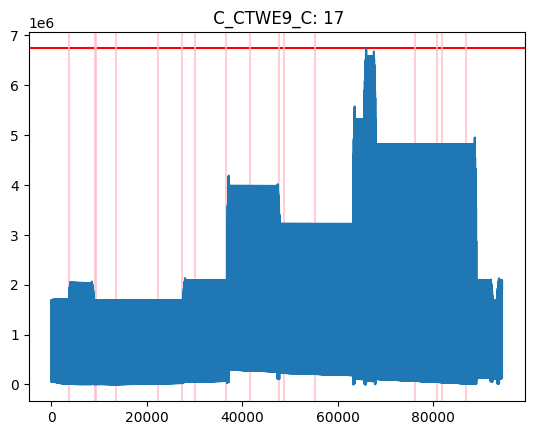

***********************************************************************************************
Sensor: 19  V_PTWE3_AN, Attack Type: PT_ratio, Time Attacked: 5.004135s to 5.047676s


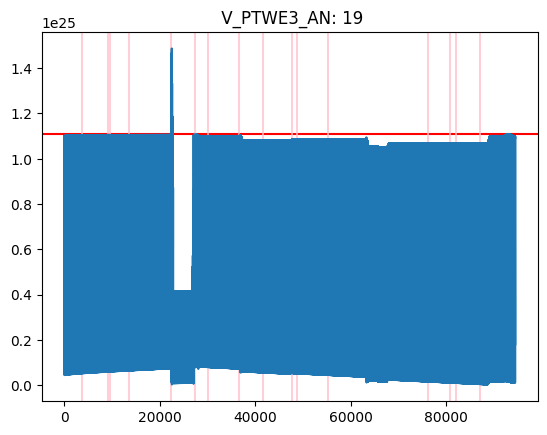

EDD = [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 4663, 4664, 4665, 4666, 4667, 4668]
***********************************************************************************************
Sensor: 20  V_PTWE3_BN, No Attacks


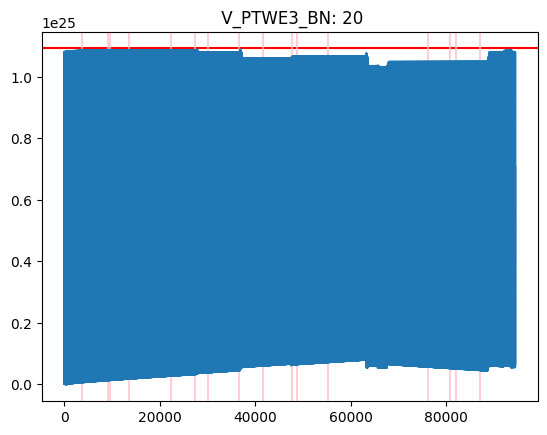

***********************************************************************************************
Sensor: 21  V_PTWE3_CN, No Attacks


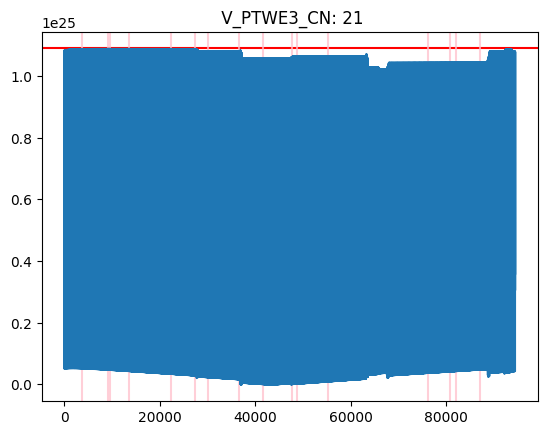

***********************************************************************************************
Sensor: 22  C_CTWE3_A, No Attacks


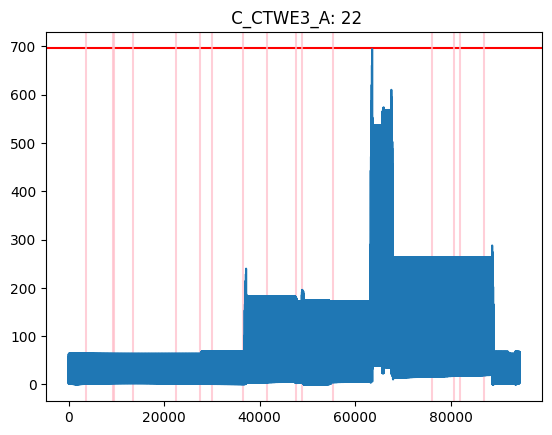

***********************************************************************************************
Sensor: 23  C_CTWE3_B, No Attacks


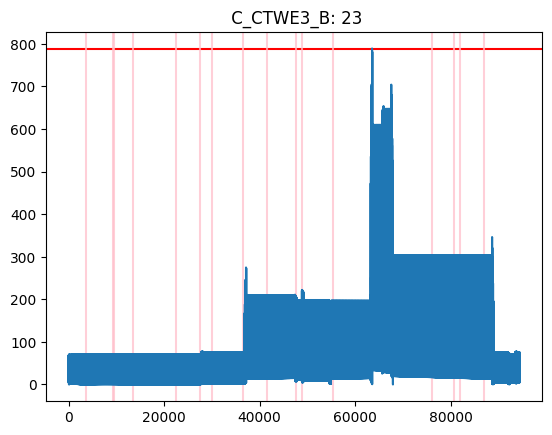

***********************************************************************************************
Sensor: 24  C_CTWE3_C, No Attacks


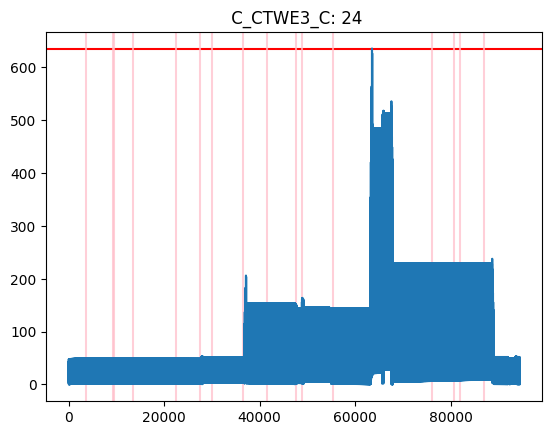

***********************************************************************************************
Sensor: 26  V_PTWE2_AN, Attack Type: PT_ratio, Time Attacked: 5.004343s to 19.804665s


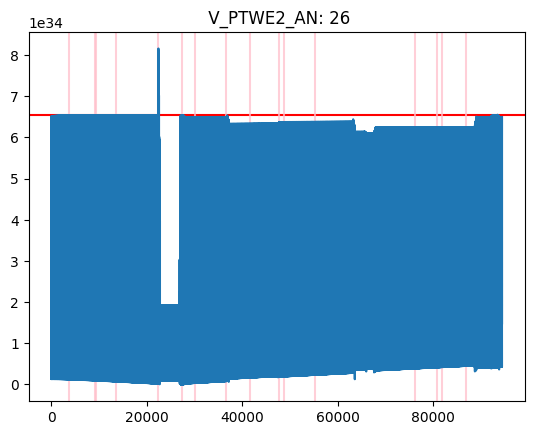

EDD = [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 4663, 4664, 4665, 4666, 4667, 4668]
***********************************************************************************************
Sensor: 27  V_PTWE2_BN, No Attacks


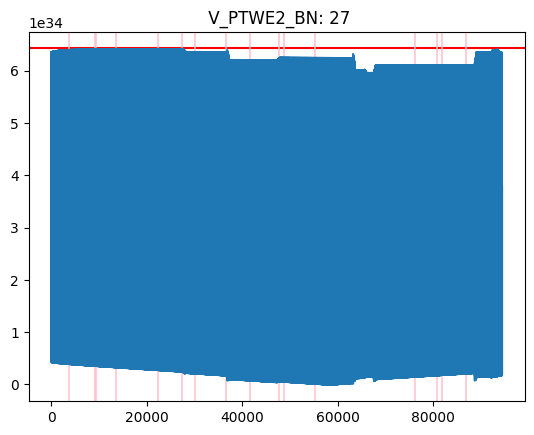

***********************************************************************************************
Sensor: 28  V_PTWE2_CN, No Attacks


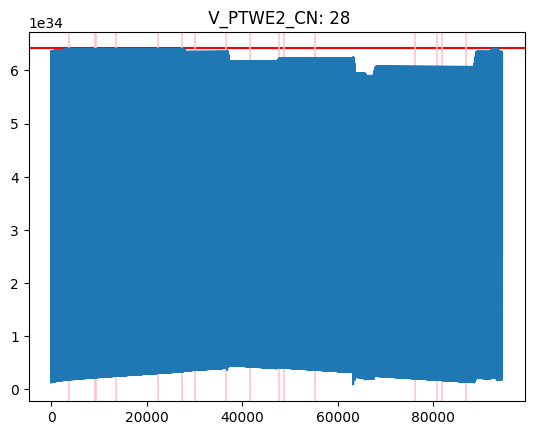

***********************************************************************************************
Sensor: 29  C_CTWE7_A, No Attacks


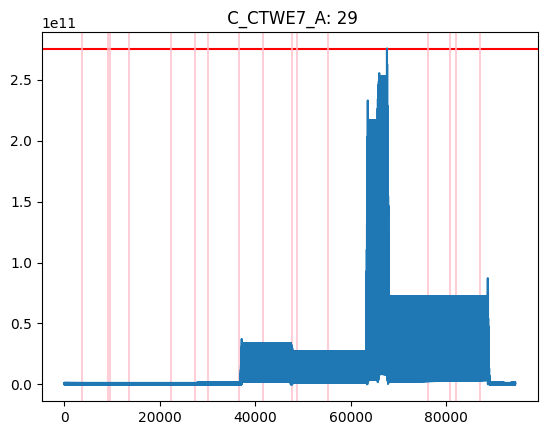

***********************************************************************************************
Sensor: 30  C_CTWE7_B, No Attacks


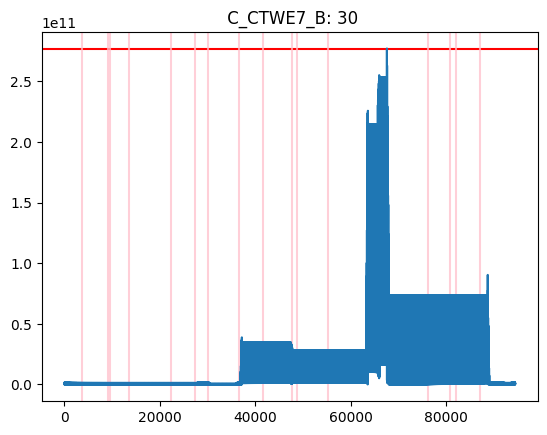

***********************************************************************************************
Sensor: 31  C_CTWE7_C, No Attacks


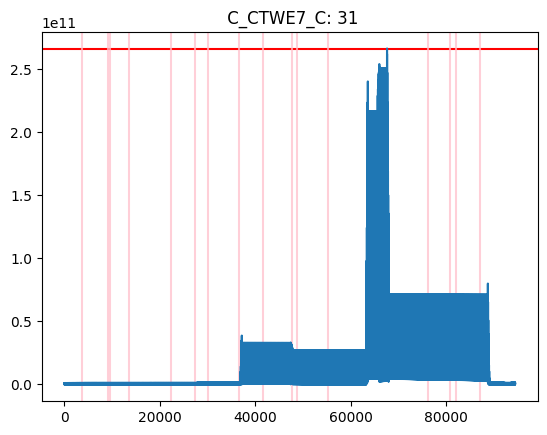

***********************************************************************************************
Sensor: 33  V_PTWE5_AN, No Attacks


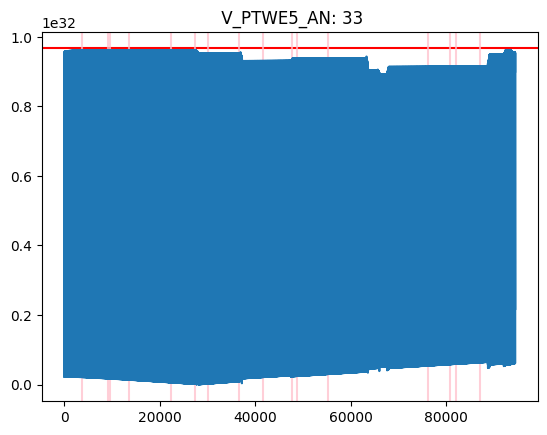

***********************************************************************************************
Sensor: 34  V_PTWE5_BN, No Attacks


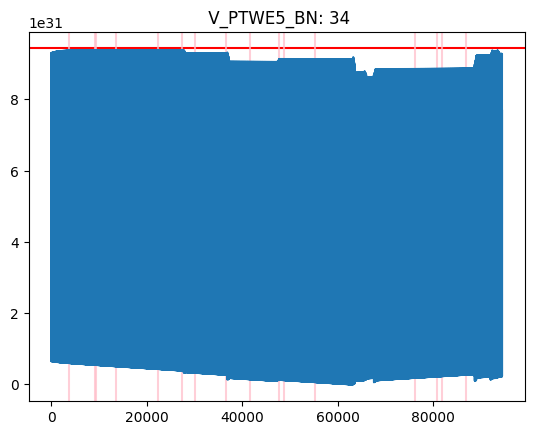

***********************************************************************************************
Sensor: 35  V_PTWE5_CN, No Attacks


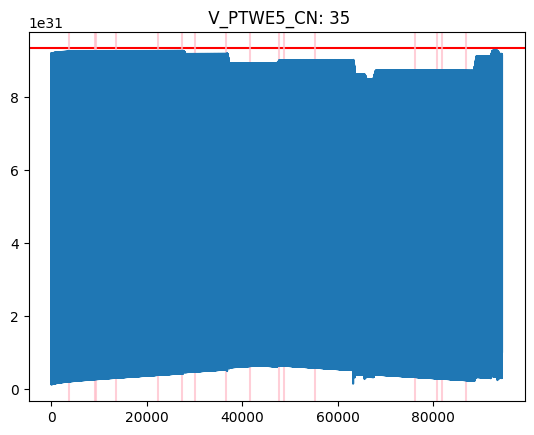

***********************************************************************************************
Sensor: 36  C_CTWE2_A, No Attacks


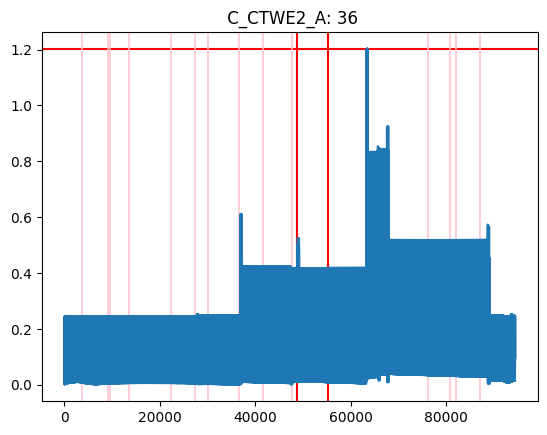

***********************************************************************************************
Sensor: 37  C_CTWE2_B, No Attacks


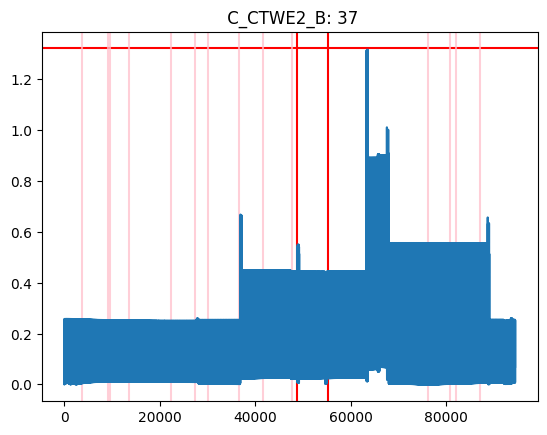

***********************************************************************************************
Sensor: 38  C_CTWE2_C, No Attacks


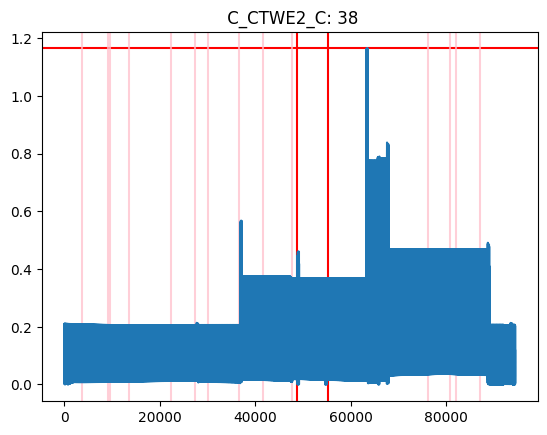

***********************************************************************************************
Sensor: 40  C_CTWE4_A, No Attacks


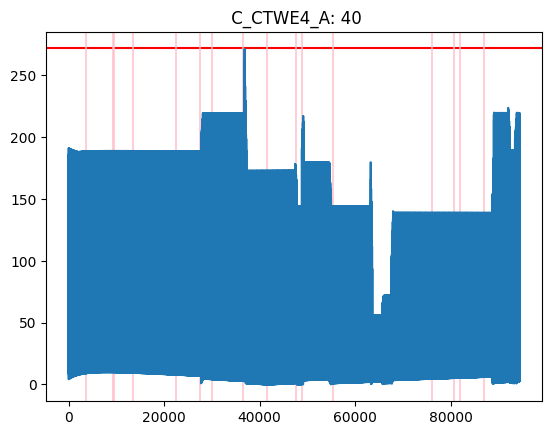

***********************************************************************************************
Sensor: 41  C_CTWE4_B, No Attacks


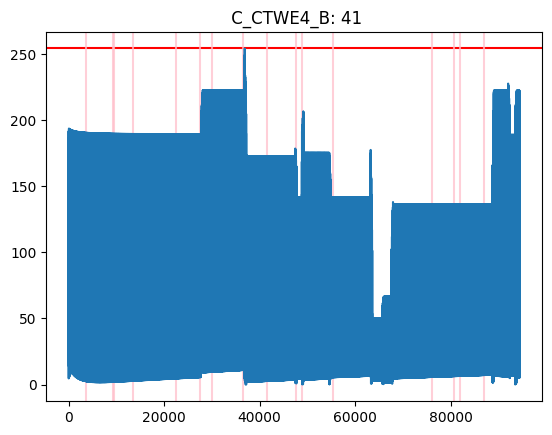

***********************************************************************************************
Sensor: 42  C_CTWE4_C, No Attacks


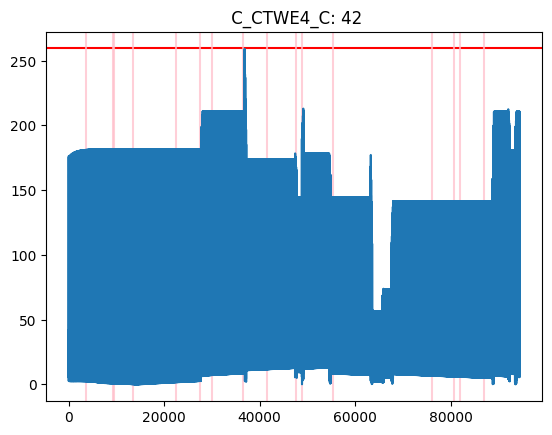

***********************************************************************************************
Sensor: 44  C_CTWE6_A, No Attacks


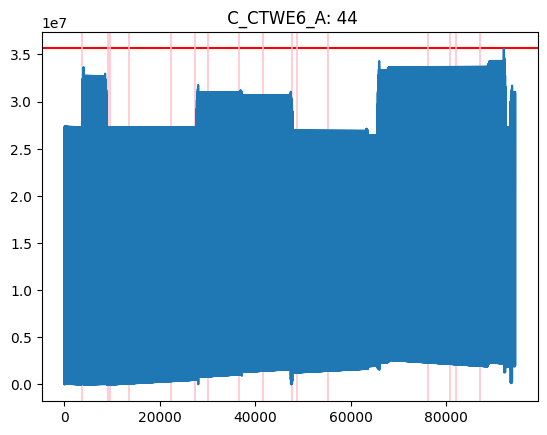

***********************************************************************************************
Sensor: 45  C_CTWE6_B, No Attacks


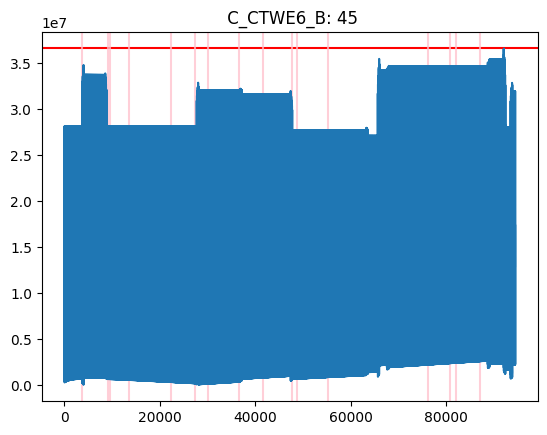

***********************************************************************************************
Sensor: 46  C_CTWE6_C, No Attacks


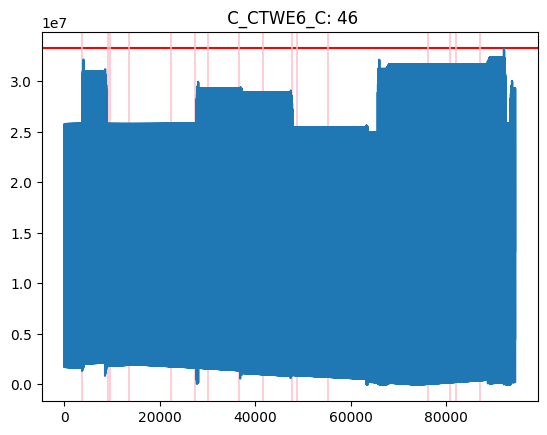

***********************************************************************************************
Sensor: 48  C_CTWE10_A, No Attacks


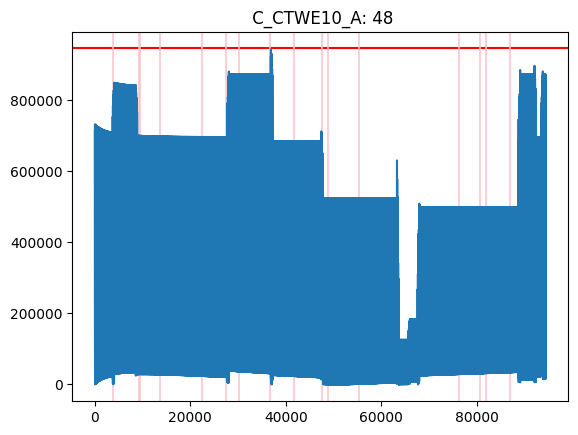

***********************************************************************************************
Sensor: 49  C_CTWE10_B, No Attacks


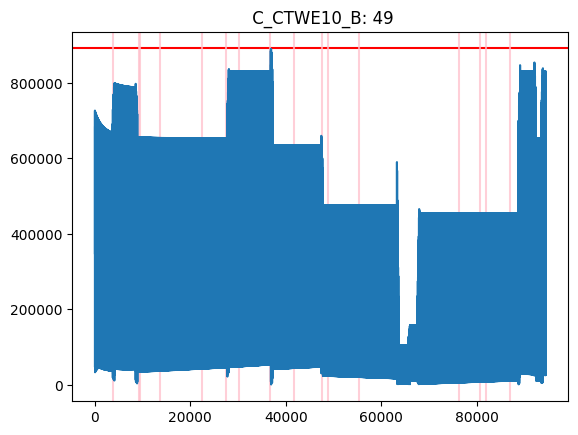

***********************************************************************************************
Sensor: 50  C_CTWE10_C, No Attacks


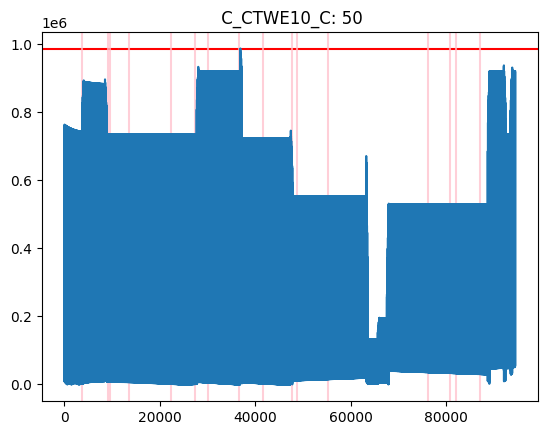

***********************************************************************************************
Sensor: 52  C_CTWE8_A, Attack Type: CT_ratio, Time Attacked: 1.126034s to 19.5055s


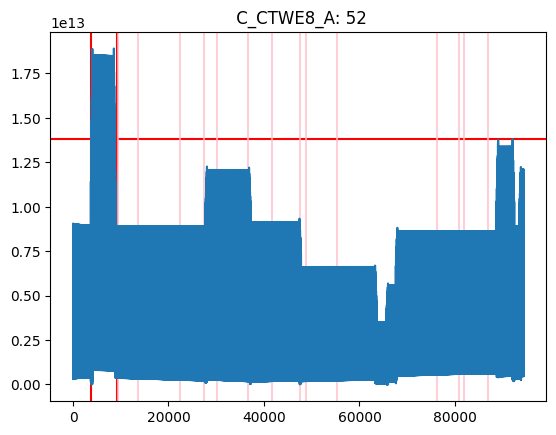

EDD = [125, 126, 127, 128, 164, 165, 166, 167, 168, 169, 203, 204, 205, 206, 207, 208, 209, 210, 243, 244, 245, 246, 247, 248, 249, 250, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 344, 345, 346, 347, 349, 350, 351, 363, 364, 365, 366, 367, 368, 369, 370, 371, 382, 383, 384, 385, 386, 387, 388, 389, 390, 403, 404, 405, 406, 407, 408, 409, 410, 411, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 443, 444, 445, 446, 447, 448, 449, 450, 451, 462, 463, 464, 465, 466, 467, 468, 469, 470, 483, 484, 485, 486, 487, 488, 489, 490, 491, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 523, 524, 525, 526, 527, 528, 529, 530, 531, 542, 543, 544, 545, 546, 547, 548, 549, 550, 563, 564, 565, 566, 567, 568, 569, 570, 571, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 603, 604, 605, 606, 607, 608, 609, 610, 611, 622, 623, 624, 625, 626, 627, 628, 629, 630, 643, 644, 645, 646, 647, 648, 649, 650, 651, 662, 663, 664, 665, 666, 667, 668, 669

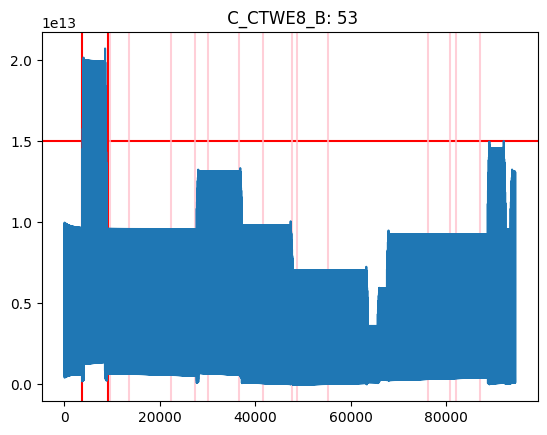

EDD = [152, 153, 154, 155, 191, 192, 193, 194, 195, 196, 230, 231, 232, 233, 234, 235, 236, 237, 269, 270, 271, 272, 273, 274, 275, 276, 277, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 332, 333, 348, 350, 351, 352, 353, 354, 355, 356, 357, 358, 369, 370, 371, 372, 373, 374, 375, 376, 377, 390, 391, 392, 393, 394, 395, 396, 397, 398, 409, 410, 411, 412, 413, 414, 415, 416, 417, 430, 431, 432, 433, 434, 435, 436, 437, 438, 449, 450, 451, 452, 453, 454, 455, 456, 457, 470, 471, 472, 473, 474, 475, 476, 477, 478, 489, 490, 491, 492, 493, 494, 495, 496, 497, 510, 511, 512, 513, 514, 515, 516, 517, 518, 529, 530, 531, 532, 533, 534, 535, 536, 537, 550, 551, 552, 553, 554, 555, 556, 557, 558, 569, 570, 571, 572, 573, 574, 575, 576, 577, 590, 591, 592, 593, 594, 595, 596, 597, 598, 609, 610, 611, 612, 613, 614, 615, 616, 617, 630, 631, 632, 633, 634, 635, 636, 637, 638, 649, 650, 651, 652, 653, 654, 655, 656, 657, 670, 671, 672, 673, 674, 675, 676, 677, 678, 689, 690, 691, 692, 693, 694

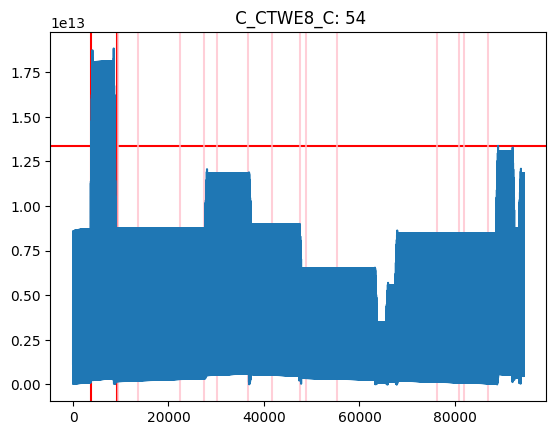

EDD = [138, 139, 140, 141, 142, 178, 179, 180, 181, 182, 216, 217, 218, 219, 220, 221, 222, 223, 256, 257, 258, 259, 260, 261, 262, 263, 264, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 318, 319, 320, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 356, 357, 358, 359, 360, 361, 362, 363, 364, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 396, 397, 398, 399, 400, 401, 402, 403, 404, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 436, 437, 438, 439, 440, 441, 442, 443, 444, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 476, 477, 478, 479, 480, 481, 482, 483, 484, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 516, 517, 518, 519, 520, 521, 522, 523, 524, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 556, 557, 558, 559, 560, 561, 562, 563, 564, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 596, 597, 598, 599, 600, 601, 602, 603, 604, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 636, 637, 638, 639, 640, 641, 642, 643, 644, 656, 657, 658, 659, 660, 661

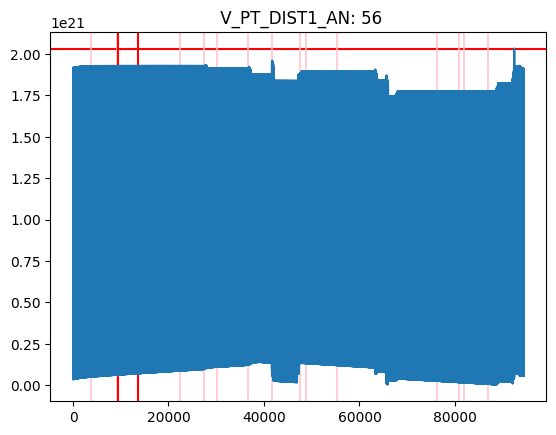

***********************************************************************************************
Sensor: 57  V_PT_DIST1_BN, No Attacks


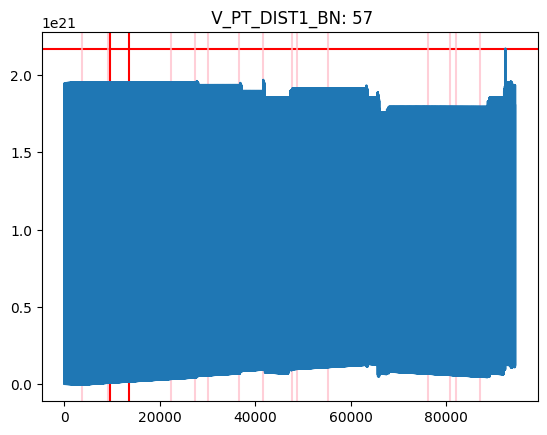

***********************************************************************************************
Sensor: 58  V_PT_DIST1_CN, Attack Type: PT_ratio, Time Attacked: 9.006817s to 9.048484s


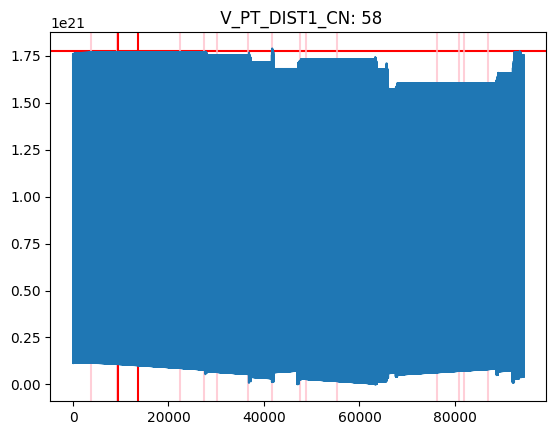

EDD = [32193, 32232, 32233, 32313, 32393]
***********************************************************************************************
Sensor: 59  C_CT_DIST1_A, Attack Type: CT_ratio, Time Attacked: 16.267188s to 17.013016s


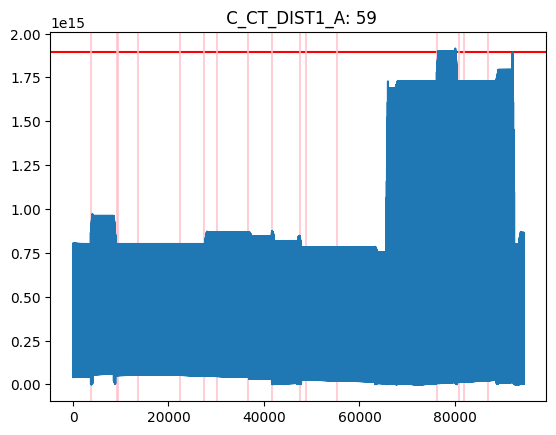

EDD = [32193, 32232, 32233, 32313, 32393]
***********************************************************************************************
Sensor: 60  C_CT_DIST1_B, Attack Type: CT_ratio, Time Attacked: 16.264479s to 19.501959s


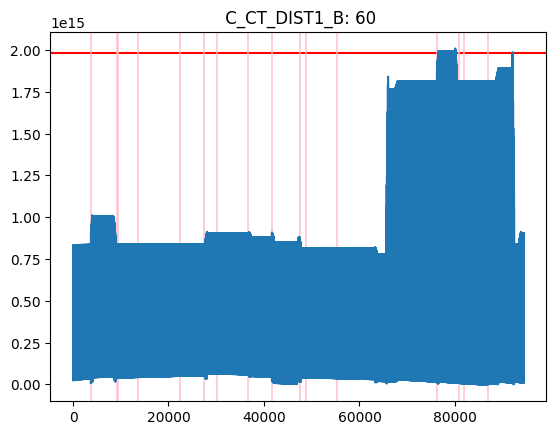

EDD = [32193, 32232, 32233, 32313, 32393]
***********************************************************************************************
Sensor: 61  C_CT_DIST1_C, Attack Type: CT_ratio, Time Attacked: 16.261771s to 17.015724s


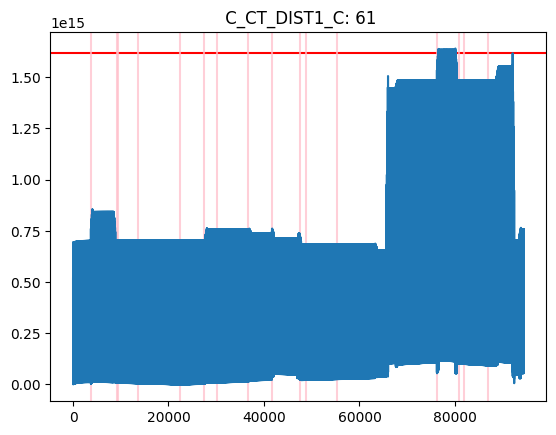

EDD = [32193, 32232, 32233, 32313, 32393]
***********************************************************************************************
Sensor: 62  V_PT_DIST2_AN, Attack Type: PT_ratio, Time Attacked: 5.00351s to 18.345716s


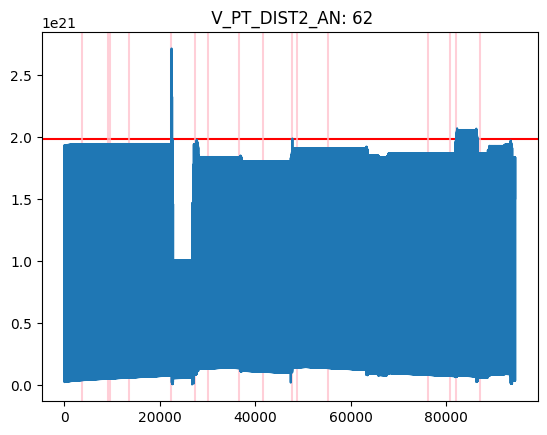

EDD = [32193, 32232, 32233, 32313, 32393]
***********************************************************************************************
Sensor: 63  V_PT_DIST2_BN, No Attacks


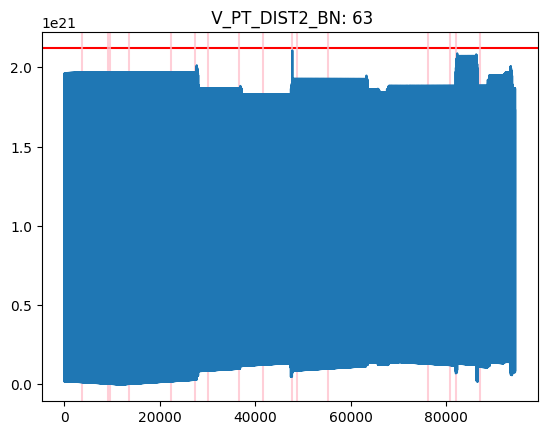

***********************************************************************************************
Sensor: 64  V_PT_DIST2_CN, Attack Type: PT_ratio, Time Attacked: 17.427597s to 18.340091s


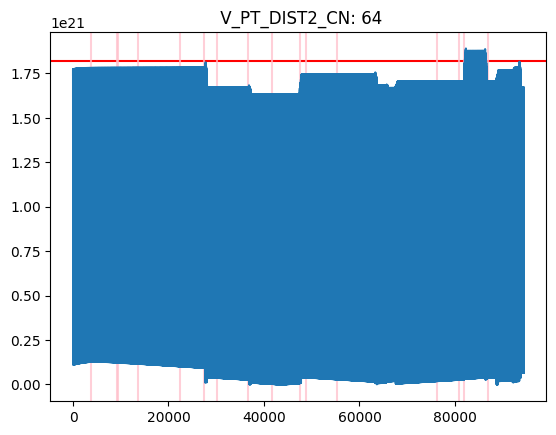

EDD = [32193, 32232, 32233, 32313, 32393]
***********************************************************************************************
Sensor: 65  C_CT_DIST2_A, No Attacks


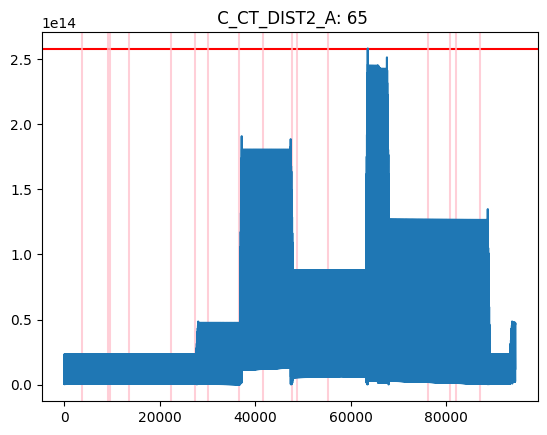

***********************************************************************************************
Sensor: 66  C_CT_DIST2_B, No Attacks


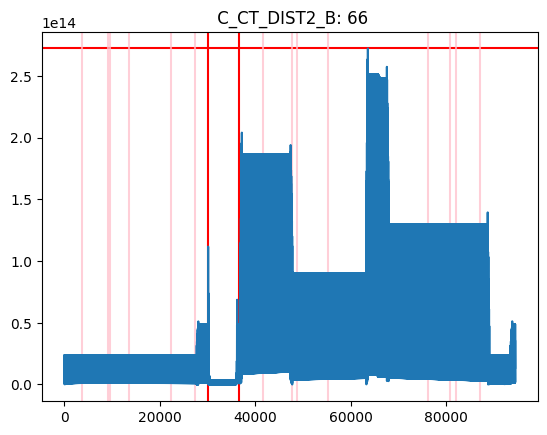

***********************************************************************************************
Sensor: 67  C_CT_DIST2_C, No Attacks


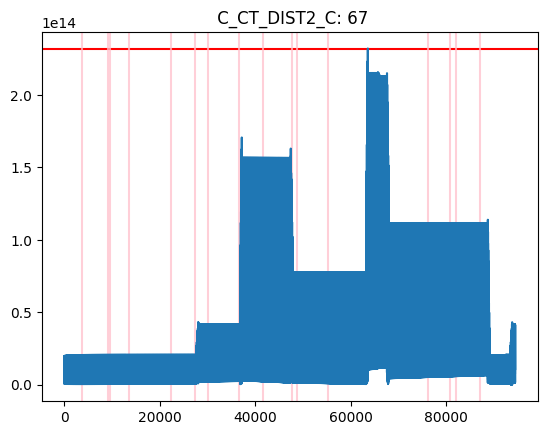

***********************************************************************************************
Sensor: 68  V_PT_FDR3_AN, Attack Type: PT_ratio, Time Attacked: 9.004109s to 19.578833s


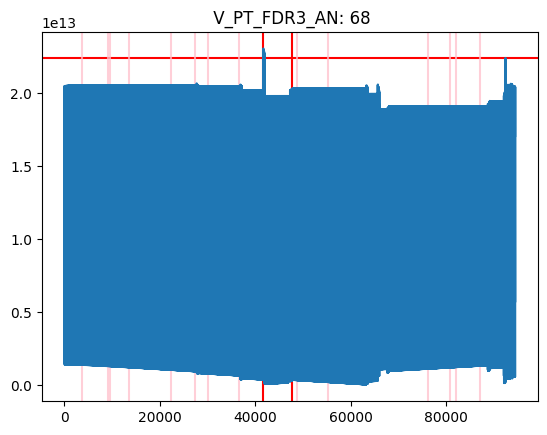

EDD = [20, 59, 60, 61, 100, 139, 140, 141, 220, 221, 300, 301, 50779]
***********************************************************************************************
Sensor: 69  V_PT_FDR3_BN, No Attacks


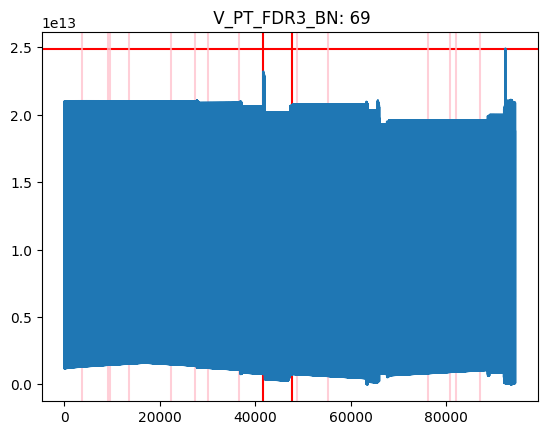

***********************************************************************************************
Sensor: 70  V_PT_FDR3_CN, Attack Type: PT_ratio, Time Attacked: 9.002442s to 9.069734s


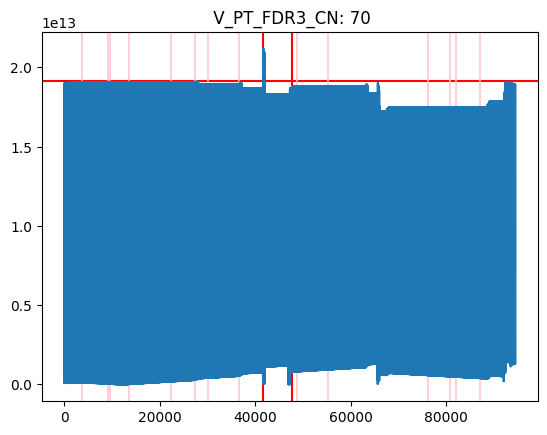

EDD = [12, 13, 14, 15, 16, 32, 33, 34, 35, 36, 52, 53, 54, 55, 56, 71, 72, 73, 74, 75, 76, 93, 94, 95, 112, 113, 114, 115, 116, 132, 133, 134, 135, 136, 151, 152, 153, 154, 155, 156, 173, 174, 175, 192, 193, 194, 195, 196, 212, 213, 214, 215, 216, 231, 232, 233, 234, 235, 236, 253, 254, 255, 272, 273, 274, 275, 276, 292, 293, 294, 295, 296, 312, 313, 314, 315, 316, 333, 334, 335]
***********************************************************************************************
Sensor: 71  C_CT_FDR3_A, Attack Type: CT_ratio, Time Attacked: 16.200521s to 17.071349s


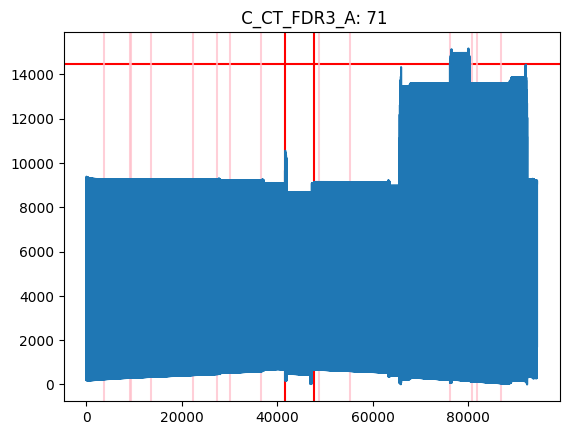

EDD = [34563, 34603, 34642, 34643, 34682, 34683, 34684, 34722, 34723, 34724, 34762, 34763, 34764, 34802, 34803, 34804, 34842, 34843, 34844, 34881, 34882, 34883, 34884, 34922, 34923, 34924, 34942, 34943, 34944, 34962, 34963, 34964, 34982, 34983, 34984, 35002, 35003, 35004, 35022, 35023, 35024, 35042, 35043, 35044, 35062, 35063, 35064, 35082, 35083, 35084, 35102, 35103, 35104, 35122, 35123, 35124, 35142, 35143, 35144, 35162, 35163, 35164, 35182, 35183, 35184, 35202, 35203, 35204, 35222, 35223, 35224, 35242, 35243, 35244, 35262, 35263, 35264, 35282, 35283, 35284, 35302, 35303, 35304, 35322, 35323, 35324, 35342, 35343, 35344, 35362, 35363, 35364, 35382, 35383, 35384, 35402, 35403, 35404, 35422, 35423, 35424, 35442, 35443, 35444, 35462, 35463, 35464, 35482, 35483, 35484, 35502, 35503, 35504, 35522, 35523, 35524, 35542, 35543, 35544, 35562, 35563, 35564, 35582, 35583, 35584, 35602, 35603, 35604, 35622, 35623, 35624, 35642, 35643, 35644, 35662, 35663, 35664, 35682, 35683, 35684, 35702, 35703,

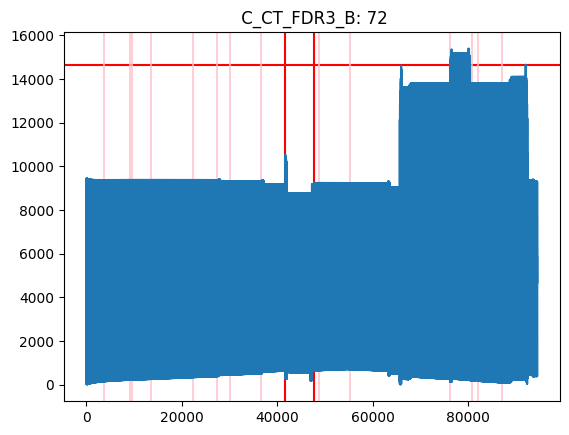

EDD = [34590, 34629, 34630, 34631, 34669, 34670, 34709, 34710, 34711, 34749, 34750, 34751, 34789, 34790, 34791, 34829, 34830, 34831, 34868, 34869, 34870, 34871, 34908, 34909, 34910, 34911, 34929, 34930, 34931, 34949, 34950, 34951, 34969, 34970, 34971, 34989, 34990, 34991, 35009, 35010, 35011, 35029, 35030, 35031, 35049, 35050, 35051, 35069, 35070, 35071, 35089, 35090, 35091, 35109, 35110, 35111, 35129, 35130, 35131, 35149, 35150, 35151, 35169, 35170, 35171, 35189, 35190, 35191, 35209, 35210, 35211, 35229, 35230, 35231, 35249, 35250, 35251, 35269, 35270, 35271, 35289, 35290, 35291, 35309, 35310, 35311, 35329, 35330, 35331, 35349, 35350, 35351, 35369, 35370, 35371, 35389, 35390, 35391, 35409, 35410, 35411, 35429, 35430, 35431, 35449, 35450, 35451, 35469, 35470, 35471, 35489, 35490, 35491, 35509, 35510, 35511, 35529, 35530, 35531, 35549, 35550, 35551, 35569, 35570, 35571, 35589, 35590, 35591, 35609, 35610, 35611, 35629, 35630, 35631, 35649, 35650, 35651, 35669, 35670, 35671, 35689, 35690,

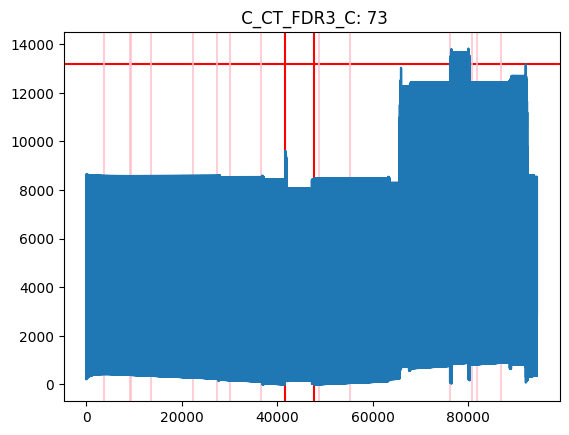

EDD = [34576, 34616, 34617, 34656, 34657, 34695, 34696, 34697, 34735, 34736, 34737, 34775, 34776, 34777, 34778, 34815, 34816, 34817, 34818, 34855, 34856, 34857, 34858, 34895, 34896, 34897, 34898, 34915, 34916, 34917, 34935, 34936, 34937, 34938, 34955, 34956, 34957, 34975, 34976, 34977, 34978, 34995, 34996, 34997, 35015, 35016, 35017, 35018, 35035, 35036, 35037, 35055, 35056, 35057, 35058, 35075, 35076, 35077, 35095, 35096, 35097, 35098, 35115, 35116, 35117, 35135, 35136, 35137, 35138, 35155, 35156, 35157, 35175, 35176, 35177, 35178, 35195, 35196, 35197, 35215, 35216, 35217, 35218, 35235, 35236, 35237, 35255, 35256, 35257, 35258, 35275, 35276, 35277, 35295, 35296, 35297, 35298, 35315, 35316, 35317, 35335, 35336, 35337, 35338, 35355, 35356, 35357, 35375, 35376, 35377, 35378, 35395, 35396, 35397, 35415, 35416, 35417, 35418, 35435, 35436, 35437, 35455, 35456, 35457, 35458, 35475, 35476, 35477, 35495, 35496, 35497, 35498, 35515, 35516, 35517, 35535, 35536, 35537, 35538, 35555, 35556, 35557,

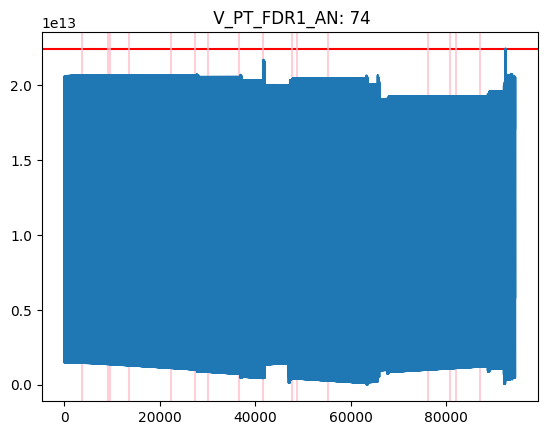

***********************************************************************************************
Sensor: 75  V_PT_FDR1_BN, No Attacks


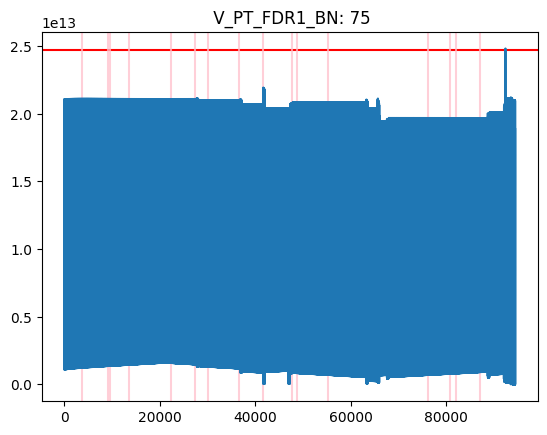

***********************************************************************************************
Sensor: 76  V_PT_FDR1_CN, Attack Type: PT_ratio, Time Attacked: 6.115169s to 9.069525s


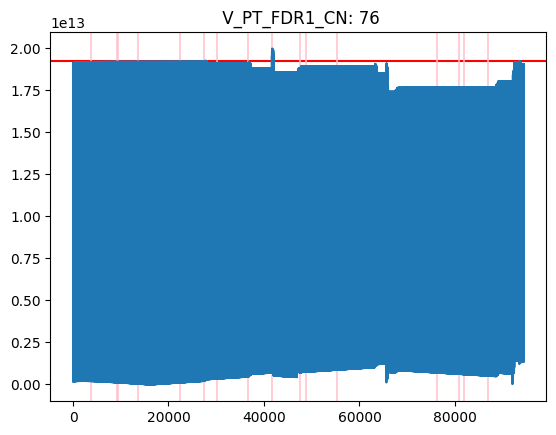

EDD = [34576, 34616, 34617, 34656, 34657, 34695, 34696, 34697, 34735, 34736, 34737, 34775, 34776, 34777, 34778, 34815, 34816, 34817, 34818, 34855, 34856, 34857, 34858, 34895, 34896, 34897, 34898, 34915, 34916, 34917, 34935, 34936, 34937, 34938, 34955, 34956, 34957, 34975, 34976, 34977, 34978, 34995, 34996, 34997, 35015, 35016, 35017, 35018, 35035, 35036, 35037, 35055, 35056, 35057, 35058, 35075, 35076, 35077, 35095, 35096, 35097, 35098, 35115, 35116, 35117, 35135, 35136, 35137, 35138, 35155, 35156, 35157, 35175, 35176, 35177, 35178, 35195, 35196, 35197, 35215, 35216, 35217, 35218, 35235, 35236, 35237, 35255, 35256, 35257, 35258, 35275, 35276, 35277, 35295, 35296, 35297, 35298, 35315, 35316, 35317, 35335, 35336, 35337, 35338, 35355, 35356, 35357, 35375, 35376, 35377, 35378, 35395, 35396, 35397, 35415, 35416, 35417, 35418, 35435, 35436, 35437, 35455, 35456, 35457, 35458, 35475, 35476, 35477, 35495, 35496, 35497, 35498, 35515, 35516, 35517, 35535, 35536, 35537, 35538, 35555, 35556, 35557,

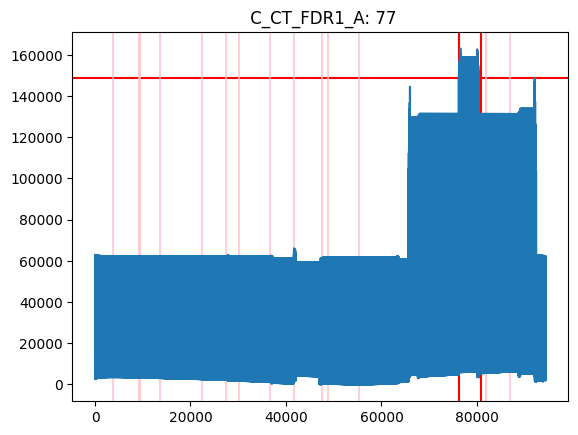

EDD = [2, 42, 43, 81, 82, 83, 121, 122, 123, 160, 161, 162, 163, 164, 200, 201, 202, 203, 204, 240, 241, 242, 243, 244, 280, 281, 282, 283, 284, 320, 321, 322, 323, 324, 361, 362, 363, 364, 380, 381, 382, 383, 384, 401, 402, 403, 404, 420, 421, 422, 423, 424, 441, 442, 443, 444, 460, 461, 462, 463, 464, 481, 482, 483, 484, 500, 501, 502, 503, 504, 521, 522, 523, 524, 540, 541, 542, 543, 544, 561, 562, 563, 564, 580, 581, 582, 583, 584, 601, 602, 603, 604, 620, 621, 622, 623, 624, 641, 642, 643, 644, 660, 661, 662, 663, 664, 681, 682, 683, 684, 700, 701, 702, 703, 704, 721, 722, 723, 724, 740, 741, 742, 743, 744, 761, 762, 763, 764, 780, 781, 782, 783, 784, 801, 802, 803, 804, 820, 821, 822, 823, 824, 841, 842, 843, 844, 860, 861, 862, 863, 864, 881, 882, 883, 884, 900, 901, 902, 903, 904, 921, 922, 923, 924, 940, 941, 942, 943, 944, 961, 962, 963, 964, 980, 981, 982, 983, 984, 1001, 1002, 1003, 1004, 1020, 1021, 1022, 1023, 1024, 1041, 1042, 1043, 1044, 1060, 1061, 1062, 1063, 1064, 10

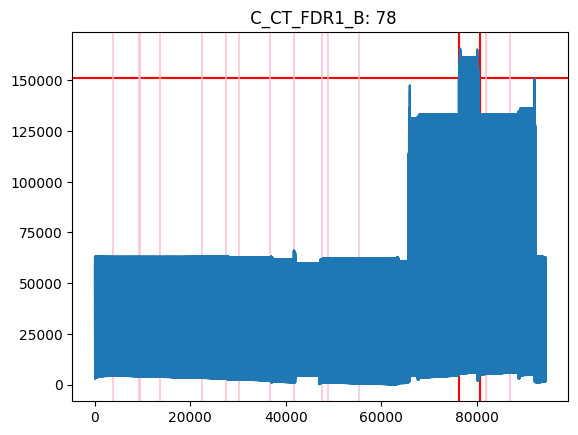

EDD = [68, 69, 70, 108, 109, 110, 147, 148, 149, 150, 151, 188, 189, 190, 227, 228, 229, 230, 231, 267, 268, 269, 270, 271, 307, 308, 309, 310, 311, 347, 348, 349, 350, 351, 367, 368, 369, 370, 371, 388, 389, 390, 391, 407, 408, 409, 410, 411, 428, 429, 430, 431, 447, 448, 449, 450, 451, 468, 469, 470, 471, 487, 488, 489, 490, 491, 508, 509, 510, 511, 527, 528, 529, 530, 531, 548, 549, 550, 551, 567, 568, 569, 570, 571, 588, 589, 590, 591, 607, 608, 609, 610, 611, 628, 629, 630, 631, 647, 648, 649, 650, 651, 668, 669, 670, 671, 687, 688, 689, 690, 691, 708, 709, 710, 711, 727, 728, 729, 730, 731, 748, 749, 750, 751, 767, 768, 769, 770, 771, 788, 789, 790, 791, 807, 808, 809, 810, 811, 828, 829, 830, 831, 847, 848, 849, 850, 851, 868, 869, 870, 871, 887, 888, 889, 890, 891, 908, 909, 910, 911, 927, 928, 929, 930, 931, 948, 949, 950, 951, 967, 968, 969, 970, 971, 988, 989, 990, 991, 1007, 1008, 1009, 1010, 1011, 1028, 1029, 1030, 1031, 1047, 1048, 1049, 1050, 1051, 1068, 1069, 1070, 1071

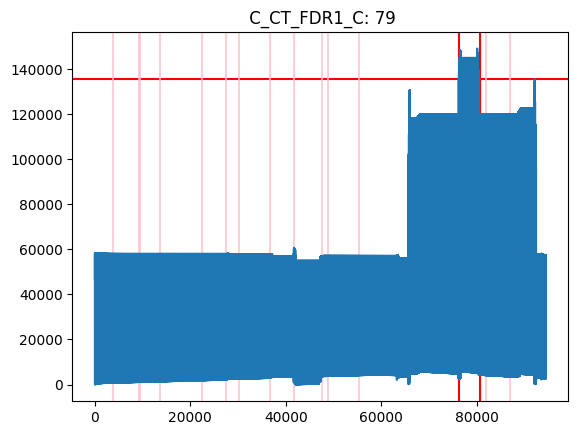

EDD = [15, 16, 54, 55, 56, 57, 94, 95, 96, 97, 134, 135, 136, 137, 174, 175, 176, 177, 214, 215, 216, 217, 254, 255, 256, 257, 258, 293, 294, 295, 296, 297, 298, 333, 334, 335, 336, 337, 338, 354, 355, 356, 357, 374, 375, 376, 377, 378, 394, 395, 396, 397, 414, 415, 416, 417, 418, 434, 435, 436, 437, 454, 455, 456, 457, 458, 474, 475, 476, 477, 494, 495, 496, 497, 498, 514, 515, 516, 517, 534, 535, 536, 537, 538, 554, 555, 556, 557, 574, 575, 576, 577, 578, 594, 595, 596, 597, 614, 615, 616, 617, 618, 634, 635, 636, 637, 654, 655, 656, 657, 658, 674, 675, 676, 677, 694, 695, 696, 697, 698, 714, 715, 716, 717, 734, 735, 736, 737, 738, 754, 755, 756, 757, 774, 775, 776, 777, 778, 794, 795, 796, 797, 814, 815, 816, 817, 818, 834, 835, 836, 837, 854, 855, 856, 857, 858, 874, 875, 876, 877, 894, 895, 896, 897, 898, 914, 915, 916, 917, 934, 935, 936, 937, 938, 954, 955, 956, 957, 974, 975, 976, 977, 978, 994, 995, 996, 997, 1014, 1015, 1016, 1017, 1018, 1034, 1035, 1036, 1037, 1054, 1055, 10

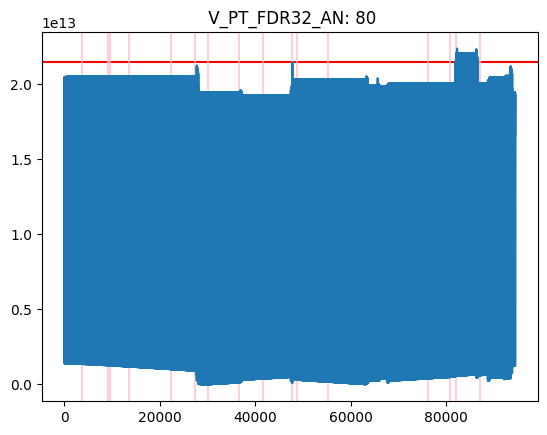

EDD = [15, 16, 54, 55, 56, 57, 94, 95, 96, 97, 134, 135, 136, 137, 174, 175, 176, 177, 214, 215, 216, 217, 254, 255, 256, 257, 258, 293, 294, 295, 296, 297, 298, 333, 334, 335, 336, 337, 338, 354, 355, 356, 357, 374, 375, 376, 377, 378, 394, 395, 396, 397, 414, 415, 416, 417, 418, 434, 435, 436, 437, 454, 455, 456, 457, 458, 474, 475, 476, 477, 494, 495, 496, 497, 498, 514, 515, 516, 517, 534, 535, 536, 537, 538, 554, 555, 556, 557, 574, 575, 576, 577, 578, 594, 595, 596, 597, 614, 615, 616, 617, 618, 634, 635, 636, 637, 654, 655, 656, 657, 658, 674, 675, 676, 677, 694, 695, 696, 697, 698, 714, 715, 716, 717, 734, 735, 736, 737, 738, 754, 755, 756, 757, 774, 775, 776, 777, 778, 794, 795, 796, 797, 814, 815, 816, 817, 818, 834, 835, 836, 837, 854, 855, 856, 857, 858, 874, 875, 876, 877, 894, 895, 896, 897, 898, 914, 915, 916, 917, 934, 935, 936, 937, 938, 954, 955, 956, 957, 974, 975, 976, 977, 978, 994, 995, 996, 997, 1014, 1015, 1016, 1017, 1018, 1034, 1035, 1036, 1037, 1054, 1055, 10

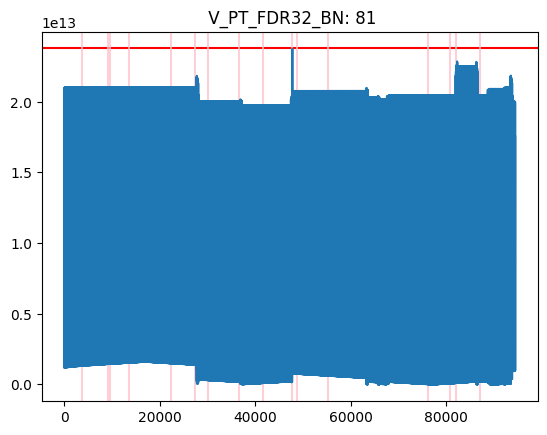

***********************************************************************************************
Sensor: 82  V_PT_FDR32_CN, Attack Type: PT_ratio, Time Attacked: 17.41093s to 18.356966s


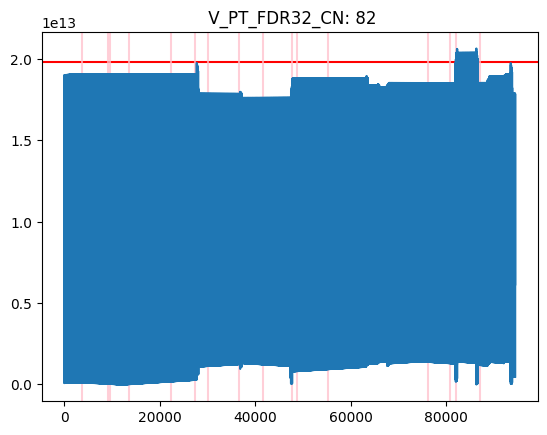

EDD = [15, 16, 54, 55, 56, 57, 94, 95, 96, 97, 134, 135, 136, 137, 174, 175, 176, 177, 214, 215, 216, 217, 254, 255, 256, 257, 258, 293, 294, 295, 296, 297, 298, 333, 334, 335, 336, 337, 338, 354, 355, 356, 357, 374, 375, 376, 377, 378, 394, 395, 396, 397, 414, 415, 416, 417, 418, 434, 435, 436, 437, 454, 455, 456, 457, 458, 474, 475, 476, 477, 494, 495, 496, 497, 498, 514, 515, 516, 517, 534, 535, 536, 537, 538, 554, 555, 556, 557, 574, 575, 576, 577, 578, 594, 595, 596, 597, 614, 615, 616, 617, 618, 634, 635, 636, 637, 654, 655, 656, 657, 658, 674, 675, 676, 677, 694, 695, 696, 697, 698, 714, 715, 716, 717, 734, 735, 736, 737, 738, 754, 755, 756, 757, 774, 775, 776, 777, 778, 794, 795, 796, 797, 814, 815, 816, 817, 818, 834, 835, 836, 837, 854, 855, 856, 857, 858, 874, 875, 876, 877, 894, 895, 896, 897, 898, 914, 915, 916, 917, 934, 935, 936, 937, 938, 954, 955, 956, 957, 974, 975, 976, 977, 978, 994, 995, 996, 997, 1014, 1015, 1016, 1017, 1018, 1034, 1035, 1036, 1037, 1054, 1055, 10

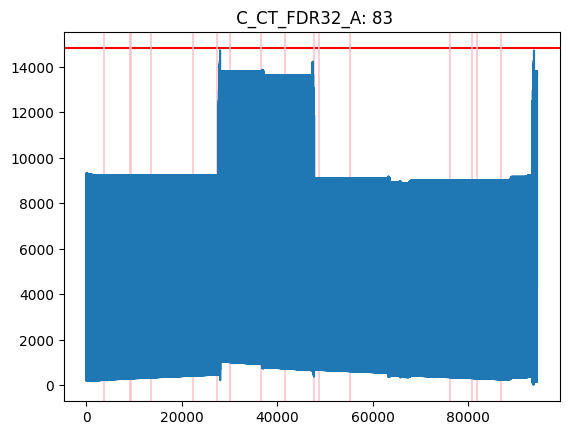

***********************************************************************************************
Sensor: 84  C_CT_FDR32_B, No Attacks


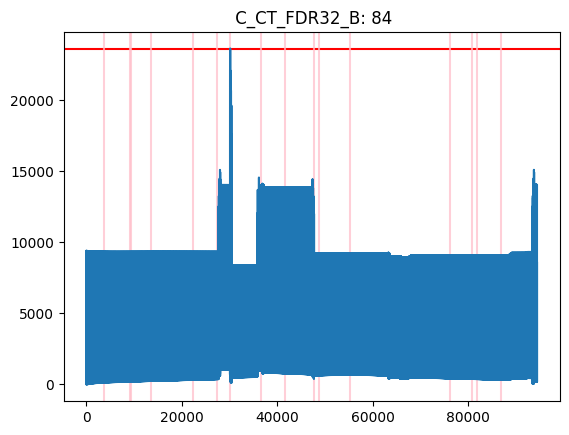

***********************************************************************************************
Sensor: 85  C_CT_FDR32_C, No Attacks


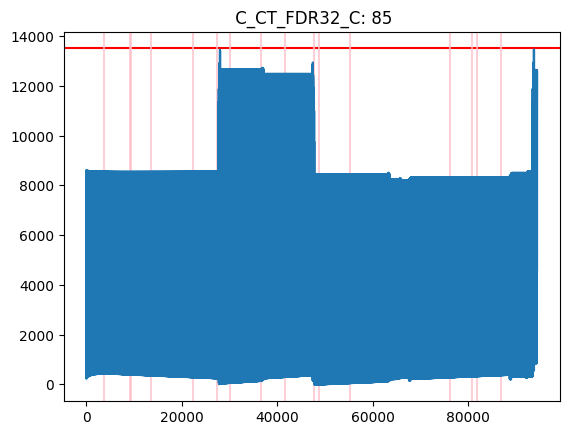

***********************************************************************************************
Sensor: 86  V_PT_FDR12_AN, Attack Type: PT_ratio, Time Attacked: 10.278893s to 18.371132s


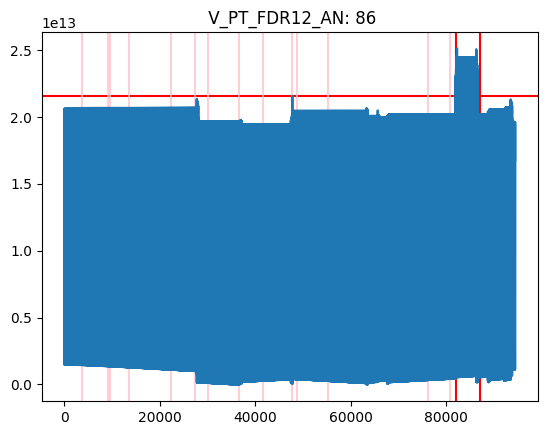

EDD = [-34181, 0, 1, 2, 38, 39, 40, 41, 42, 78, 79, 80, 81, 82, 118, 119, 120, 121, 122, 157, 158, 159, 160, 161, 162, 197, 198, 199, 200, 201, 202, 203, 237, 238, 239, 240, 241, 242, 243, 277, 278, 279, 280, 281, 282, 283, 317, 318, 319, 320, 321, 322, 323, 358, 359, 360, 361, 362, 363, 377, 378, 379, 380, 381, 382, 383, 398, 399, 400, 401, 402, 403, 417, 418, 419, 420, 421, 422, 423, 438, 439, 440, 441, 442, 443, 457, 458, 459, 460, 461, 462, 463, 478, 479, 480, 481, 482, 483, 497, 498, 499, 500, 501, 502, 503, 518, 519, 520, 521, 522, 523, 537, 538, 539, 540, 541, 542, 543, 558, 559, 560, 561, 562, 563, 577, 578, 579, 580, 581, 582, 583, 598, 599, 600, 601, 602, 603, 617, 618, 619, 620, 621, 622, 623, 638, 639, 640, 641, 642, 643, 657, 658, 659, 660, 661, 662, 663, 678, 679, 680, 681, 682, 683, 697, 698, 699, 700, 701, 702, 703, 718, 719, 720, 721, 722, 723, 737, 738, 739, 740, 741, 742, 743, 758, 759, 760, 761, 762, 763, 777, 778, 779, 780, 781, 782, 783, 798, 799, 800, 801, 802, 8

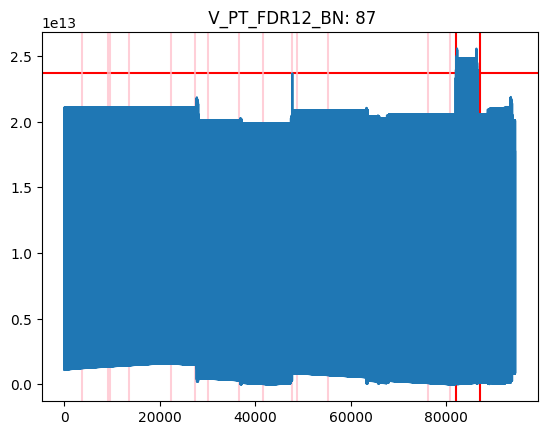

EDD = [66, 67, 107, 146, 147, 148, 186, 187, 188, 225, 226, 227, 228, 265, 266, 267, 268, 305, 306, 307, 308, 309, 345, 346, 347, 348, 349, 365, 366, 367, 368, 386, 387, 388, 389, 405, 406, 407, 408, 426, 427, 428, 429, 445, 446, 447, 448, 466, 467, 468, 469, 485, 486, 487, 488, 506, 507, 508, 509, 525, 526, 527, 528, 546, 547, 548, 549, 565, 566, 567, 568, 586, 587, 588, 589, 605, 606, 607, 608, 626, 627, 628, 629, 645, 646, 647, 648, 666, 667, 668, 669, 685, 686, 687, 688, 706, 707, 708, 709, 725, 726, 727, 728, 746, 747, 748, 749, 765, 766, 767, 768, 786, 787, 788, 789, 805, 806, 807, 808, 826, 827, 828, 829, 845, 846, 847, 848, 866, 867, 868, 869, 885, 886, 887, 888, 906, 907, 908, 909, 925, 926, 927, 928, 946, 947, 948, 949, 965, 966, 967, 968, 986, 987, 988, 989, 1005, 1006, 1007, 1008, 1026, 1027, 1028, 1029, 1045, 1046, 1047, 1048, 1066, 1067, 1068, 1069, 1085, 1086, 1087, 1088, 1106, 1107, 1108, 1109, 1125, 1126, 1127, 1128, 1146, 1147, 1148, 1149, 1165, 1166, 1167, 1168, 1186

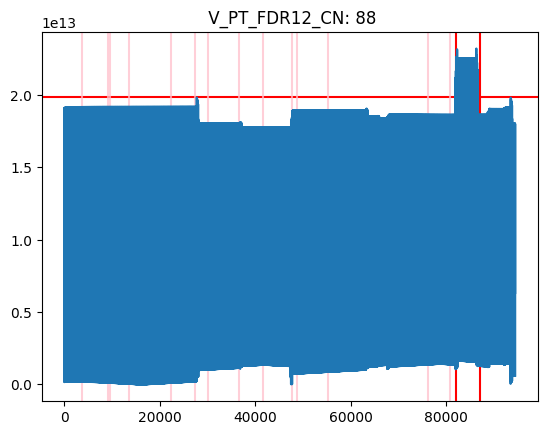

EDD = [11, 12, 13, 14, 15, 51, 52, 53, 54, 55, 91, 92, 93, 94, 95, 96, 131, 132, 133, 134, 135, 136, 171, 172, 173, 174, 175, 176, 210, 211, 212, 213, 214, 215, 216, 250, 251, 252, 253, 254, 255, 256, 290, 291, 292, 293, 294, 295, 296, 330, 331, 332, 333, 334, 335, 336, 351, 352, 353, 354, 355, 356, 371, 372, 373, 374, 375, 376, 391, 392, 393, 394, 395, 396, 411, 412, 413, 414, 415, 416, 431, 432, 433, 434, 435, 436, 451, 452, 453, 454, 455, 456, 471, 472, 473, 474, 475, 476, 491, 492, 493, 494, 495, 496, 511, 512, 513, 514, 515, 516, 531, 532, 533, 534, 535, 536, 551, 552, 553, 554, 555, 556, 571, 572, 573, 574, 575, 576, 591, 592, 593, 594, 595, 596, 611, 612, 613, 614, 615, 616, 631, 632, 633, 634, 635, 636, 651, 652, 653, 654, 655, 656, 671, 672, 673, 674, 675, 676, 691, 692, 693, 694, 695, 696, 711, 712, 713, 714, 715, 716, 731, 732, 733, 734, 735, 736, 751, 752, 753, 754, 755, 756, 771, 772, 773, 774, 775, 776, 791, 792, 793, 794, 795, 796, 811, 812, 813, 814, 815, 816, 831, 832,

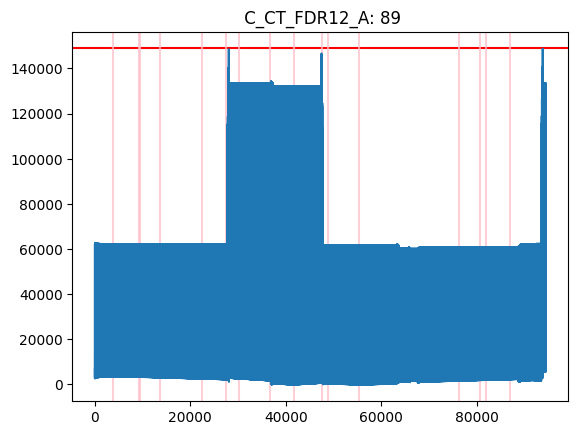

***********************************************************************************************
Sensor: 90  C_CT_FDR12_B, No Attacks


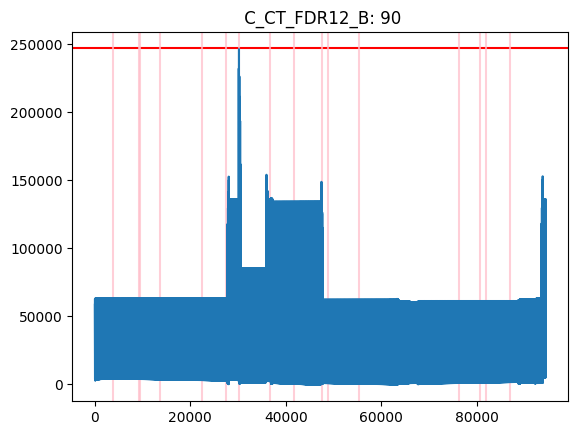

***********************************************************************************************
Sensor: 91  C_CT_FDR12_C, No Attacks


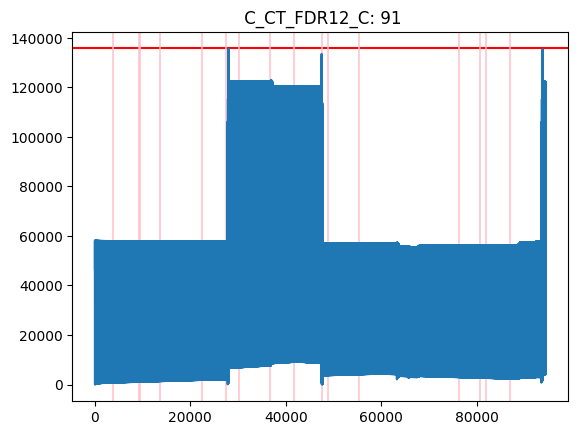

In [20]:

for index, i in enumerate(rsum_listc):
    print("***********************************************************************************************")
    attack_in = []
    for indices, j in enumerate(i):
      if j > thresholdsc[index]:
        attack_in += [indices]
    if len(attack_in) > 3:
      start = (df_test['Time'][attack_in[0]+1201+window+w-1])/1e6
      end = (df_test['Time'][attack_in[-1]+1201+window+w-1])/1e6
      a_type = ""
      if cols[things[index]-1][1] == "C":
        a_type = "CT_ratio"
      elif cols[things[index]-1][1] == "V":
        a_type = "PT_ratio"
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, Attack Type: {a_type}, Time Attacked: {start}s to {end}s")
      at_sensors += [things[index]]
      at_neighbor[things[index]] = attack_in
      atk = True
    else:
      atk = False
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, No Attacks")


    plt.title(f"{cols[things[index]-1]}: {things[index]}")
    plt.axhline(thresholdsc[index], color='red')


    if things[index] in attack_dict:
      attack_indices = df_test.index[(df_test['Time'] >= attack_dict[things[index]][0] * 1e6) & (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201
      for start, end in all_attack_indices:
        if attack_indices[0] == start:
          set_zero = np.zeros(len(data_test)-window-w+1)
          for indices, j in enumerate(i):
            if j > thresholdsc[index]:
              set_zero[indices]=1
          start_w = start-window-w
          end_w = end+window+w-1

          EDD = expectation_detection_delay(set_zero,start_w)
       
          plt.axvline(start_w, color='red')
          plt.axvline(end_w, color='red')
        else:
          start_w = start-window-w
          end_w = end+window+w-1
          plt.axvline(start_w, color='pink', alpha=0.75)
          plt.axvline(end_w, color='pink', alpha=0.75)
    else:
       for start, end in all_attack_indices:
          start_w = start-window-w
          end_w = end+window+w-1
          plt.axvline(start_w, color='pink', alpha=0.75)
          plt.axvline(end_w, color='pink', alpha=0.75)
    
    plt.plot(i)
    plt.show()
    if atk:
      print(f"EDD = {EDD}")

In [21]:
at_sensors

[5,
 12,
 19,
 26,
 36,
 37,
 38,
 44,
 45,
 46,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 5,
 12,
 19,
 26,
 52,
 53,
 54,
 58,
 59,
 60,
 61,
 62,
 64,
 68,
 70,
 71,
 72,
 73,
 76,
 77,
 78,
 79,
 80,
 82,
 86,
 87,
 88]

In [22]:
order_attack = ['CT', 'Vphase', 'Cphase', 'GPS', 'GPS', 'CT', 'PT']

In [23]:
hops = {}
types = 1.1
for key, value in attack_dict.items():
  if types == value[0]:
    if value[1] not in hops:
      hops[value[1]]= [key]
    else:
      hops[value[1]] += [key]
  else:
    types = value[0]
    hops[value[1]]= [key]

In [24]:
stu = []
for i in hops:
  stu += [i]

In [25]:
hops

{2.1: [52, 53, 54, 55],
 3.0: [56, 57, 58],
 5.9: [5],
 7.8: [66],
 10.1: [68, 69, 70, 71, 72, 73],
 11.7: [36, 37, 38, 39],
 17.0: [77, 78, 79],
 18.3: [86, 87, 88]}

In [26]:
stu

[2.1, 3.0, 5.9, 7.8, 10.1, 11.7, 17.0, 18.3]

In [27]:
hops[5.9]

[5]

In [28]:
at_sensors

[5,
 12,
 19,
 26,
 36,
 37,
 38,
 44,
 45,
 46,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 5,
 12,
 19,
 26,
 52,
 53,
 54,
 58,
 59,
 60,
 61,
 62,
 64,
 68,
 70,
 71,
 72,
 73,
 76,
 77,
 78,
 79,
 80,
 82,
 86,
 87,
 88]

In [29]:
for i in at_neighbor:
  print(i)

5
12
19
26
36
37
38
44
45
46
52
53
54
56
57
58
59
60
61
62
66
68
69
70
71
72
73
74
75
76
81
83
84
85
86
87
88
64
77
78
79
80
82


In [30]:
all_attack_indices

{(4080, 8879),
 (9840, 13199),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)}

In [31]:
all_attack_times

{(1.1, 2.1),
 (2.3, 3.0),
 (5.0, 5.9),
 (6.6, 7.8),
 (9.0, 10.1),
 (10.5, 11.7),
 (16.2, 17.0),
 (17.4, 18.3)}

In [32]:
all_attack_indice = []
for i in all_attack_indices:
  all_attack_indice += [i]
sorted(all_attack_indice)

[(4080, 8879),
 (9840, 13199),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)]

In [33]:
all_attack_indice.remove((9840, 13199))
    
all_attack_indice

[(4080, 8879),
 (30480, 36239),
 (82320, 86639),
 (76560, 80399),
 (49200, 54959),
 (22800, 27119),
 (42000, 47279)]

In [34]:
stu.remove(3.0)

In [35]:
n = 0
for start, end in sorted(all_attack_indice):
  attack_list = []
  print("***********************************************************************************************")
  print(f'For the {order_attack[n]} attack starting at index: {start} and ending at index: {end}')

  for key, values in at_neighbor.items():
    for i in values:
      if i+350 > start and i+350 < end:
        if key not in attack_list:
          attack_list += [key]
  print(f'These were the sensors that were detected inside that particular attack interval: {attack_list}')
  for atta in attack_list:
    hop = []
    for j in hops[stu[n]]:
      if j not in emptyr:
        hop += [j]
        hop += adj_list[j]
      else:
        hop +=[j]
    if atta in hop:
      print(f'Attacked has been detected at sensor: {atta}')
    else:
      print(f'{atta} is a False Positive')
  if len(attack_list) > 0:
    print(f'This is the 1-hop neighborhood that we are interested in {sorted(hop)}')
  n += 1

***********************************************************************************************
For the CT attack starting at index: 4080 and ending at index: 8879
These were the sensors that were detected inside that particular attack interval: [52, 53, 54]
Attacked has been detected at sensor: 52
Attacked has been detected at sensor: 53
Attacked has been detected at sensor: 54
This is the 1-hop neighborhood that we are interested in [15, 16, 17, 44, 45, 46, 48, 49, 50, 52, 53, 54, 55, 59, 60, 61]
***********************************************************************************************
For the Vphase attack starting at index: 22800 and ending at index: 27119
These were the sensors that were detected inside that particular attack interval: [5, 12, 19, 26, 62]
Attacked has been detected at sensor: 5
Attacked has been detected at sensor: 12
Attacked has been detected at sensor: 19
Attacked has been detected at sensor: 26
Attacked has been detected at sensor: 62
This is the 1-hop ne

In [36]:
all_attack_indice

[(4080, 8879),
 (30480, 36239),
 (82320, 86639),
 (76560, 80399),
 (49200, 54959),
 (22800, 27119),
 (42000, 47279)]

In [37]:
FPR = []
for sensor, ind in at_neighbor.items():
  for i in ind:
    x = i
    if (x > 4080-350 and x< 8879+350) or (x>30480-350 and x<36239+350) or (x>82320-350 and x<86639+350) or (x>76560-350 and x<80399+350) or (x>49200-350 and x<54959+350) or (x>22800-350 and x<27119+350) or (x>42000-350 and x<47279+350):
      continue
    else:
      print(i)
      print(sensor)
      FPR += [(sensor,i)]


93512
26
48849
36
48850
36
11662
37
21543
37
39375
37
39926
37
40225
37
48067
37
48849
37
48850
37
62931
37
63195
37
63893
37
92257
37
48849
38
48850
38
61649
38
89013
38
92595
38
92677
38
39
45
40
45
41
45
119
45
120
45
121
45
199
45
200
45
201
45
279
45
280
45
281
45
359
45
360
45
361
45
439
45
440
45
441
45
519
45
520
45
521
45
599
45
600
45
601
45
680
45
760
45
840
45
920
45
1000
45
92076
52
92063
53
89030
54
92415
56
92401
57
92059
60
47788
62
92428
68
92401
69
92059
72
92401
75
27802
76
27750
83
27751
83
27752
83
27753
83
27754
83
27755
83
27756
83
27757
83
27758
83
27759
83
27760
83
27761
83
27790
83
27791
83
27792
83
27793
83
27794
83
27795
83
27796
83
27797
83
27798
83
27832
83
27833
83
27834
83
93511
83
93512
83
93513
83
93514
83
93515
83
93516
83
93517
83
93518
83
93519
83
93520
83
93521
83
93522
83
93551
83
93552
83
93553
83
93554
83
93555
83
93556
83
93557
83
93558
83
93559
83
93593
83
93594
83
27729
85
27730
85
27731
85
27732
85
27733
85
27734
85
27735
85
27736
85
27763
8

In [38]:
len(FPR)

163

In [39]:
157*208

32656

In [40]:
at = [62, 64, 80, 82, 86, 87, 88]+[59, 60, 61, 71, 72, 73, 77, 78, 79]+[5, 12, 19, 26, 62]+[52, 53, 54]+[58, 68, 70, 76]
len(at)

28

In [41]:
at_neighbor[37]

[11662,
 21543,
 39375,
 39926,
 40225,
 46113,
 48067,
 48849,
 48850,
 48851,
 48852,
 48853,
 48854,
 48855,
 48856,
 48857,
 48858,
 48859,
 48860,
 48861,
 48862,
 48863,
 48864,
 48865,
 48866,
 48867,
 48868,
 48869,
 48870,
 48876,
 48877,
 48878,
 48879,
 48880,
 48881,
 48882,
 48883,
 48884,
 48885,
 48886,
 48887,
 48888,
 48889,
 48890,
 48891,
 48892,
 48893,
 48894,
 48895,
 48896,
 48897,
 48898,
 48899,
 48900,
 48901,
 48902,
 48903,
 48904,
 48905,
 48906,
 48907,
 48908,
 48909,
 48918,
 48919,
 48920,
 48921,
 48922,
 48923,
 48924,
 48925,
 48926,
 48927,
 48928,
 48929,
 48930,
 48931,
 48932,
 48933,
 48934,
 48935,
 48936,
 48937,
 48938,
 48939,
 48940,
 48941,
 48942,
 48943,
 48944,
 48945,
 48946,
 48947,
 48948,
 48949,
 48959,
 48960,
 48961,
 48962,
 48963,
 48964,
 48965,
 48966,
 48967,
 48968,
 48969,
 48970,
 48971,
 48972,
 48973,
 48974,
 48975,
 48976,
 48977,
 48978,
 48979,
 48980,
 48981,
 48982,
 48983,
 48984,
 48985,
 48986,
 48987,
 48988,


In [42]:
at_sensors

[5,
 12,
 19,
 26,
 36,
 37,
 38,
 44,
 45,
 46,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 5,
 12,
 19,
 26,
 52,
 53,
 54,
 58,
 59,
 60,
 61,
 62,
 64,
 68,
 70,
 71,
 72,
 73,
 76,
 77,
 78,
 79,
 80,
 82,
 86,
 87,
 88]

In [43]:
neighbors = []
for i in attack_dict:
  neighbors += [i]
  if i not in [55,39]:
    for j in adj_list[i]:
      neighbors += [j]

In [44]:
for i in at_sensors:
  if i in neighbors:
    print("Yes")
  else:
    print("Fail")
  

Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Fail
Yes
Fail
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


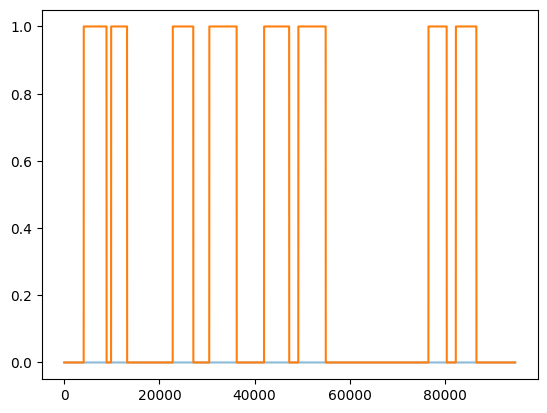

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE5_A :0 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


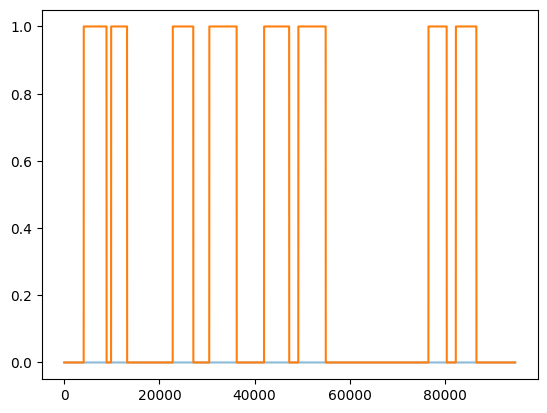

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE5_B :1 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


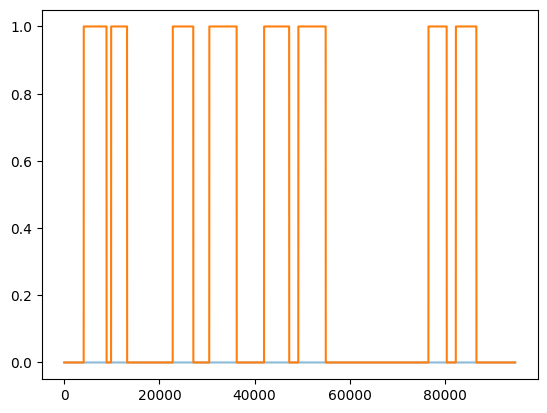

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE5_C :2 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


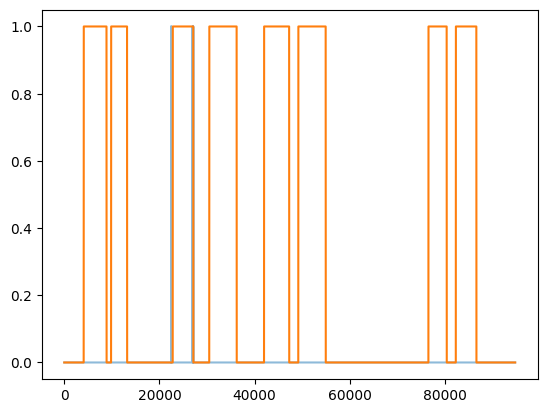

 V_PTWE4_AN :4 has accuracy = 0.6061283687569221, precision = 0.941747572815534, recall = 0.002591365676426587, ARL = 2667.214285714286 and f1 = 0.005168509391234847


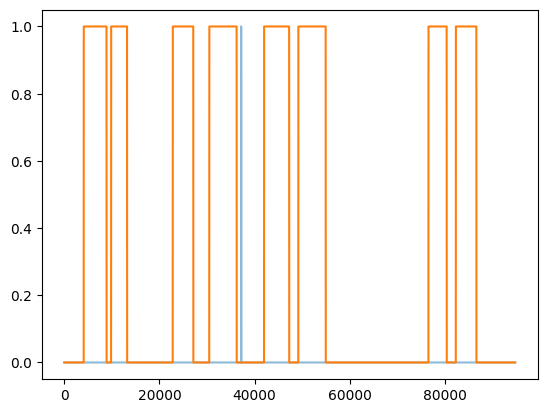

 V_PTWE4_BN :5 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


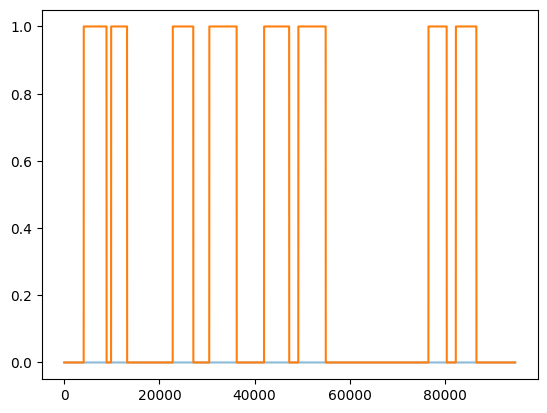

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE4_CN :6 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


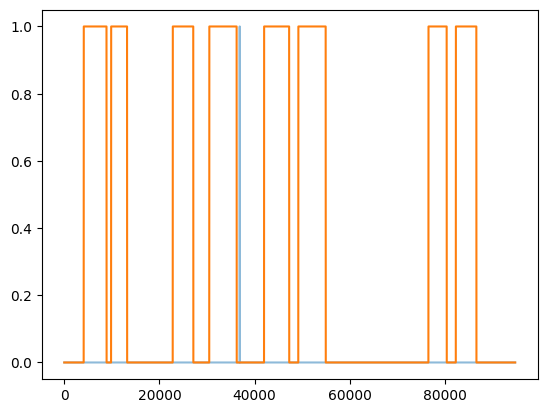

 C_CTWE1_A :7 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


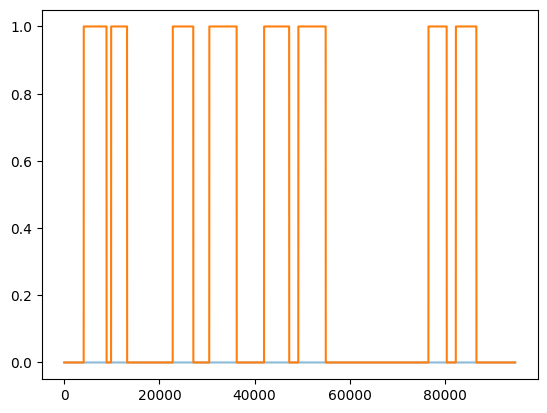

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE1_B :8 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


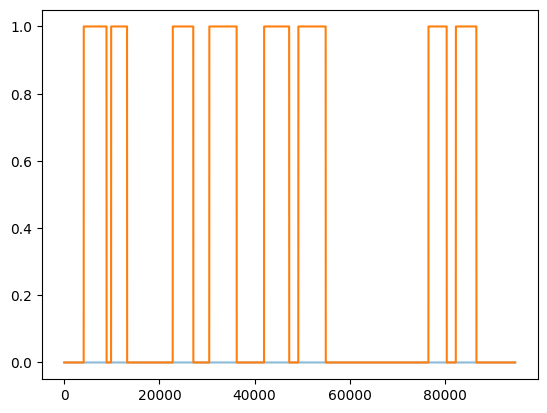

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE1_C :9 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


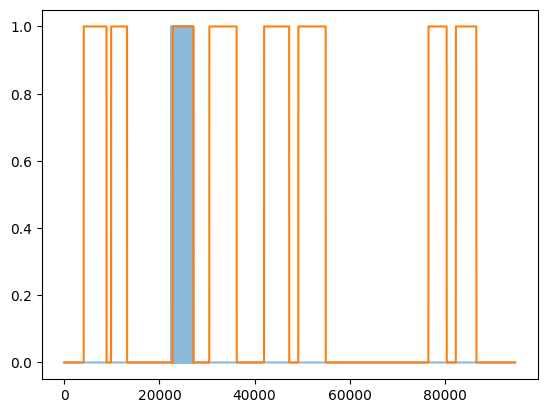

 V_PTWE1_AN :11 has accuracy = 0.6218237434734455, precision = 0.9707811568276684, recall = 0.04349219918786065, ARL = 286.824 and f1 = 0.08325449385052033


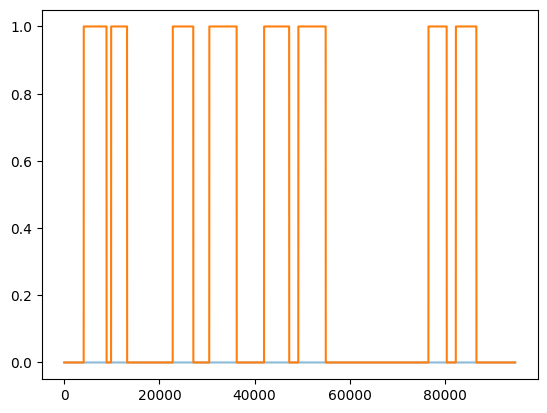

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE1_BN :12 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


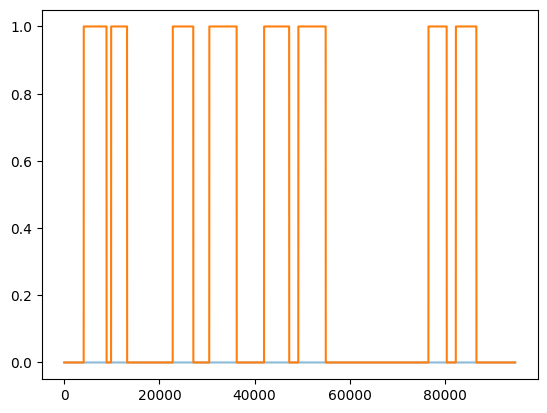

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE1_CN :13 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


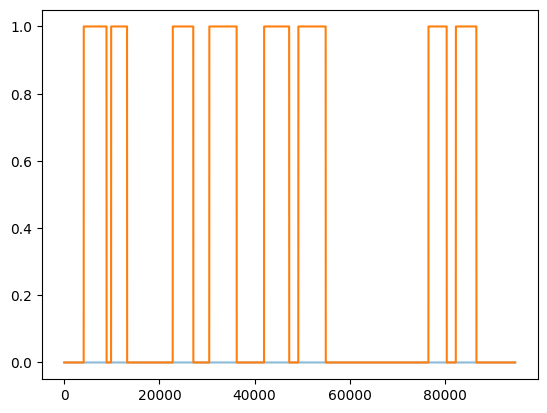

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE9_A :14 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


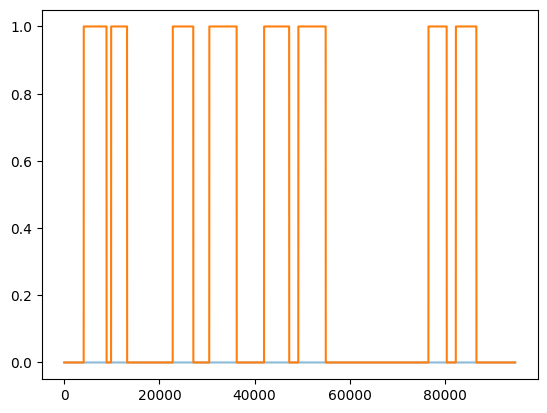

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE9_B :15 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


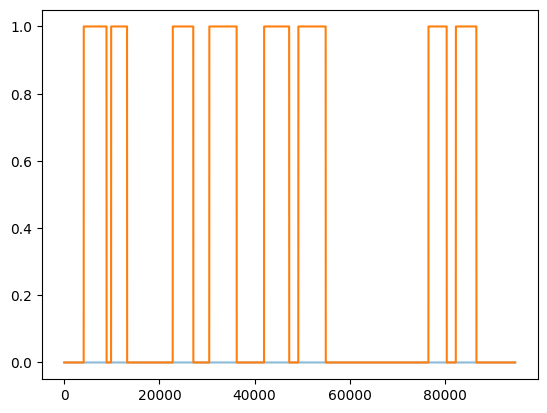

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE9_C :16 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


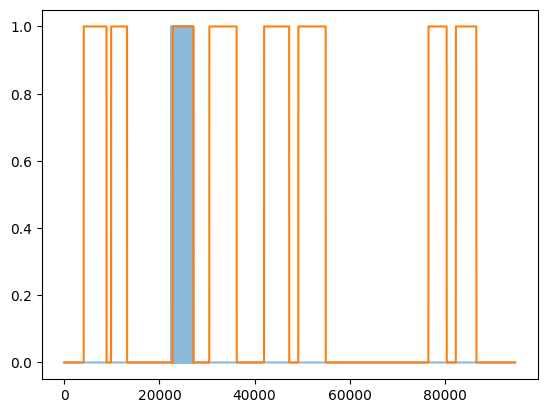

 V_PTWE3_AN :18 has accuracy = 0.6218237434734455, precision = 0.9707811568276684, recall = 0.04349219918786065, ARL = 286.824 and f1 = 0.08325449385052033


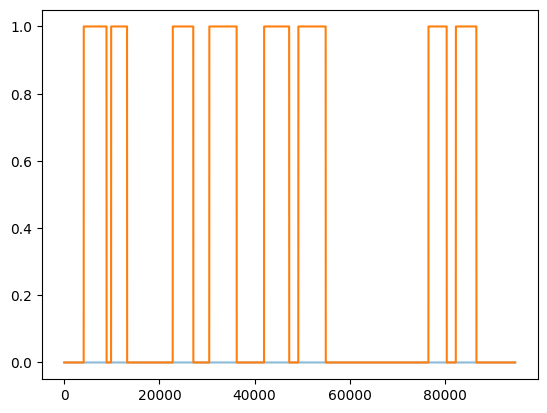

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE3_BN :19 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


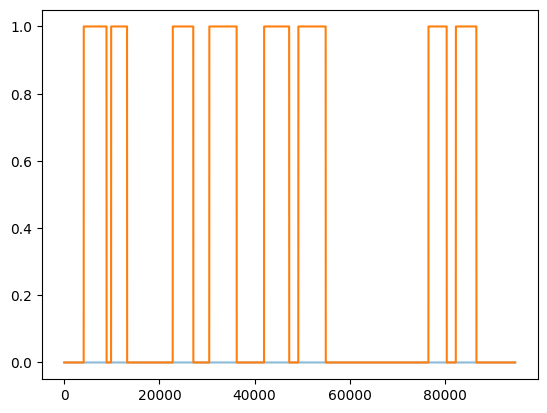

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE3_CN :20 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


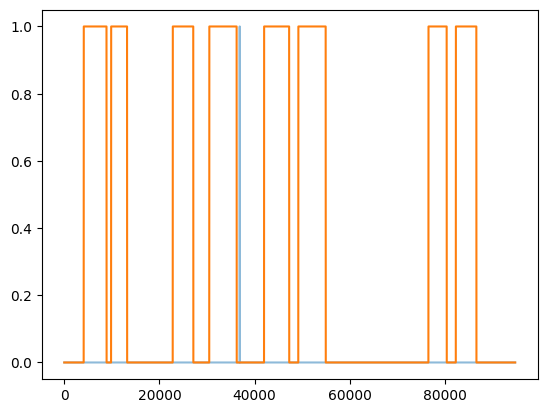

 C_CTWE3_A :21 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


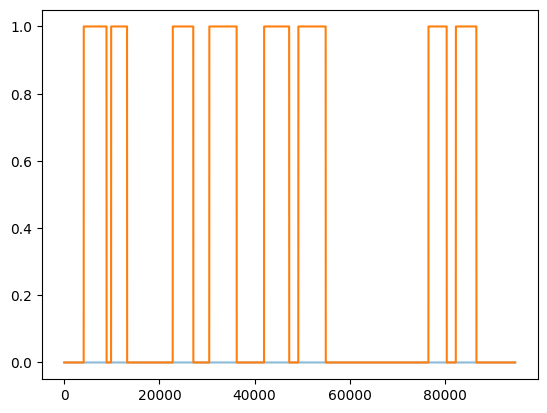

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE3_B :22 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


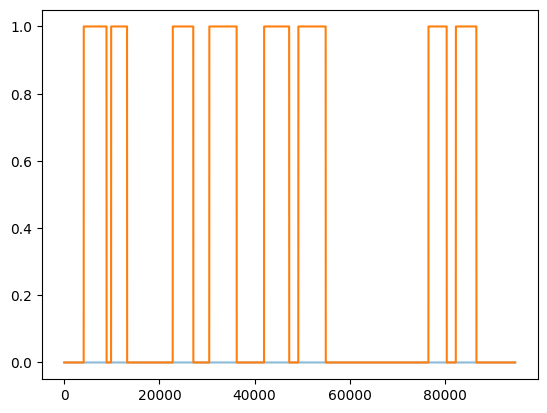

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE3_C :23 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


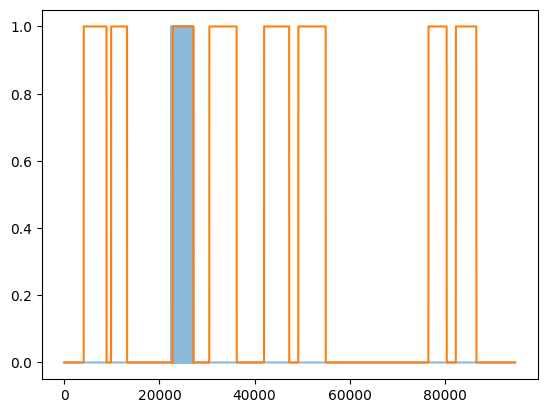

 V_PTWE2_AN :25 has accuracy = 0.6218237434734455, precision = 0.9707811568276684, recall = 0.04349219918786065, ARL = 286.824 and f1 = 0.08325449385052033


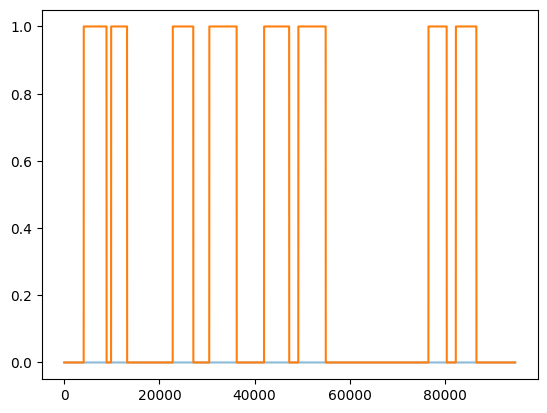

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE2_BN :26 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


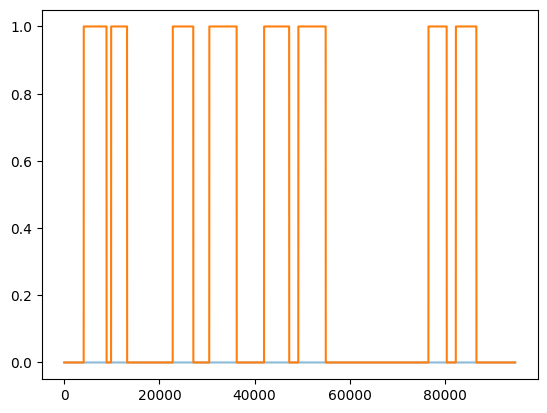

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE2_CN :27 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


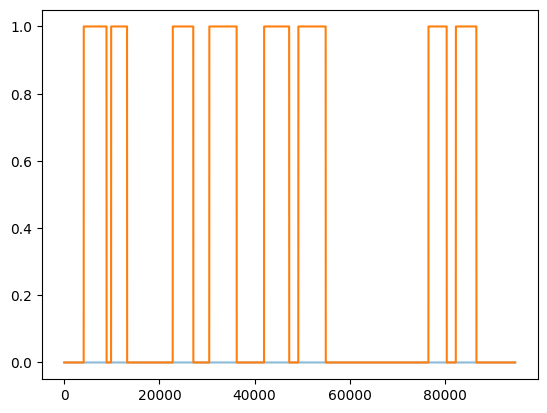

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE7_A :28 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


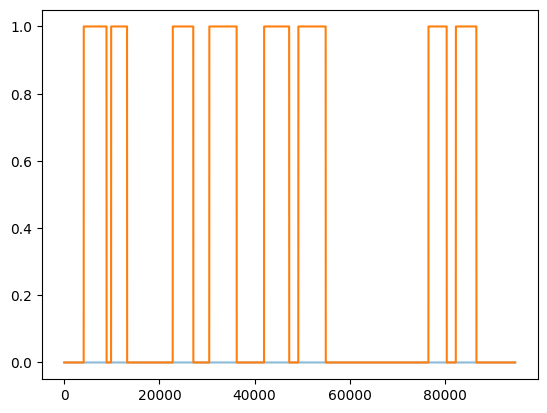

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE7_B :29 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


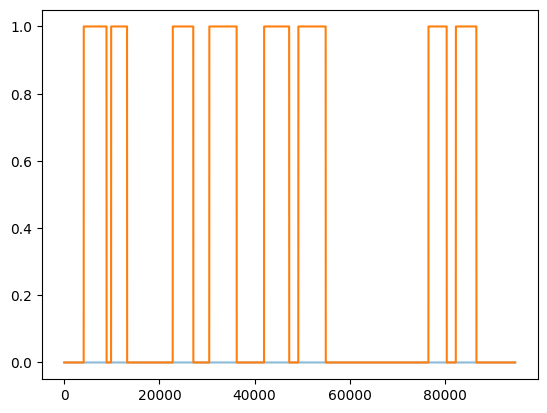

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE7_C :30 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


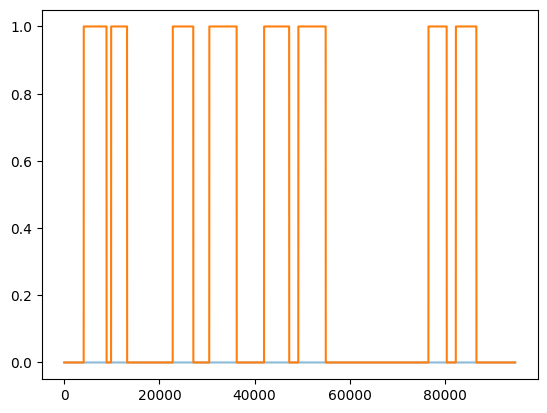

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE5_AN :32 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


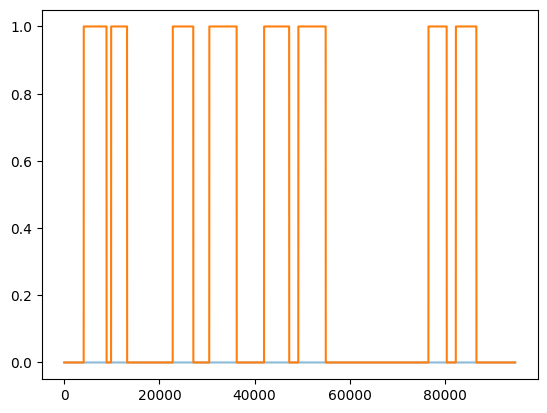

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE5_BN :33 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


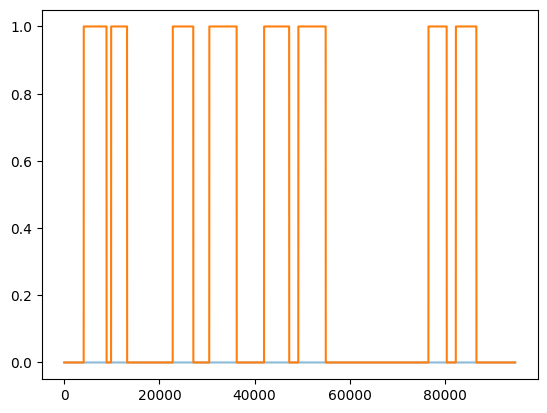

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PTWE5_CN :34 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


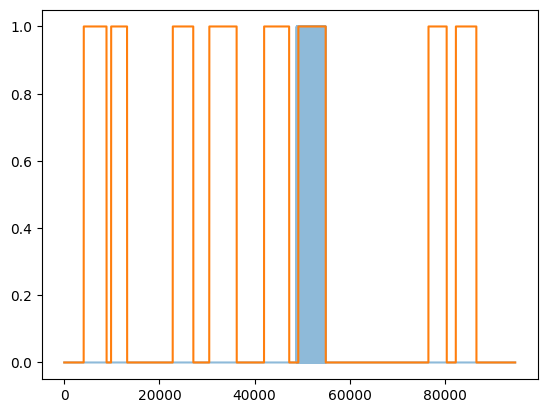

 C_CTWE2_A :35 has accuracy = 0.6315806128368757, precision = 0.9126565589980224, recall = 0.07397413977345586, ARL = 216.944099378882 and f1 = 0.13685563188849897


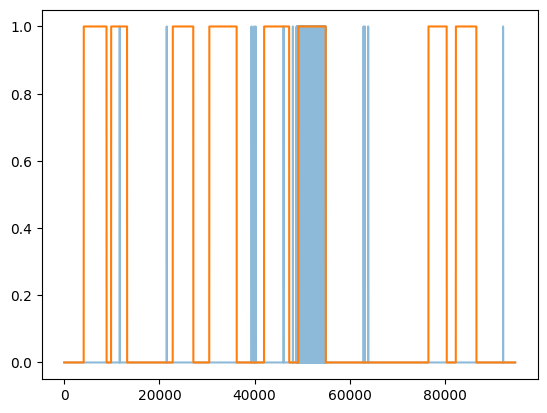

 C_CTWE2_B :36 has accuracy = 0.6316017087706345, precision = 0.9127140974967062, recall = 0.07402756999358838, ARL = 203.0581395348837 and f1 = 0.1369477117722645


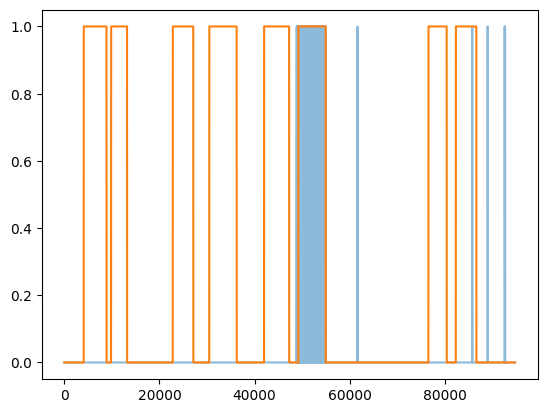

 C_CTWE2_C :37 has accuracy = 0.6316228047043932, precision = 0.911957950065703, recall = 0.07416114554391964, ARL = 210.3855421686747 and f1 = 0.13716770431860856


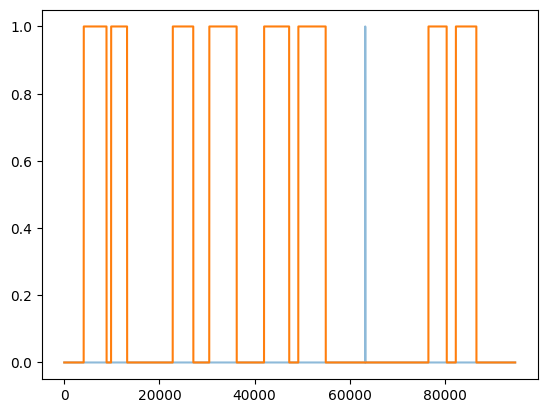

 C_CTWE4_A :39 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


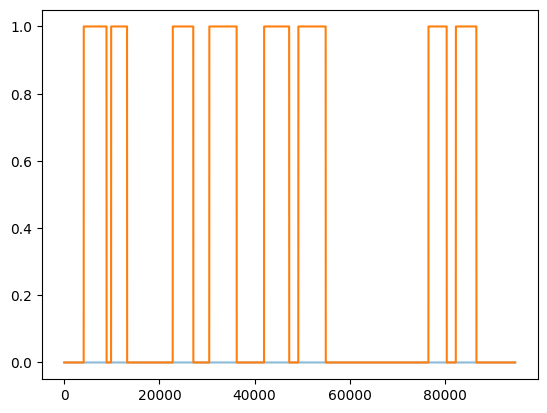

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE4_B :40 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


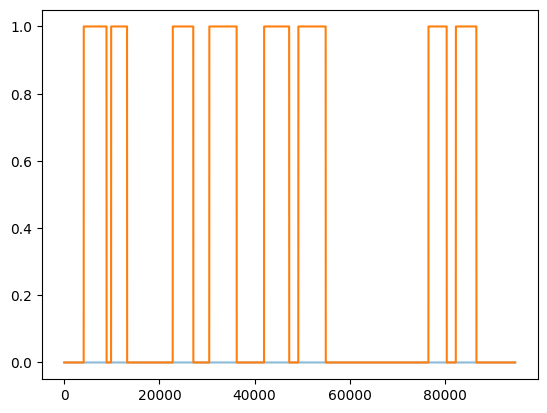

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE4_C :41 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


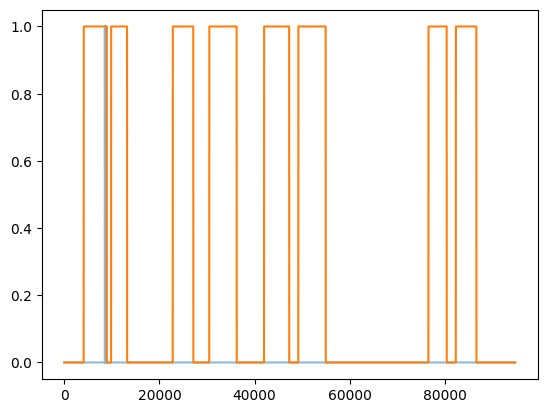

 C_CTWE6_A :43 has accuracy = 0.6057169980486261, precision = 1.0, recall = 0.0013891857234451805, ARL = 2198.823529411765 and f1 = 0.002774517127307651


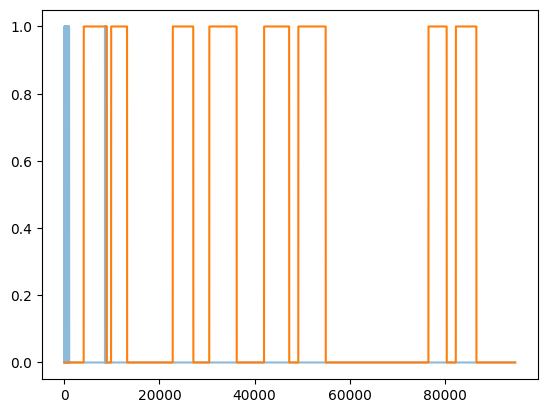

 C_CTWE6_B :44 has accuracy = 0.6053689151416064, precision = 0.6233766233766234, recall = 0.0012823252831801668, ARL = 1247.1 and f1 = 0.0025593857474206193


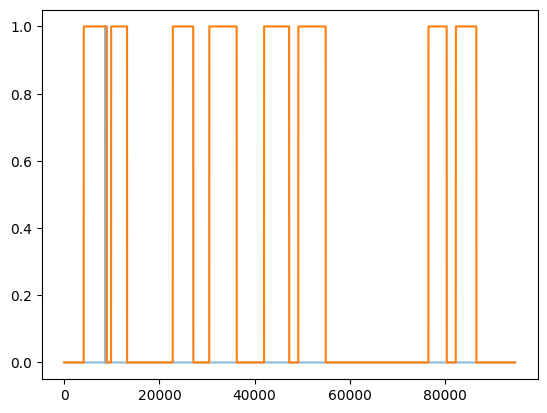

 C_CTWE6_C :45 has accuracy = 0.6056431622804704, precision = 1.0, recall = 0.0012021799529814063, ARL = 2336.6875 and f1 = 0.0024014729033807404


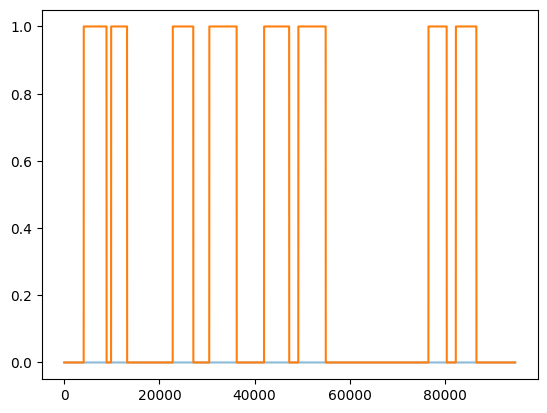

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CTWE10_A :47 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


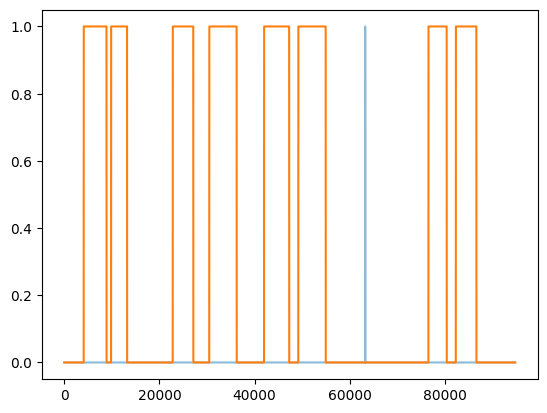

 C_CTWE10_B :48 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


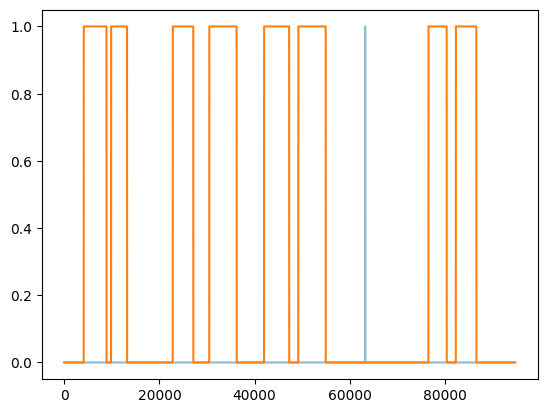

 C_CTWE10_C :49 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


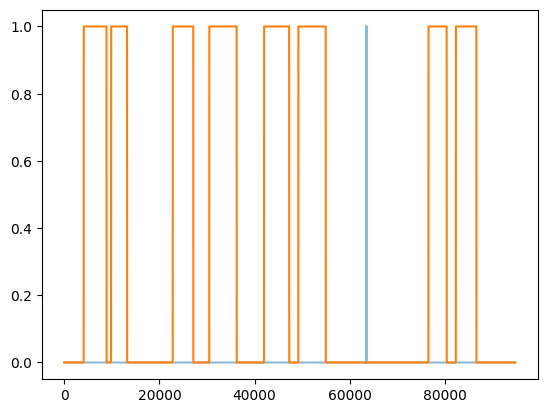

 C_CTWE8_A :51 has accuracy = 0.6049259005326724, precision = 0.0, recall = 0.0, ARL = 2881.153846153846 and f1 = 0.0


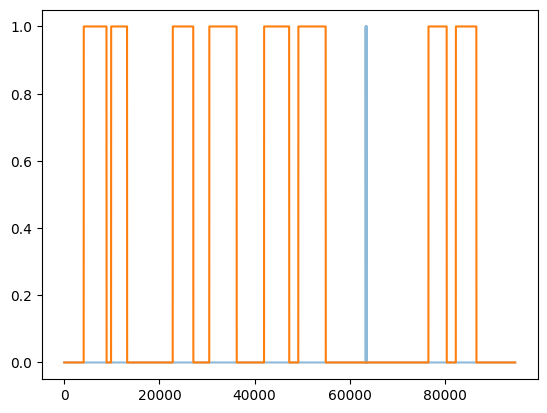

 C_CTWE8_B :52 has accuracy = 0.6048415167976372, precision = 0.0, recall = 0.0, ARL = 2675.9285714285716 and f1 = 0.0


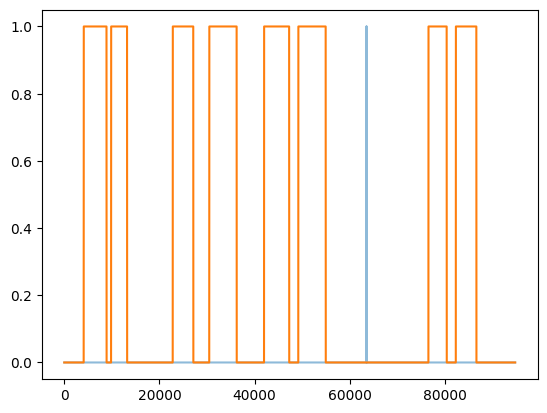

 C_CTWE8_C :53 has accuracy = 0.6050841200358631, precision = 0.0, recall = 0.0, ARL = 3744.0 and f1 = 0.0


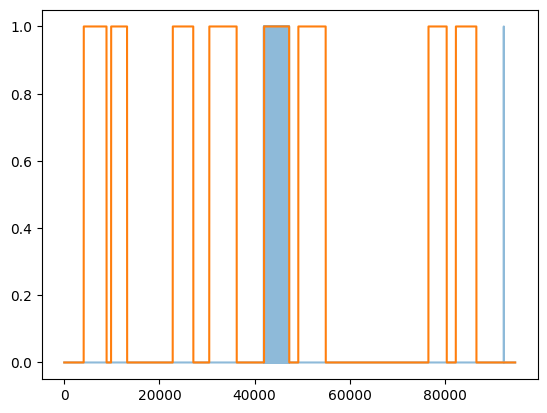

 V_PT_DIST1_AN :55 has accuracy = 0.6249775855703813, precision = 0.9973516949152542, recall = 0.05030455225475529, ARL = 250.38028169014083 and f1 = 0.09577822990844354


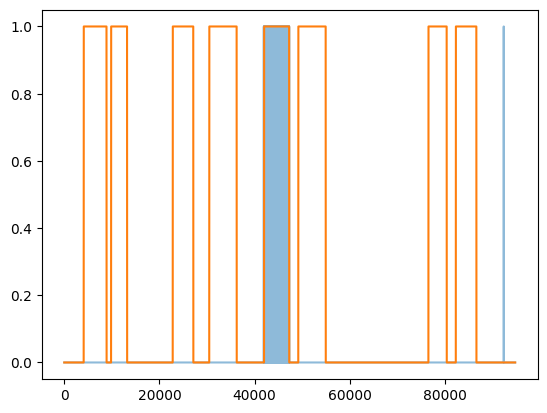

 V_PT_DIST1_BN :56 has accuracy = 0.62482991403407, precision = 0.9936440677966102, recall = 0.050117546484291516, ARL = 248.72727272727272 and f1 = 0.09542217700915566


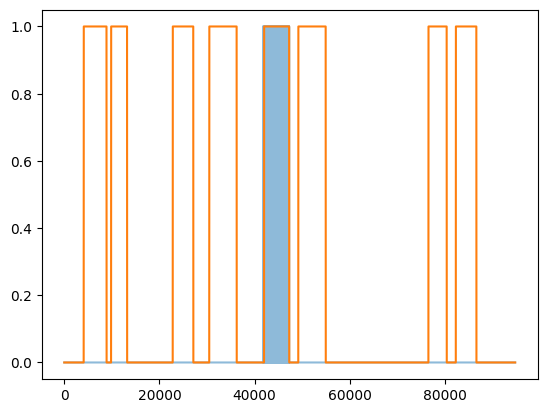

 V_PT_DIST1_CN :57 has accuracy = 0.6262960814303044, precision = 0.98451862602806, recall = 0.054365248984825816, ARL = 244.33793103448275 and f1 = 0.10304058330590647


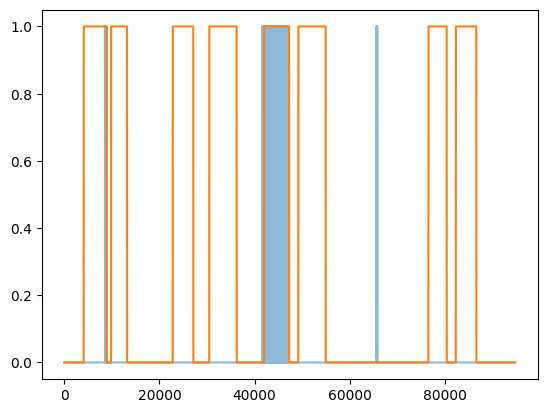

 C_CT_DIST1_A :58 has accuracy = 0.6112757765940615, precision = 0.8982118294360385, recall = 0.017444966873263516, ARL = 240.86928104575162 and f1 = 0.03422521554548075


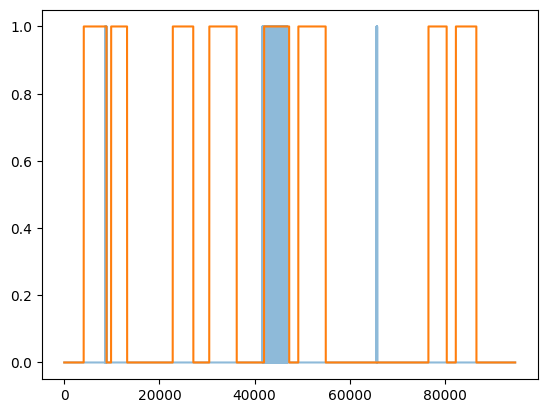

 C_CT_DIST1_B :59 has accuracy = 0.6111386530246296, precision = 0.8941504178272981, recall = 0.01715110066253473, ARL = 242.53947368421052 and f1 = 0.03365661861074705


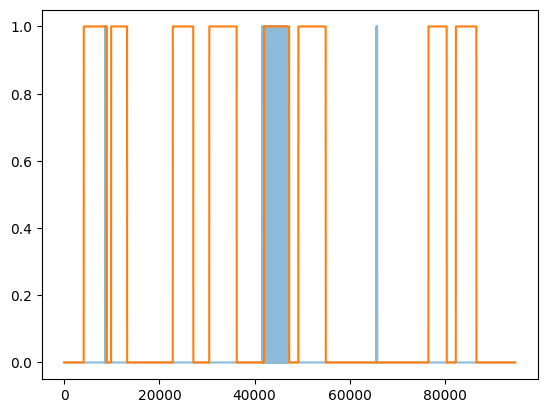

 C_CT_DIST1_C :60 has accuracy = 0.612636464321502, precision = 0.919431279620853, recall = 0.020730925411412696, ARL = 240.0261437908497 and f1 = 0.0405476016302644


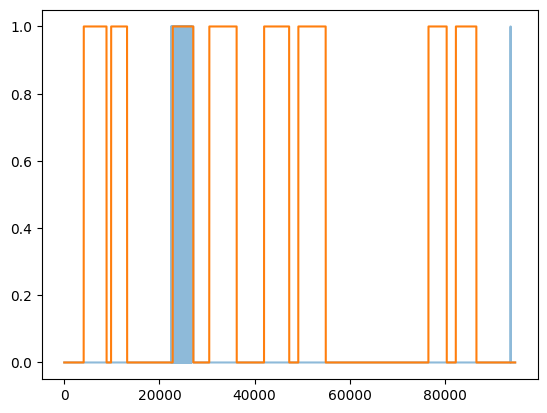

 V_PT_DIST2_AN :61 has accuracy = 0.6280786878329202, precision = 0.974235807860262, recall = 0.0596014105578115, ARL = 301.36752136752136 and f1 = 0.11233069835355722


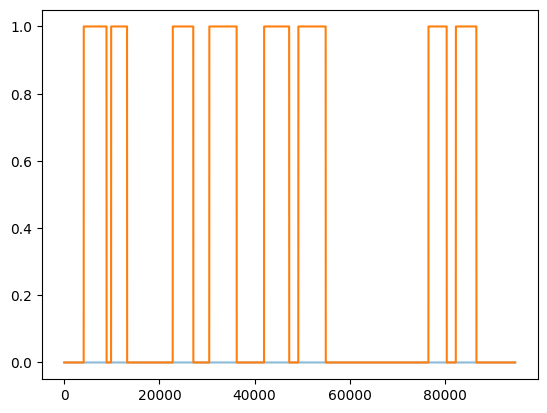

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 V_PT_DIST2_BN :62 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


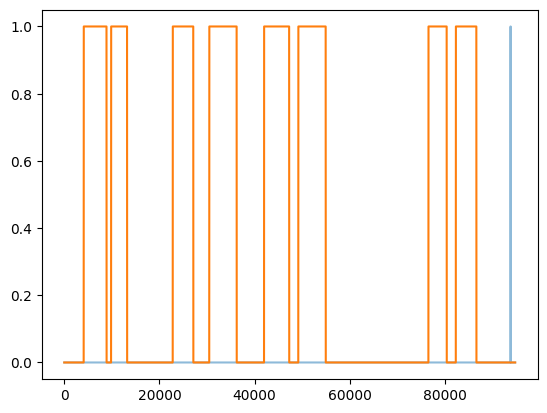

 V_PT_DIST2_CN :63 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


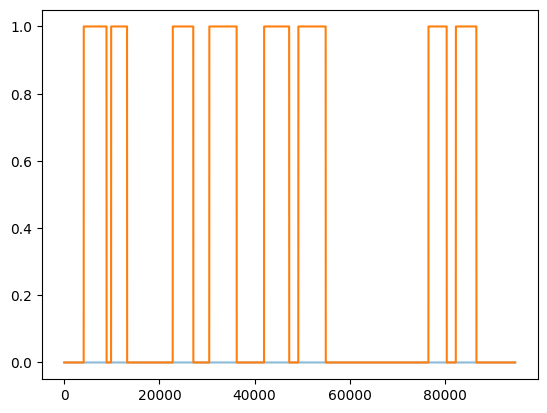

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_DIST2_A :64 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


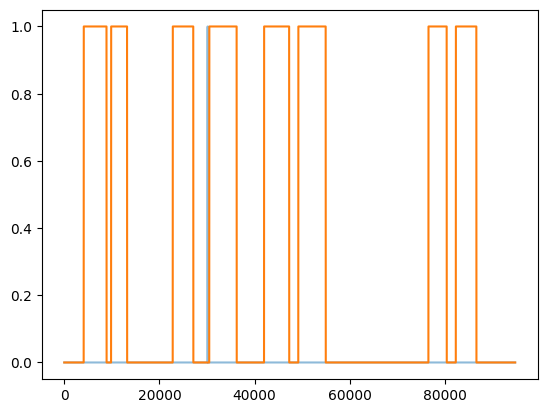

 C_CT_DIST2_B :65 has accuracy = 0.6051157639365012, precision = 0.0, recall = 0.0, ARL = 4159.666666666667 and f1 = 0.0


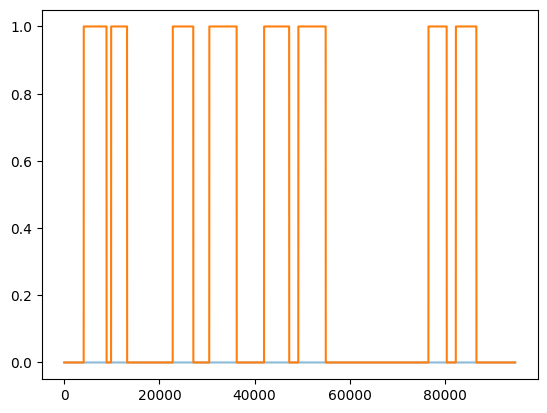

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_DIST2_C :66 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


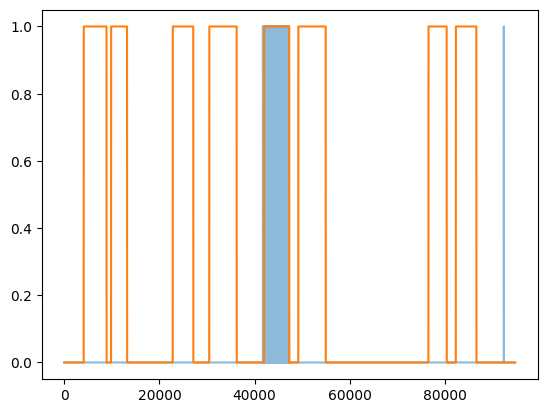

 V_PT_FDR3_AN :67 has accuracy = 0.6318337640419809, precision = 0.9798785117691724, recall = 0.06895169908100021, ARL = 237.4421768707483 and f1 = 0.12883741825987122


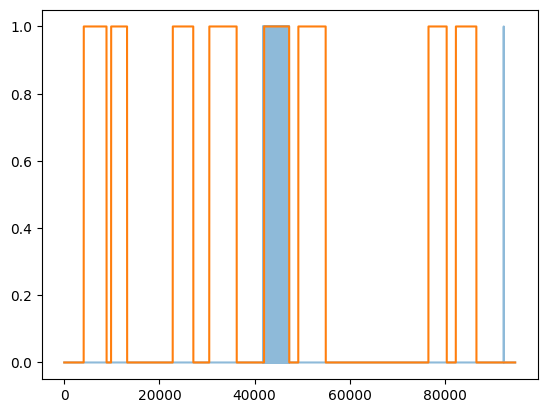

 V_PT_FDR3_BN :68 has accuracy = 0.6303675966457465, precision = 0.9791415964701163, recall = 0.06521158367172472, ARL = 238.3877551020408 and f1 = 0.12227927363807138


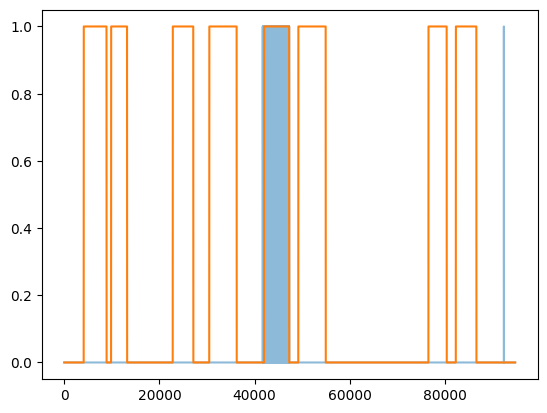

 V_PT_FDR3_CN :69 has accuracy = 0.6317704762407046, precision = 0.9744168547780286, recall = 0.0691921350715965, ARL = 237.48299319727892 and f1 = 0.12920927912197555


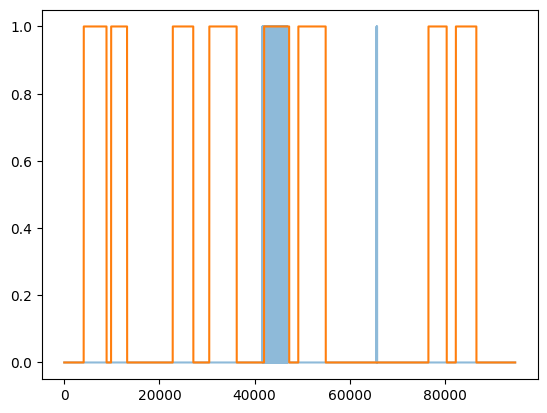

 C_CT_FDR3_A :70 has accuracy = 0.6166024998681504, precision = 0.8938953488372093, recall = 0.03285958538149177, ARL = 254.1818181818182 and f1 = 0.06338899196042054


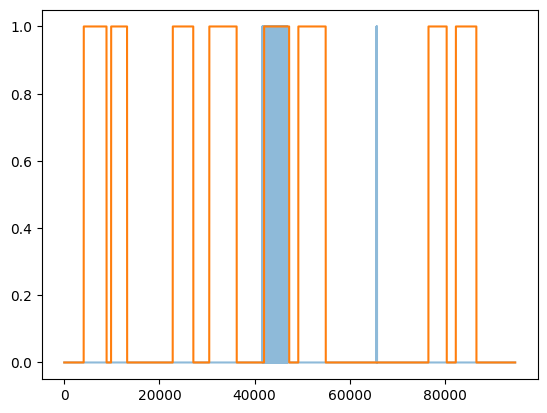

 C_CT_FDR3_B :71 has accuracy = 0.6166024998681504, precision = 0.8938953488372093, recall = 0.03285958538149177, ARL = 254.1818181818182 and f1 = 0.06338899196042054


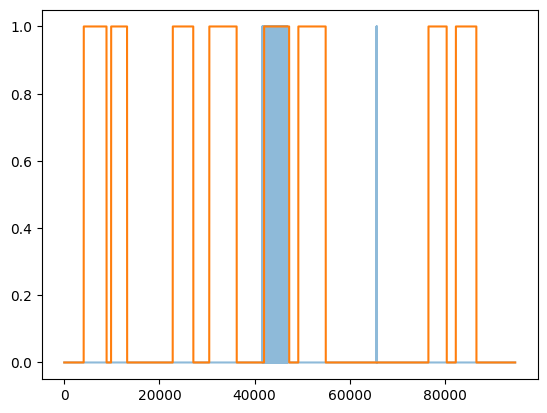

 C_CT_FDR3_C :72 has accuracy = 0.6167501714044618, precision = 0.8989825581395349, recall = 0.033046591151955546, ARL = 250.57931034482758 and f1 = 0.0637497423211709


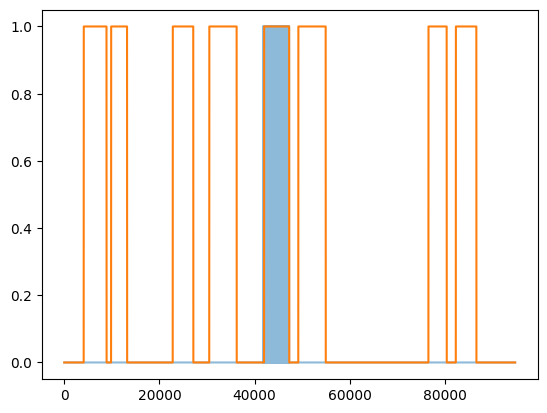

 V_PT_FDR1_AN :73 has accuracy = 0.6291651284214967, precision = 0.9838366652488303, recall = 0.06179204958324428, ARL = 242.46206896551723 and f1 = 0.11628082346731014


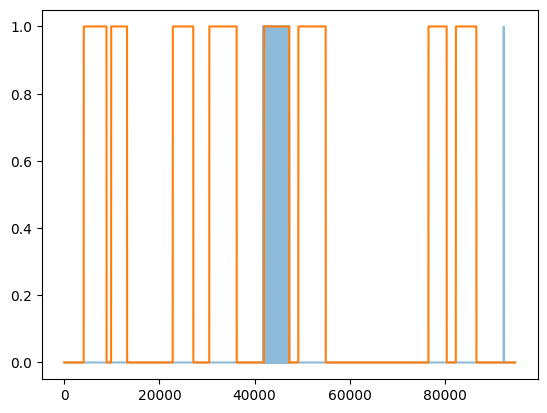

 V_PT_FDR1_BN :74 has accuracy = 0.6290280048520648, precision = 0.9833333333333333, recall = 0.061471468262449244, ARL = 240.8904109589041 and f1 = 0.11570954440309766


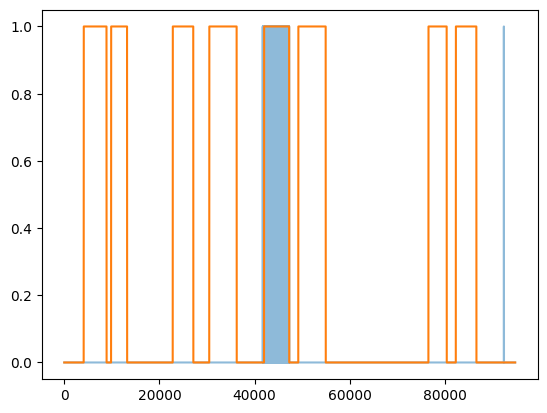

 V_PT_FDR1_CN :75 has accuracy = 0.6303992405463846, precision = 0.9764940239043824, recall = 0.06547873477238726, ARL = 238.3673469387755 and f1 = 0.1227279555355265


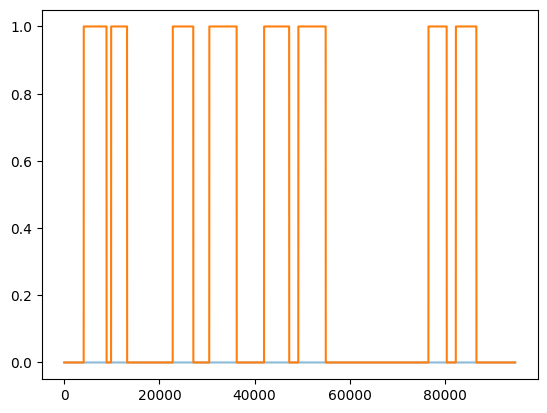

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR1_A :76 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


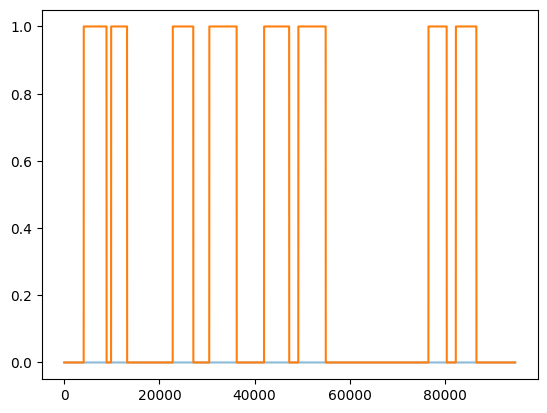

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR1_B :77 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


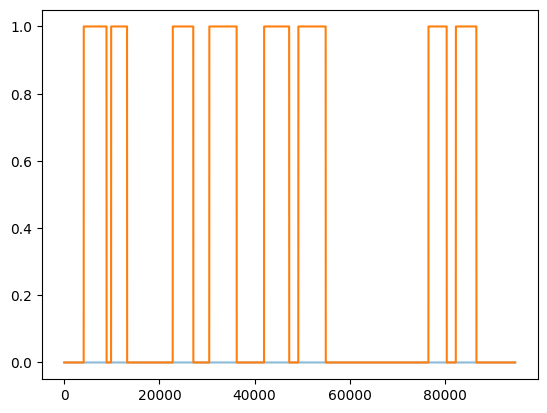

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR1_C :78 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


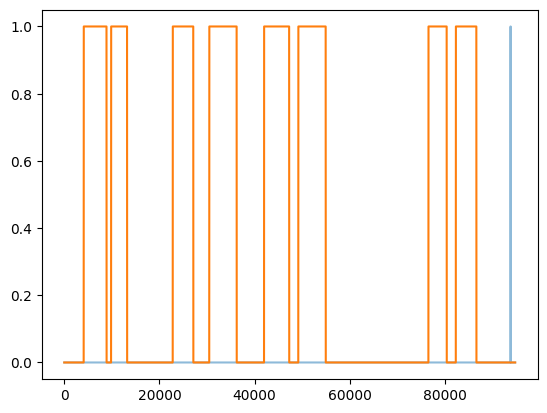

 V_PT_FDR32_AN :79 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


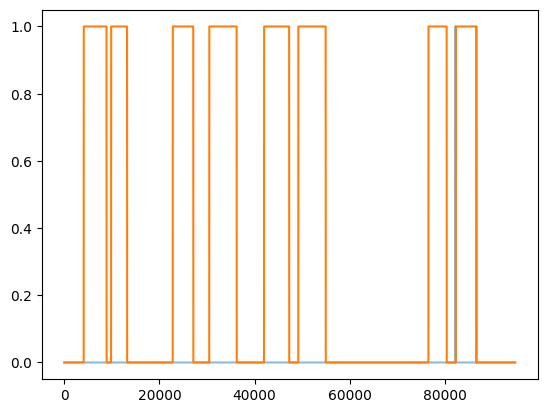

 V_PT_FDR32_BN :80 has accuracy = 0.6050946680027425, precision = 0.34782608695652173, recall = 0.00021372088053002778, ARL = 3403.5454545454545 and f1 = 0.0004271792818048324


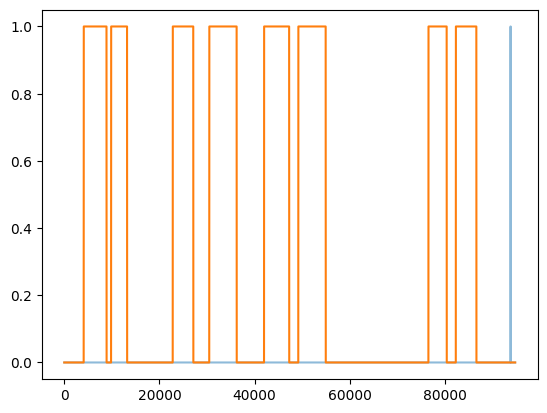

 V_PT_FDR32_CN :81 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


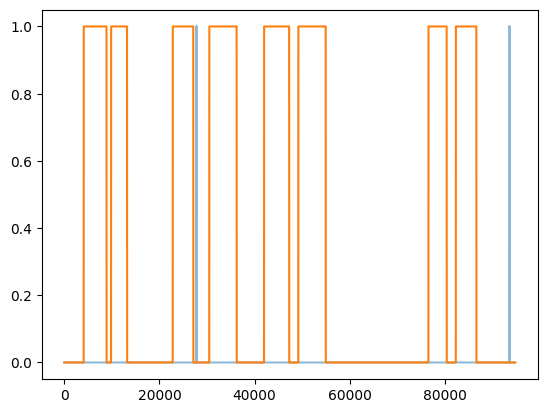

 C_CT_FDR32_A :82 has accuracy = 0.6046727493275671, precision = 0.0, recall = 0.0, ARL = 2677.0714285714284 and f1 = 0.0


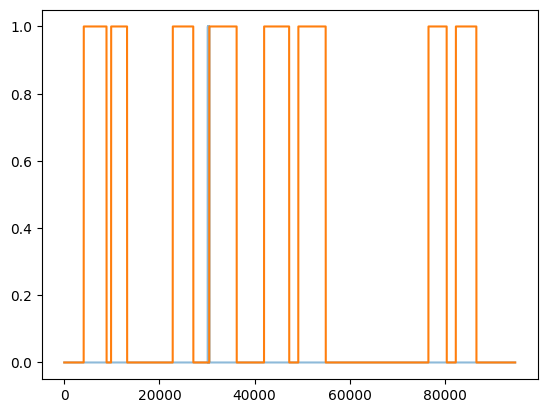

 C_CT_FDR32_B :83 has accuracy = 0.6044195981224619, precision = 0.0, recall = 0.0, ARL = 2343.9375 and f1 = 0.0


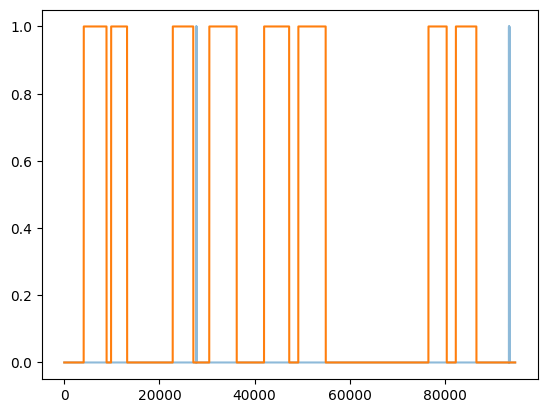

 C_CT_FDR32_C :84 has accuracy = 0.6046622013606877, precision = 0.0, recall = 0.0, ARL = 2677.1428571428573 and f1 = 0.0


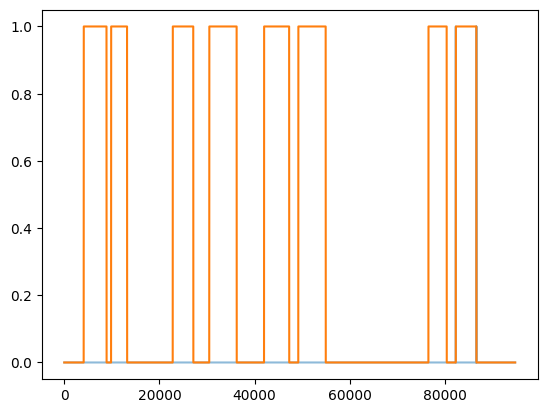

 V_PT_FDR12_AN :85 has accuracy = 0.6052423395390538, precision = 0.64, recall = 0.00042744176106005556, ARL = 3742.5 and f1 = 0.0008543129455108525


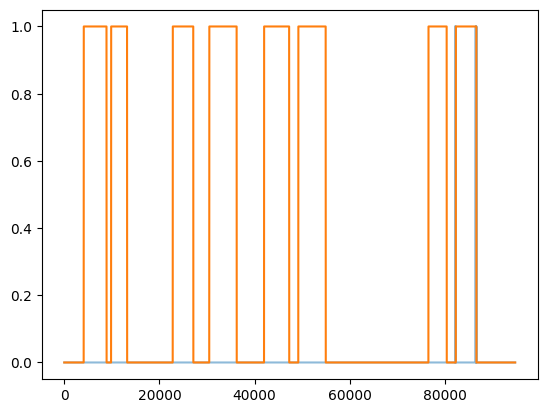

 V_PT_FDR12_BN :86 has accuracy = 0.6052001476715363, precision = 0.5096774193548387, recall = 0.002110493695234024, ARL = 2495.266666666667 and f1 = 0.004203581025354511


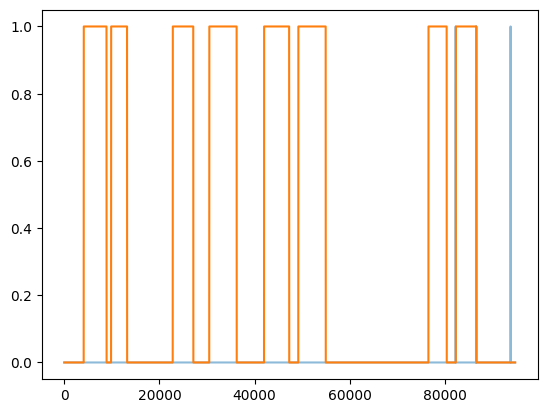

 V_PT_FDR12_CN :87 has accuracy = 0.6053056273403301, precision = 0.782608695652174, recall = 0.00048087198119256254, ARL = 3118.25 and f1 = 0.0009611533840608731


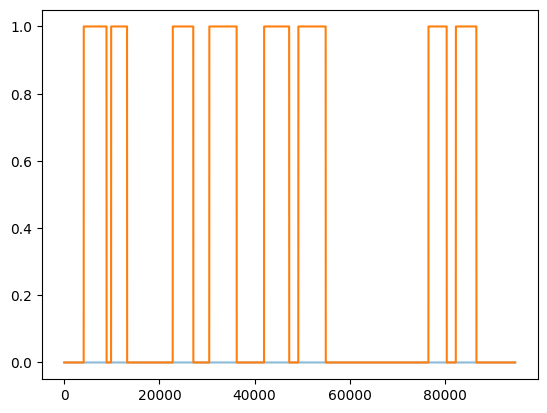

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 C_CT_FDR12_A :88 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


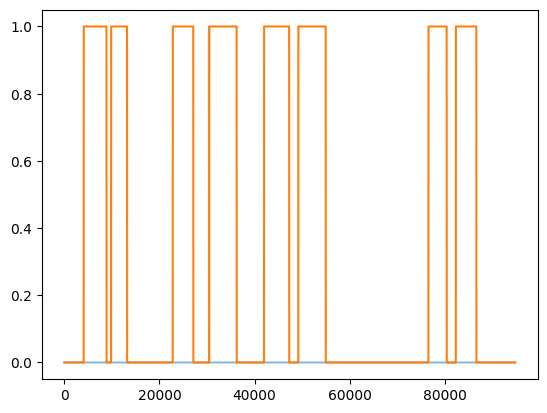

 C_CT_FDR12_B :89 has accuracy = 0.6051579558040188, precision = 0.0, recall = 0.0, ARL = 4159.222222222223 and f1 = 0.0


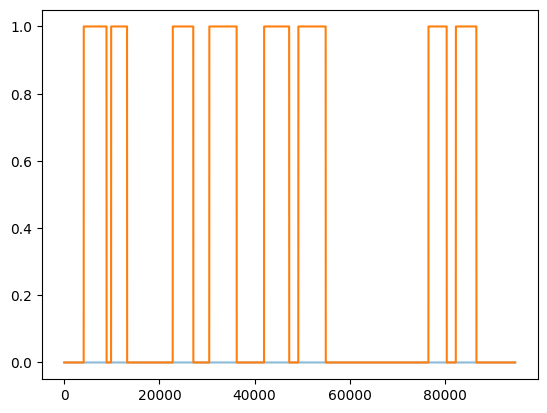

 C_CT_FDR12_C :90 has accuracy = 0.6051685037708981, precision = 0.0, recall = 0.0, ARL = 4679.0 and f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
co = 0
for var1_index, var2_indices in adj_list.items():
    set_zero = np.zeros(len(data_test))
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    violation = []

    for index, i in enumerate(rsum_list[co]):
      if i > thresholds[co]:
        set_zero[index]=1

    plt.plot(set_zero, alpha = 0.5)
    plt.plot(y_true)
    plt.show()
    accuracy, precision, recall, f1= get_scores(y_true, set_zero)
    ARL = average_run_length(set_zero, y_true)

    print(f"{cols[var1_index]} :{var1_index} has accuracy = {accuracy}, precision = {precision}, recall = {recall}, ARL = {ARL} and f1 = {f1}")
    co +=1